In [214]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import os
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # 允许为DataFrame使用display()
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

plt.rcParams['figure.figsize'] = (30.0, 18.0) # 设置figure_size尺寸
plt.rcParams['image.interpolation'] = 'nearest' # 设置 interpolation style

sns.set(style='white', context='notebook', palette='deep')

# 为notebook提供更加漂亮的可视化
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
print(os.listdir("../input"))
# Any results you write to the current directory are saved as output.

['census.csv']


In [215]:
data = pd.read_csv("../input/census.csv")
data.head()

age          workclass education_level  education-num       marital-status  \
0   39          State-gov       Bachelors           13.0        Never-married   
1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
2   38            Private         HS-grad            9.0             Divorced   
3   53            Private            11th            7.0   Married-civ-spouse   
4   28            Private       Bachelors           13.0   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male        2174.0   
1     Exec-managerial         Husband   White     Male           0.0   
2   Handlers-cleaners   Not-in-family   White     Male           0.0   
3   Handlers-cleaners         Husband   Black     Male           0.0   
4      Prof-specialty            Wife   Black   Female           0.0   

   capital-loss  hours-per-week  native-country income  
0           0.0            40.0   United-States  <=50K  
1           0.0            13.0   United-States  <=50K  
2           0.0            40.0   United-States  <=50K  
3           0.0            40.0   United-States  <=50K  
4           0.0            40.0            Cuba  <=50K

In [216]:
# data.describe()

In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
age                45222 non-null int64
workclass          45222 non-null object
education_level    45222 non-null object
education-num      45222 non-null float64
marital-status     45222 non-null object
occupation         45222 non-null object
relationship       45222 non-null object
race               45222 non-null object
sex                45222 non-null object
capital-gain       45222 non-null float64
capital-loss       45222 non-null float64
hours-per-week     45222 non-null float64
native-country     45222 non-null object
income             45222 non-null object
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


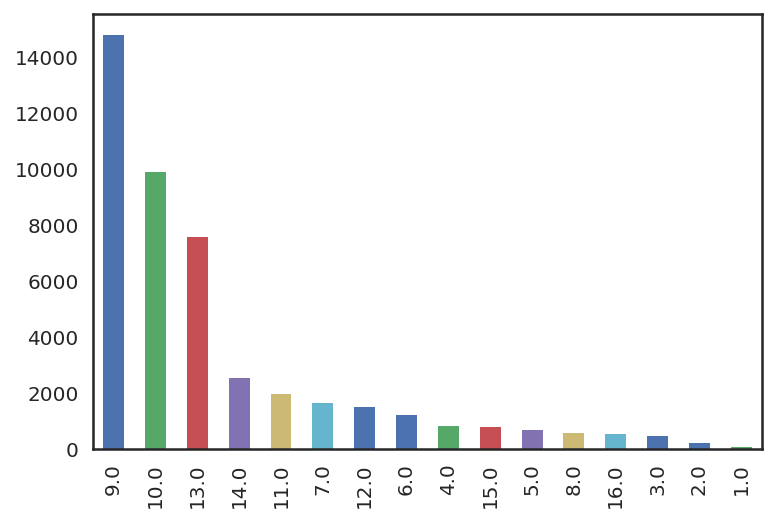

In [218]:
data['education-num'].value_counts().plot(kind='bar')

In [219]:
# TODO：总的记录数
n_records = len(data)
# TODO：被调查者的收入大于$50,000的人数
n_greater_50k = len(data.loc[data["income"]==">50K"])
# TODO：被调查者的收入最多为$50,000的人数
n_at_most_50k = len(data.loc[data["income"]=="<=50K"])
# TODO：被调查者收入大于$50,000所占的比例
greater_percent = float(n_greater_50k)/n_records

# 打印结果
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent*100))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78%


In [220]:
# 将数据切分成特征和对应的标签
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

In [221]:
# 导入sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# 初始化一个 scaler，并将它施加到特征上
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
features_raw[numerical] = scaler.fit_transform(data[numerical])

# 显示一个经过缩放的样例记录
display(features_raw.head(n = 1))

age   workclass education_level  education-num  marital-status  \
0  0.30137   State-gov       Bachelors            0.8   Never-married   

      occupation    relationship    race    sex  capital-gain  capital-loss  \
0   Adm-clerical   Not-in-family   White   Male       0.02174           0.0   

   hours-per-week  native-country  
0        0.397959   United-States

In [222]:
# TODO：将'income_raw'编码成数字值
income = pd.get_dummies(income_raw)['>50K']
income.head()

0    0
1    0
2    0
3    0
4    0
Name: >50K, dtype: uint8

In [223]:
# TODO：使用pandas.get_dummies()对'features_raw'数据进行独热编码
features = pd.get_dummies(features_raw)
# 打印经过独热编码之后的特征数量
encoded = list(features.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))
# 移除下面一行的注释以观察编码的特征名字
print(encoded)
print(features.shape)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

In [224]:
data.dtypes

age                  int64
workclass           object
education_level     object
education-num      float64
marital-status      object
occupation          object
relationship        object
race                object
sex                 object
capital-gain       float64
capital-loss       float64
hours-per-week     float64
native-country      object
income              object
dtype: object

In [225]:
data.head()

age          workclass education_level  education-num       marital-status  \
0   39          State-gov       Bachelors           13.0        Never-married   
1   50   Self-emp-not-inc       Bachelors           13.0   Married-civ-spouse   
2   38            Private         HS-grad            9.0             Divorced   
3   53            Private            11th            7.0   Married-civ-spouse   
4   28            Private       Bachelors           13.0   Married-civ-spouse   

           occupation    relationship    race      sex  capital-gain  \
0        Adm-clerical   Not-in-family   White     Male        2174.0   
1     Exec-managerial         Husband   White     Male           0.0   
2   Handlers-cleaners   Not-in-family   White     Male           0.0   
3   Handlers-cleaners         Husband   Black     Male           0.0   
4      Prof-specialty            Wife   Black   Female           0.0   

   capital-loss  hours-per-week  native-country income  
0           0.0            40.0   United-States  <=50K  
1           0.0            13.0   United-States  <=50K  
2           0.0            40.0   United-States  <=50K  
3           0.0            40.0   United-States  <=50K  
4           0.0            40.0            Cuba  <=50K

In [226]:
features.head()

age  education-num  capital-gain  capital-loss  hours-per-week  \
0  0.301370       0.800000       0.02174           0.0        0.397959   
1  0.452055       0.800000       0.00000           0.0        0.122449   
2  0.287671       0.533333       0.00000           0.0        0.397959   
3  0.493151       0.400000       0.00000           0.0        0.397959   
4  0.150685       0.800000       0.00000           0.0        0.397959   

   workclass_ Federal-gov  workclass_ Local-gov  workclass_ Private  \
0                       0                     0                   0   
1                       0                     0                   0   
2                       0                     0                   1   
3                       0                     0                   1   
4                       0                     0                   1   

   workclass_ Self-emp-inc  workclass_ Self-emp-not-inc  \
0                        0                            0   
1                        0                            1   
2                        0                            0   
3                        0                            0   
4                        0                            0   

              ...              native-country_ Portugal  \
0             ...                                     0   
1             ...                                     0   
2             ...                                     0   
3             ...                                     0   
4             ...                                     0   

   native-country_ Puerto-Rico  native-country_ Scotland  \
0                            0                         0   
1                            0                         0   
2                            0                         0   
3                            0                         0   
4                            0                         0   

   native-country_ South  native-country_ Taiwan  native-country_ Thailand  \
0                      0                       0                         0   
1                      0                       0                         0   
2                      0                       0                         0   
3                      0                       0                         0   
4                      0                       0                         0   

   native-country_ Trinadad&Tobago  native-country_ United-States  \
0                                0                              1   
1                                0                              1   
2                                0                              1   
3                                0                              1   
4                                0                              0   

   native-country_ Vietnam  native-country_ Yugoslavia  
0                        0                           0  
1                        0                           0  
2                        0                           0  
3                        0                           0  
4                        0                           0  

[5 rows x 103 columns]

In [227]:
# income.value_counts().plot(kind='bar')
income.shape
features.shape

(45222, 103)

# 2.0 data preprocessing
##  2.1 unuse get_dummies, function like LabelEncoder

1. education_level
1. marital-status
1. occupation
1. relationship
1. race
1. sex
1. native-country
1. workclass

In [228]:
colmap = {}
def mapcol(fdata, colstr):
    print(colstr)
    if colmap.get(colstr, -1) > 0:
        colmap.pop(colstr)
    occupation_array = fdata[colstr].unique()
    col_dict = {}
    for i in range(len(occupation_array)):
        # print(occupation_array[i])
        col_dict[occupation_array[i]] = i
    fdata[colstr] = fdata[colstr].map(col_dict)
    print('col:{} map:{}'.format(colstr, col_dict))
    colmap[colstr] = col_dict

# set xtick
def selfxticklabels(colstr):
    col_dict = {}
    col_dict = colmap.get(colstr)
    xticklabels = []
    if len(col_dict) > 0:
        for k,v in col_dict.items():
           xticklabels.append(k)
#     print(xticklabels)
    return xticklabels

# set ytick
def selfyticklabels(colstr):
    col_dict = {}
    col_dict = colmap.get(colstr)
    yticklabels = []
    print(colstr)
    if len(col_dict) > 0:
        print(col_dict)
        yticklabels.append('0.0')
        for k,v in col_dict.items():
           yticklabels.append(k)
    print(yticklabels)
    return yticklabels

education_level
col:education_level map:{' Bachelors': 0, ' HS-grad': 1, ' 11th': 2, ' Masters': 3, ' 9th': 4, ' Some-college': 5, ' Assoc-acdm': 6, ' 7th-8th': 7, ' Doctorate': 8, ' Assoc-voc': 9, ' Prof-school': 10, ' 5th-6th': 11, ' 10th': 12, ' Preschool': 13, ' 12th': 14, ' 1st-4th': 15}


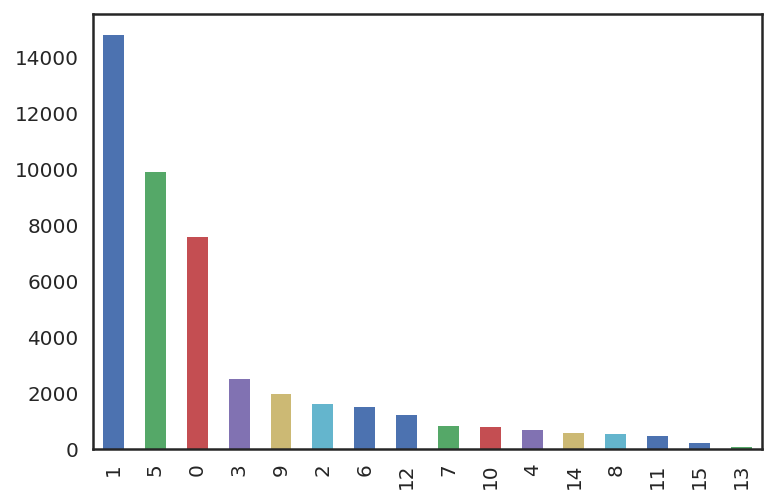

In [229]:
fdata = data.copy()
mapcol(fdata, 'education_level')
fdata['education_level'].value_counts().plot(kind='bar')

marital-status
col:marital-status map:{' Never-married': 0, ' Married-civ-spouse': 1, ' Divorced': 2, ' Married-spouse-absent': 3, ' Separated': 4, ' Married-AF-spouse': 5, ' Widowed': 6}


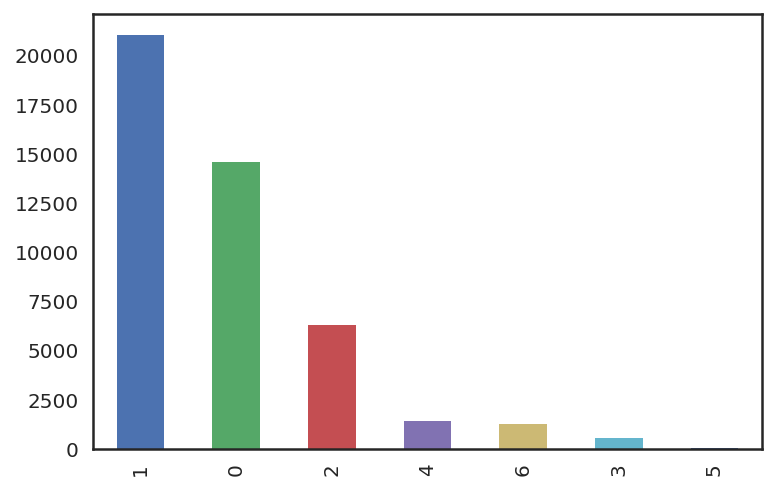

In [230]:
mapcol(fdata, 'marital-status')
fdata['marital-status'].value_counts().plot(kind='bar')

In [231]:
# col_dict = colmap.get('education_level')
# if len(col_dict) > 0:
#     for k,v in col_dict.items():
#        print(k,v)
fdata['education_level'].map({' Preschool': 1, 
                              ' Assoc-acdm': 3,
                              ' Prof-school': 5,
                              ' HS-grad': 7,
                              ' Assoc-voc':9,
                              ' Some-college': 11,
                              ' Bachelors': 13,
                              ' Masters': 15,
                              ' Doctorate': 16,
                              ' 1st-4th': 2,
                              ' 5th-6th': 4,
                              ' 7th-8th': 6,
                              ' 9th': 8,
                              ' 10th': 10,
                              ' 11th': 12,
                              ' 12th': 14,})
fdata['education_level'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

occupation
col:occupation map:{' Adm-clerical': 0, ' Exec-managerial': 1, ' Handlers-cleaners': 2, ' Prof-specialty': 3, ' Other-service': 4, ' Sales': 5, ' Transport-moving': 6, ' Farming-fishing': 7, ' Machine-op-inspct': 8, ' Tech-support': 9, ' Craft-repair': 10, ' Protective-serv': 11, ' Armed-Forces': 12, ' Priv-house-serv': 13}


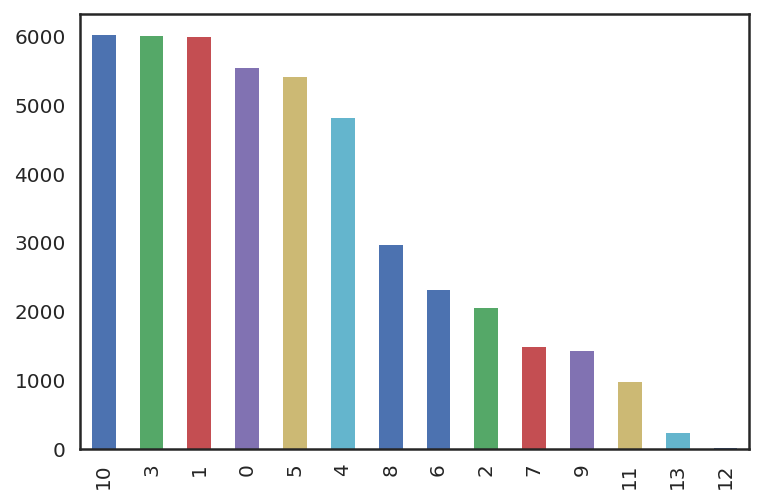

In [232]:
mapcol(fdata, 'occupation')
fdata['occupation'].value_counts().plot(kind='bar')

relationship
col:relationship map:{' Not-in-family': 0, ' Husband': 1, ' Wife': 2, ' Own-child': 3, ' Unmarried': 4, ' Other-relative': 5}


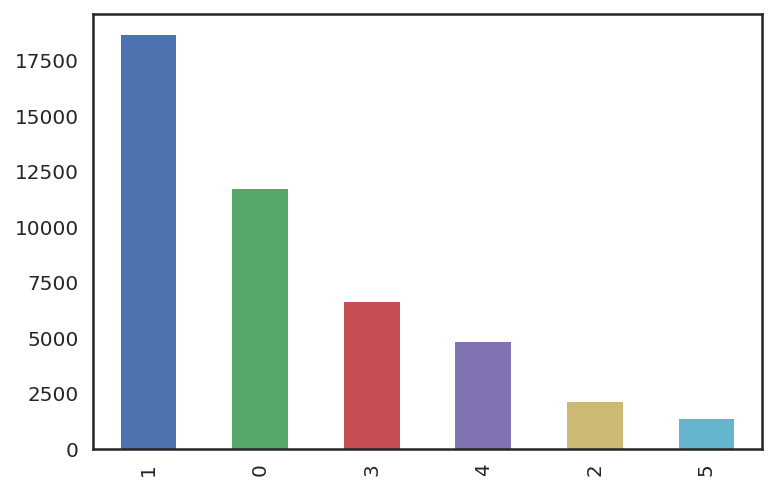

In [233]:
mapcol(fdata, 'relationship')
fdata['relationship'].value_counts().plot(kind='bar')

race
col:race map:{' White': 0, ' Black': 1, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, ' Other': 4}


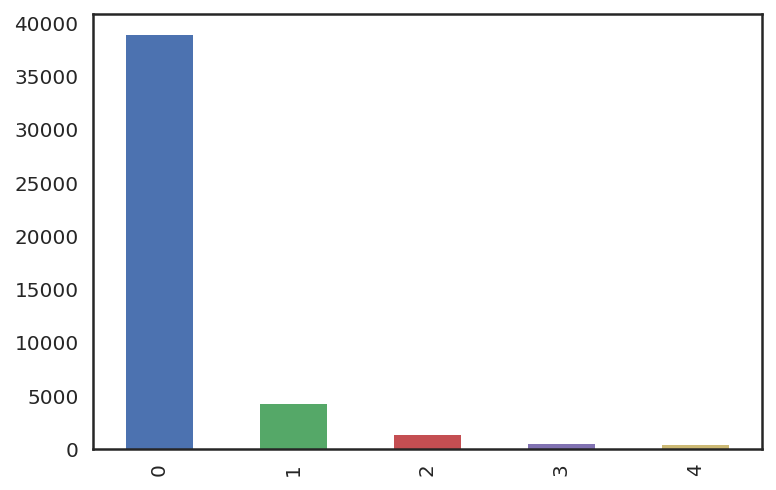

In [234]:
mapcol(fdata, 'race')
fdata['race'].value_counts().plot(kind='bar')

sex
col:sex map:{' Male': 0, ' Female': 1}


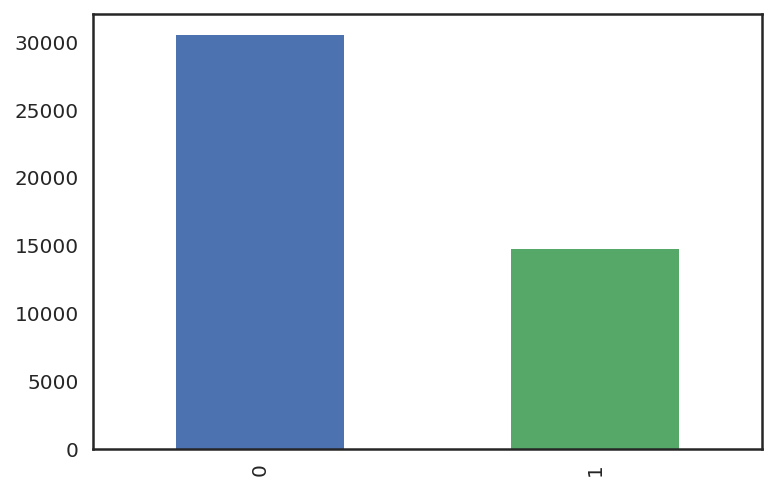

In [235]:
mapcol(fdata, 'sex')
fdata['sex'].value_counts().plot(kind='bar')

native-country
col:native-country map:{' United-States': 0, ' Cuba': 1, ' Jamaica': 2, ' India': 3, ' Mexico': 4, ' Puerto-Rico': 5, ' Honduras': 6, ' England': 7, ' Canada': 8, ' Germany': 9, ' Iran': 10, ' Philippines': 11, ' Poland': 12, ' Columbia': 13, ' Cambodia': 14, ' Thailand': 15, ' Ecuador': 16, ' Laos': 17, ' Taiwan': 18, ' Haiti': 19, ' Portugal': 20, ' Dominican-Republic': 21, ' El-Salvador': 22, ' France': 23, ' Guatemala': 24, ' Italy': 25, ' China': 26, ' South': 27, ' Japan': 28, ' Yugoslavia': 29, ' Peru': 30, ' Outlying-US(Guam-USVI-etc)': 31, ' Scotland': 32, ' Trinadad&Tobago': 33, ' Greece': 34, ' Nicaragua': 35, ' Vietnam': 36, ' Hong': 37, ' Ireland': 38, ' Hungary': 39, ' Holand-Netherlands': 40}


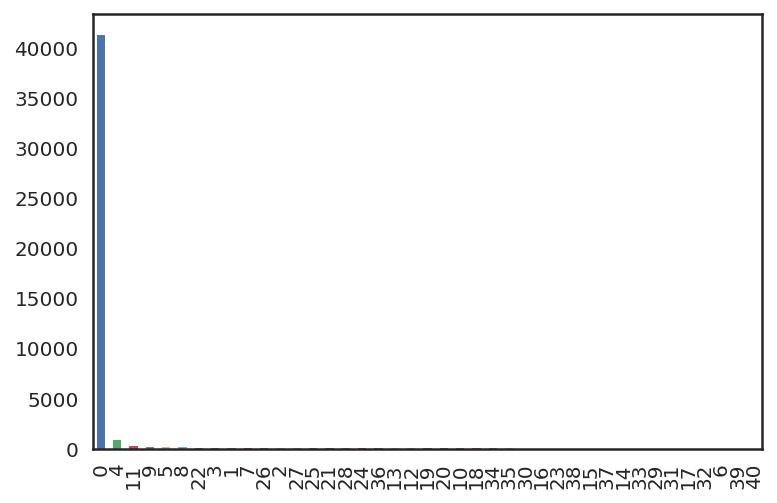

In [236]:
mapcol(fdata, 'native-country')
fdata['native-country'].value_counts().plot(kind='bar')

In [237]:
# mapcol(fdata, 'income')
# fdata['income'].value_counts().plot(kind='bar')

workclass
col:workclass map:{' State-gov': 0, ' Self-emp-not-inc': 1, ' Private': 2, ' Federal-gov': 3, ' Local-gov': 4, ' Self-emp-inc': 5, ' Without-pay': 6}


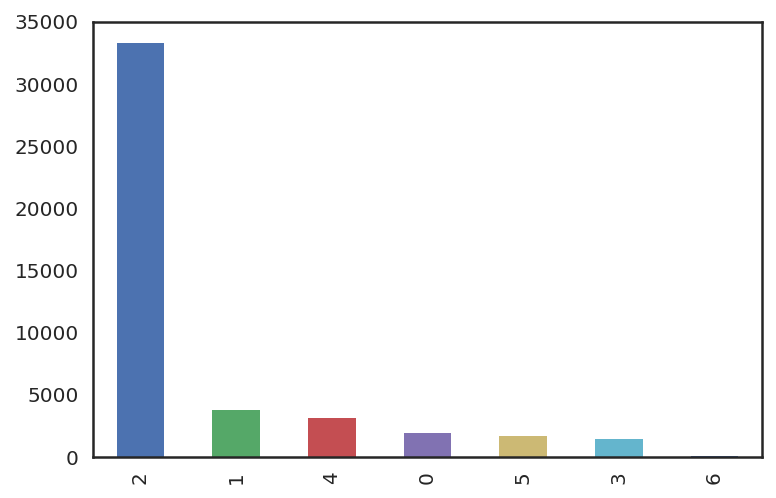

In [238]:
mapcol(fdata, 'workclass')
fdata['workclass'].value_counts().plot(kind='bar')

## 2.2 observe feature distribution
### 2.2.1 age

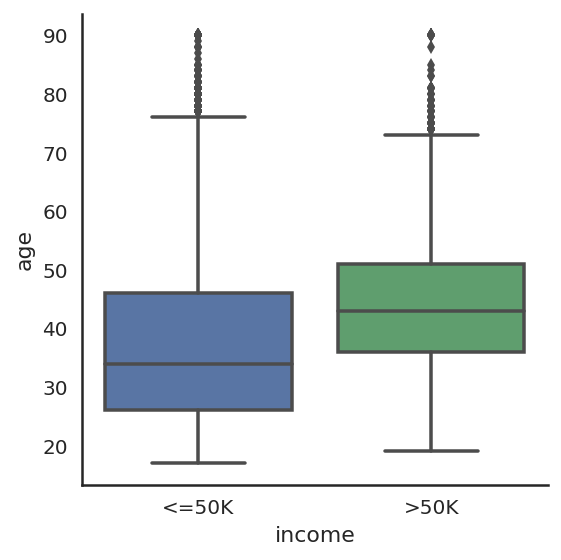

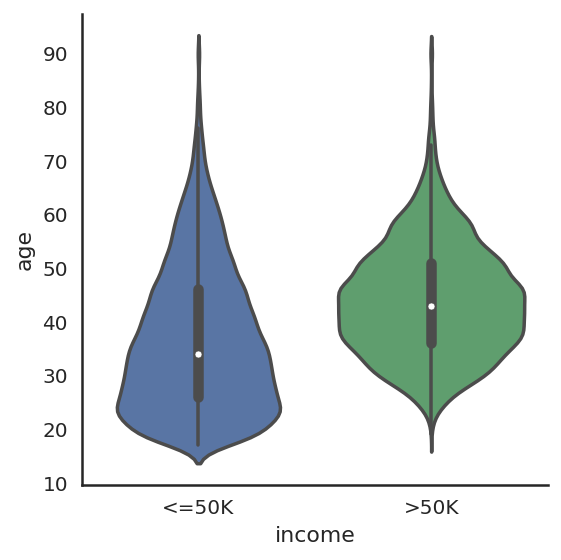

In [239]:
g = sns.factorplot(x="income", y = "age",data = fdata, kind="box")
g = sns.factorplot(x="income", y = "age",data = fdata, kind="violin")

In [240]:
fdata['age'].describe()

count    45222.000000
mean        38.547941
std         13.217870
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

In [241]:
def agesegment(age):
    return age//4
fdata["age"] = fdata["age"].map(agesegment)

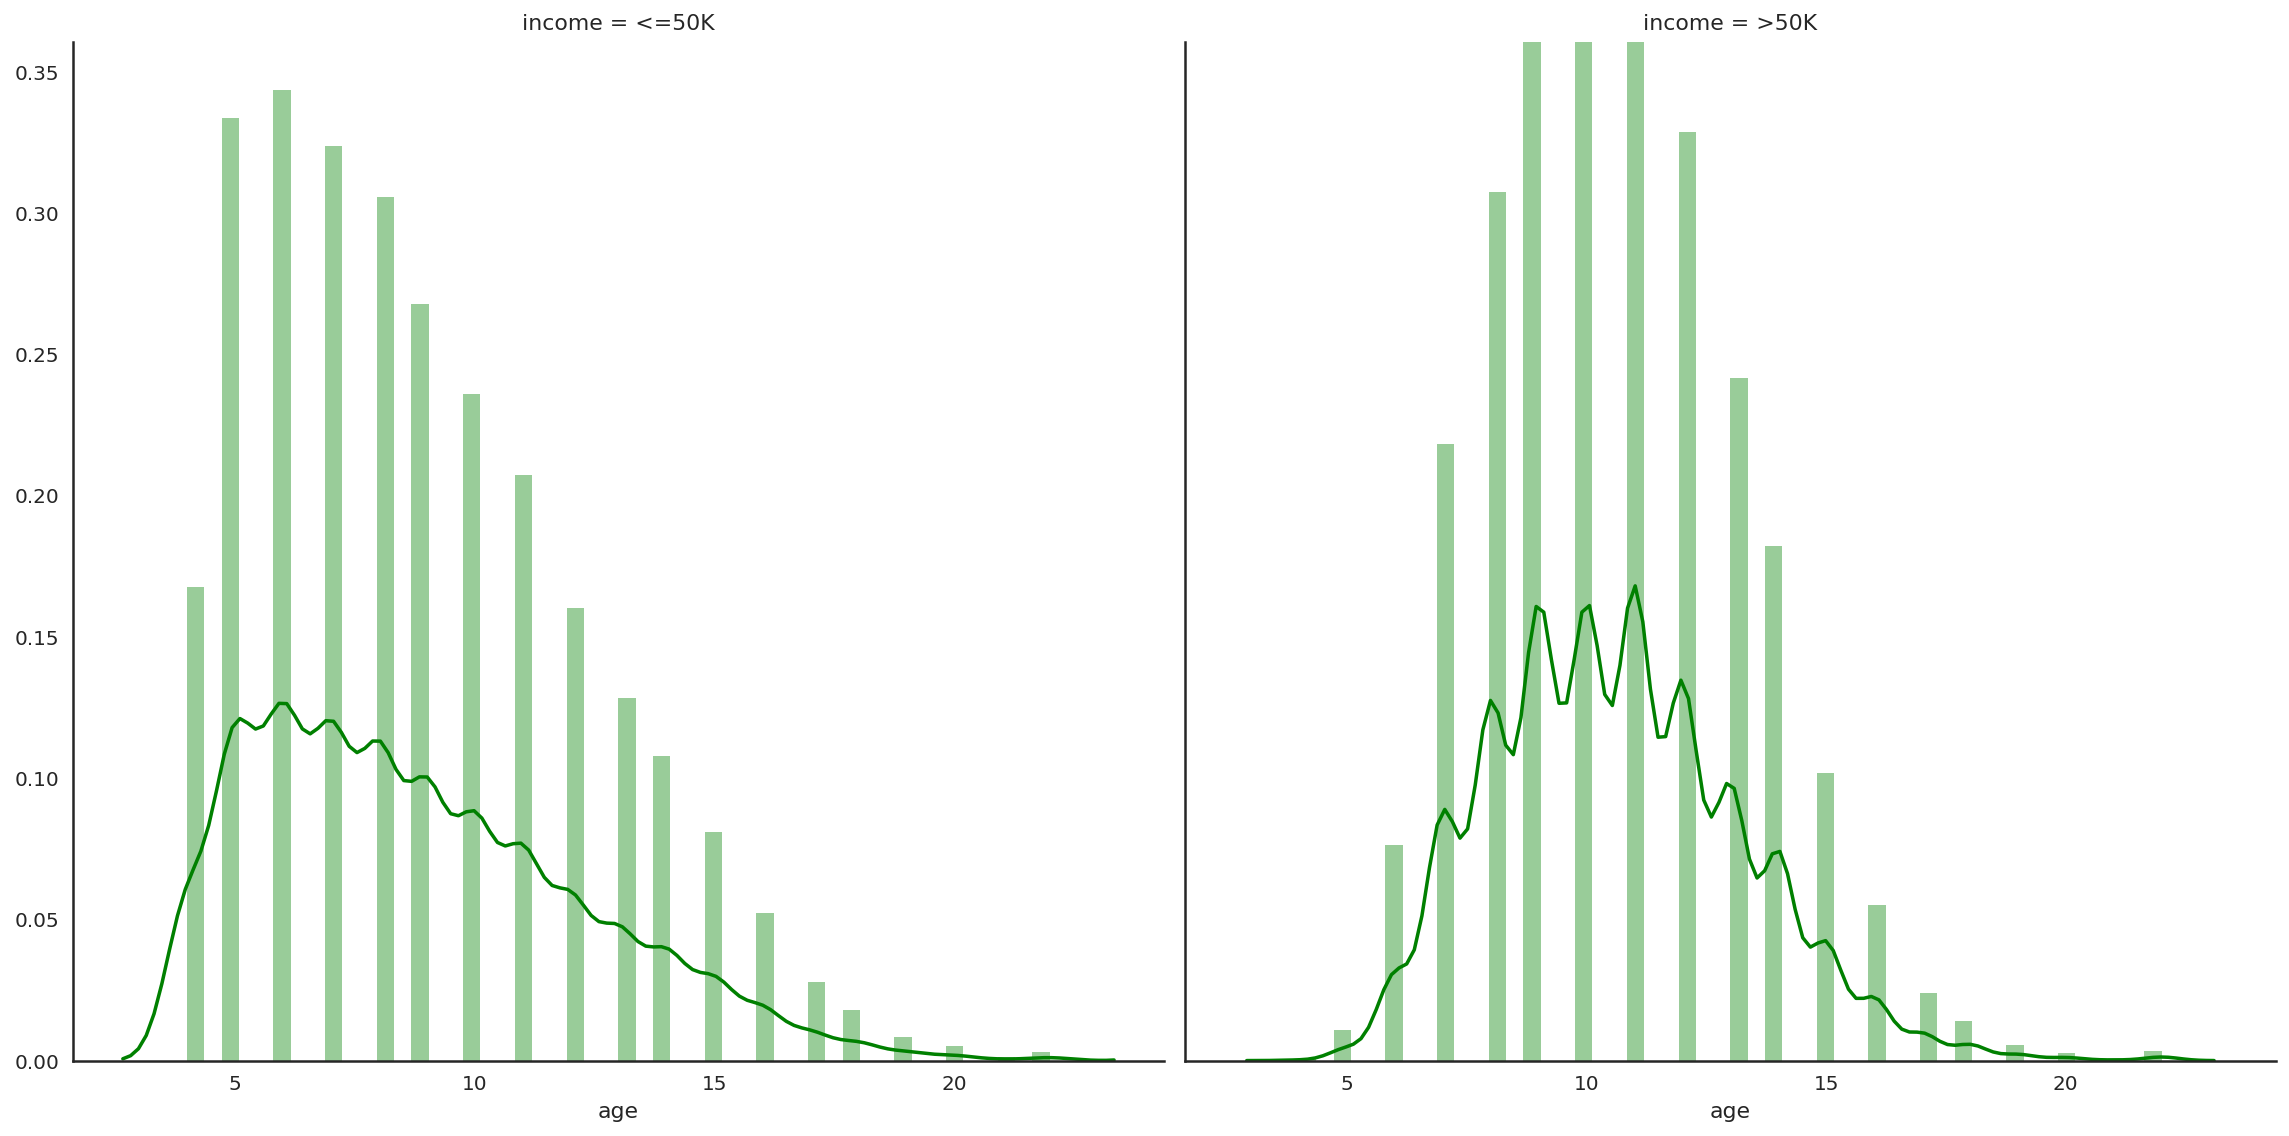

In [242]:
# Explore Age vs Survived
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
g = g.map(sns.distplot, "age", color='g')

In [243]:
# f = fdata['age'].value_counts().plot(kind='bar', figsize=(20,16))
# f = sns.factorplot("age", col="income",  data=fdata,
#                    size=6, kind="count", palette="muted")
# for ax in f.axes.flatten():
#     for tick in ax.get_xticklabels():
#         # print(tick)
#         pass
# f

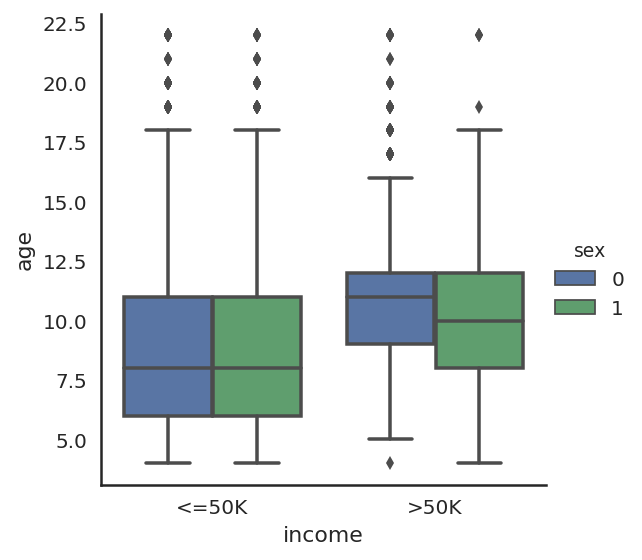

In [244]:
g = sns.factorplot(y="age",x="income",hue="sex", data=fdata, kind="box")

## 2.2.2 hours-per-week

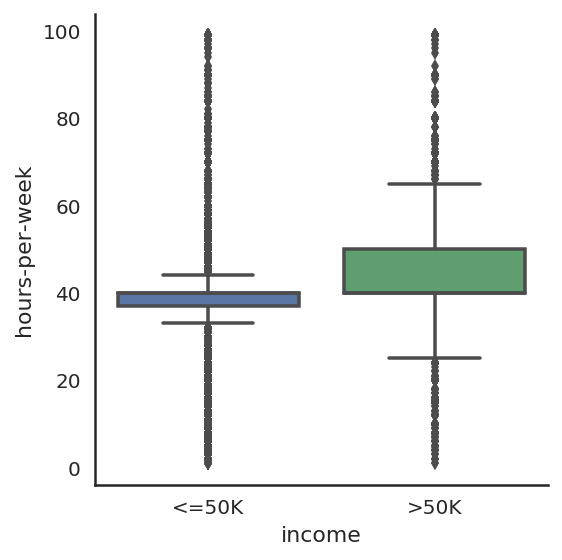

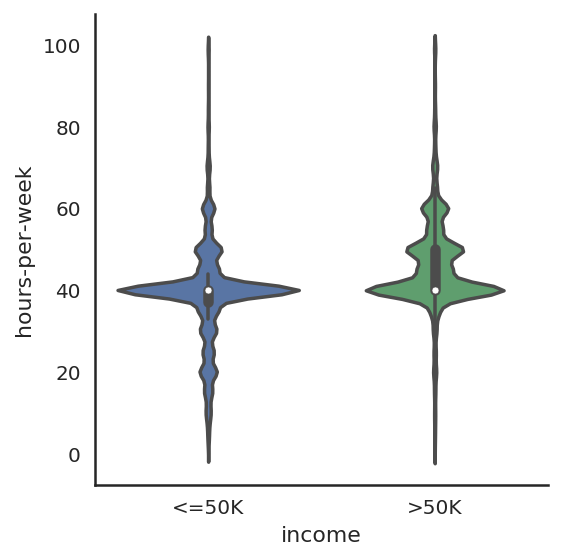

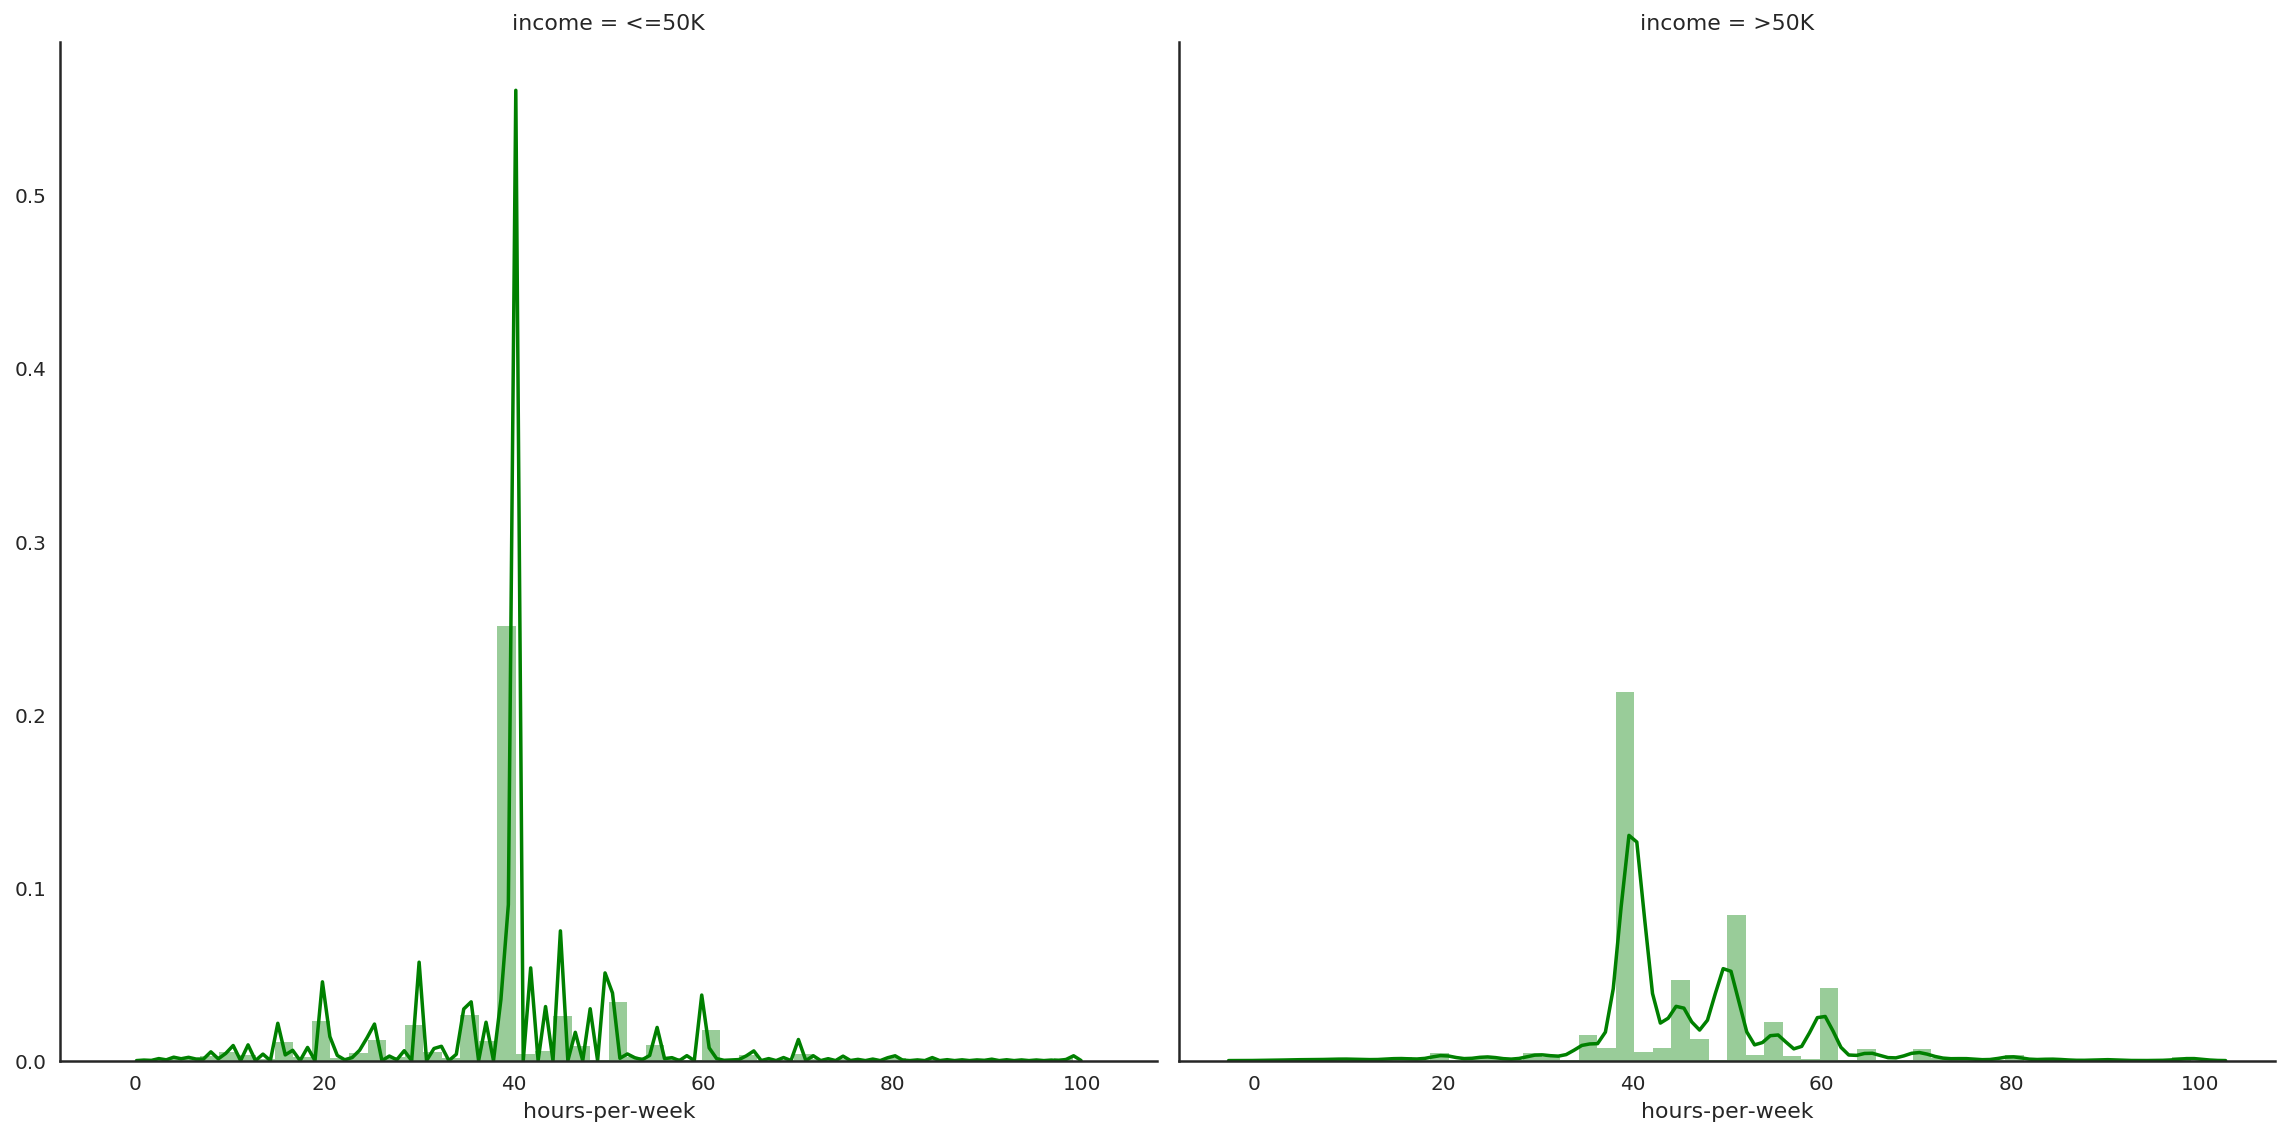

In [245]:
colname = "hours-per-week"
g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
g = g.map(sns.distplot, colname, color='g')

In [246]:
# Explore Fare distribution 
# g = sns.distplot(fdata["hours-per-week"], color="g", label="Skewness : %.2f"%(fdata["hours-per-week"].skew()))
# g = g.legend(loc="best")

## 2.2.3 marital-status

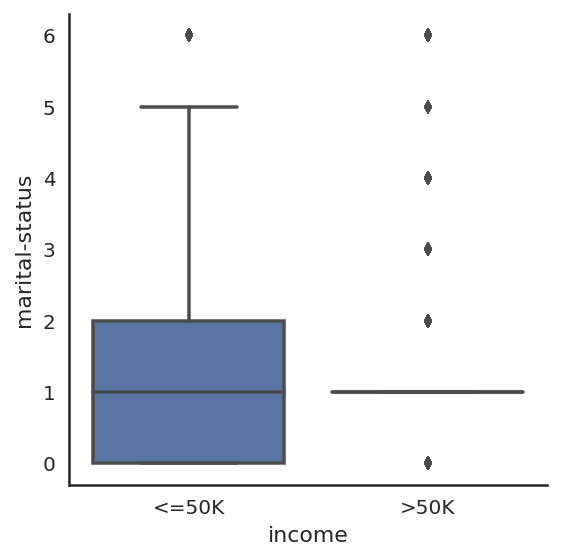

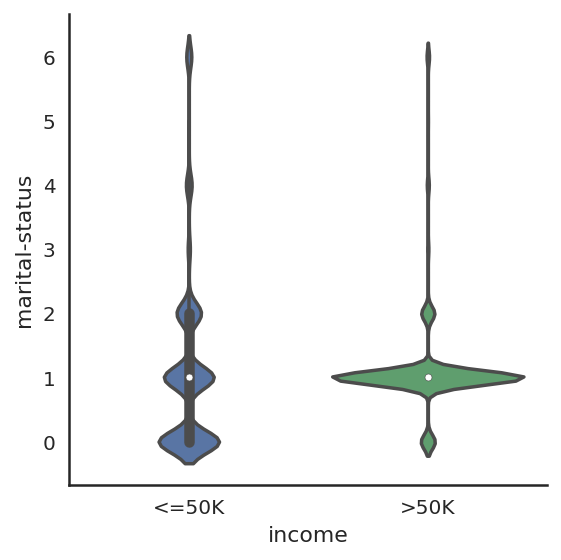

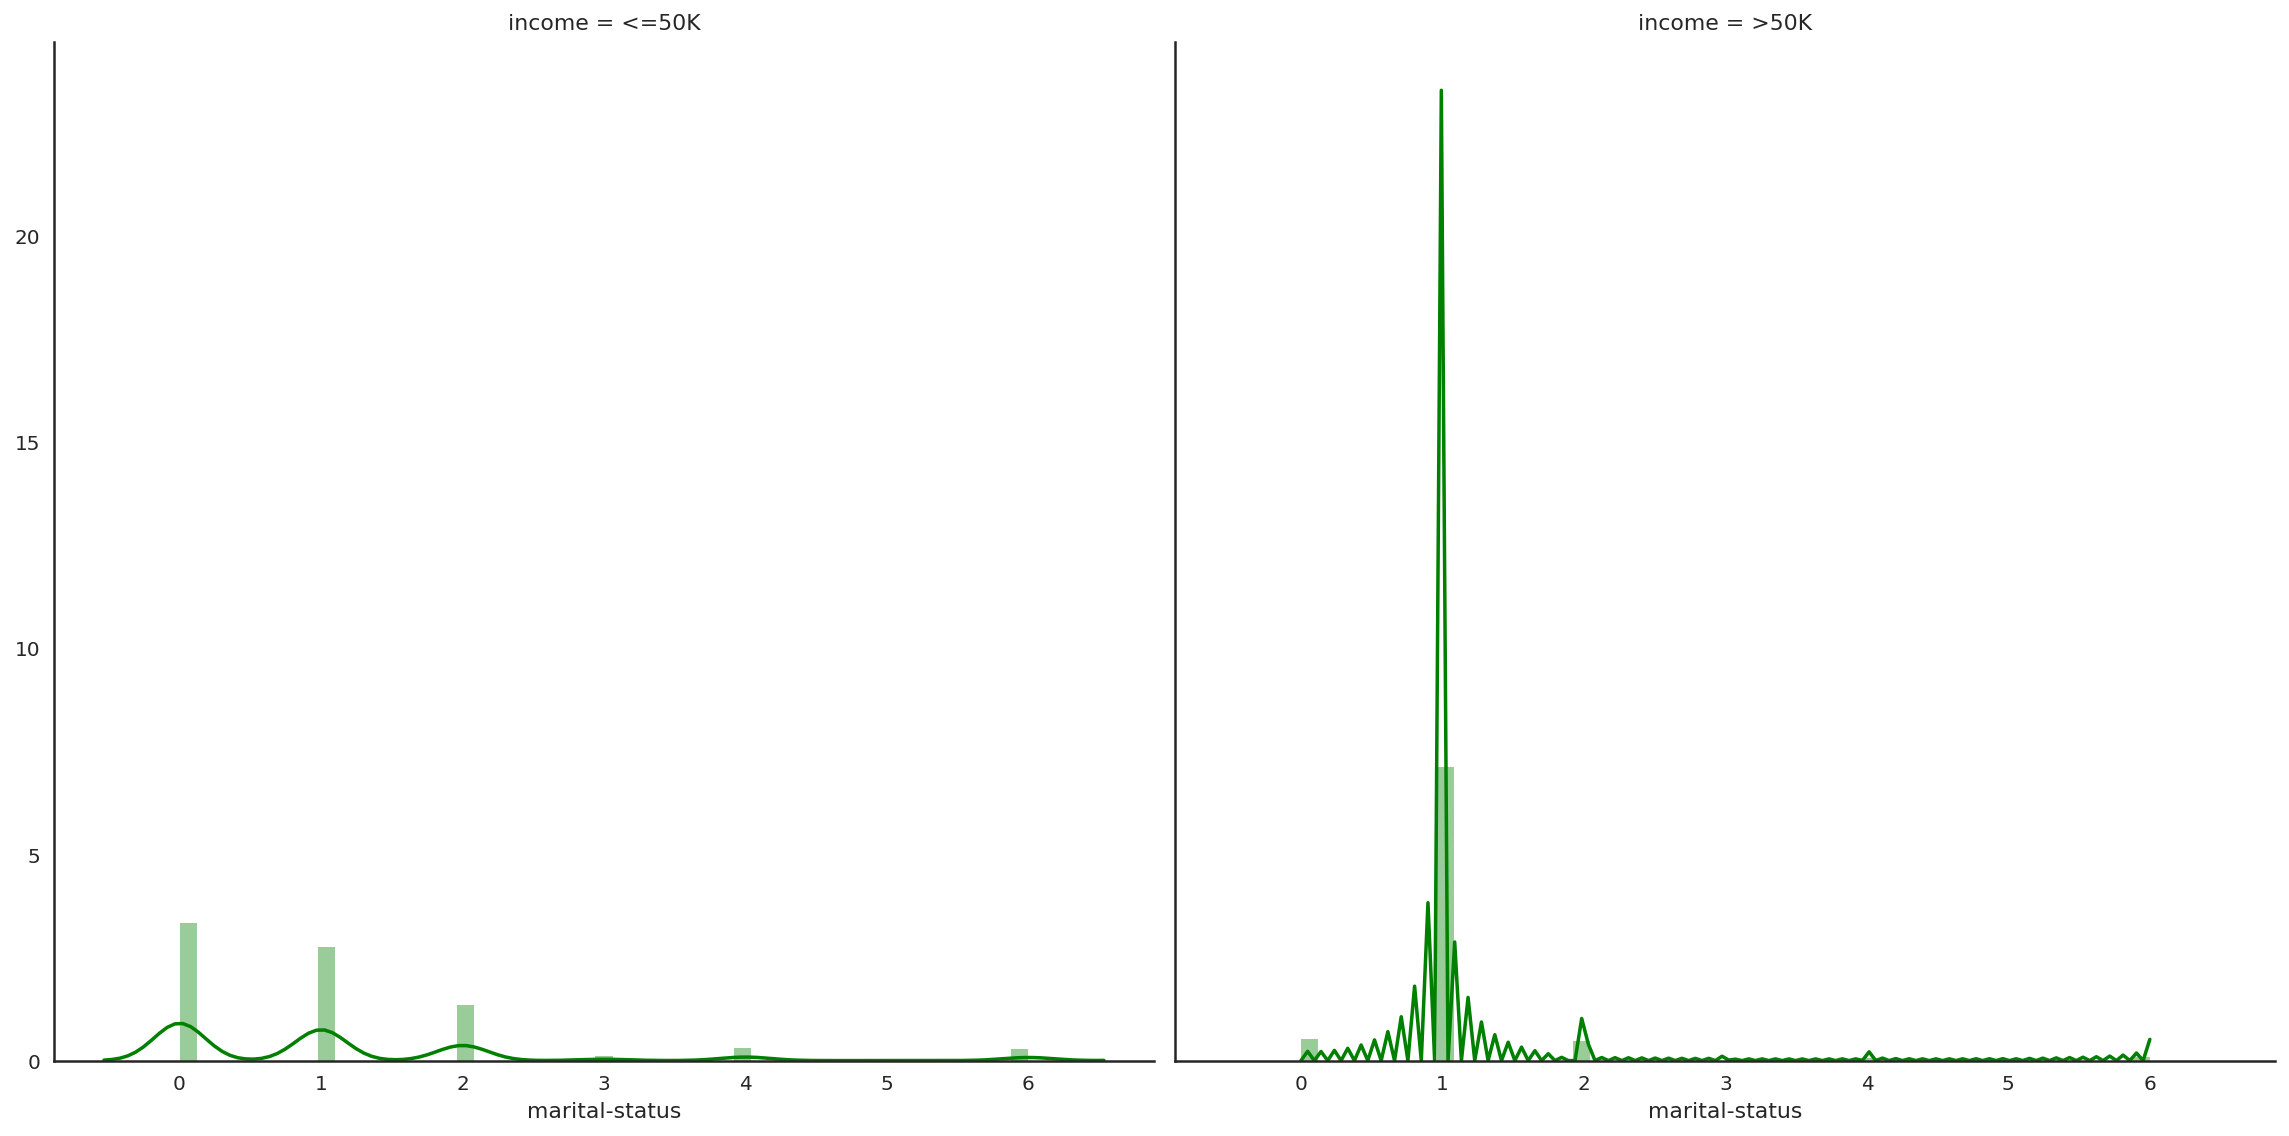

In [247]:
colname = "marital-status"
g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
g = g.map(sns.distplot, colname, color='g')

## 2.2.4 education_level

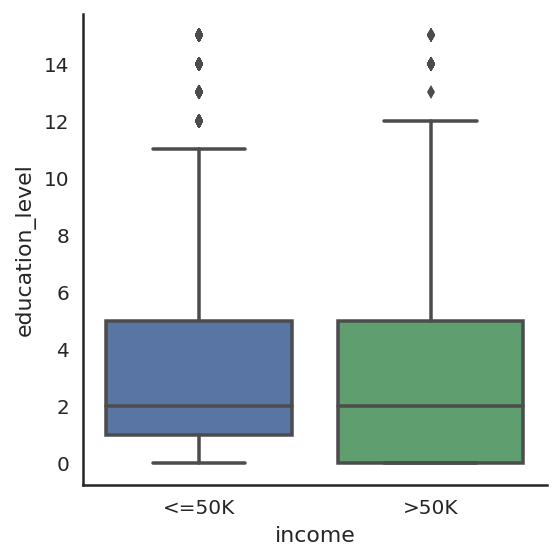

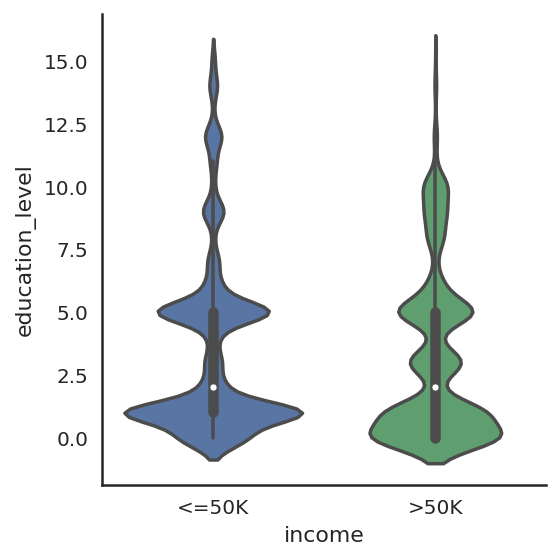

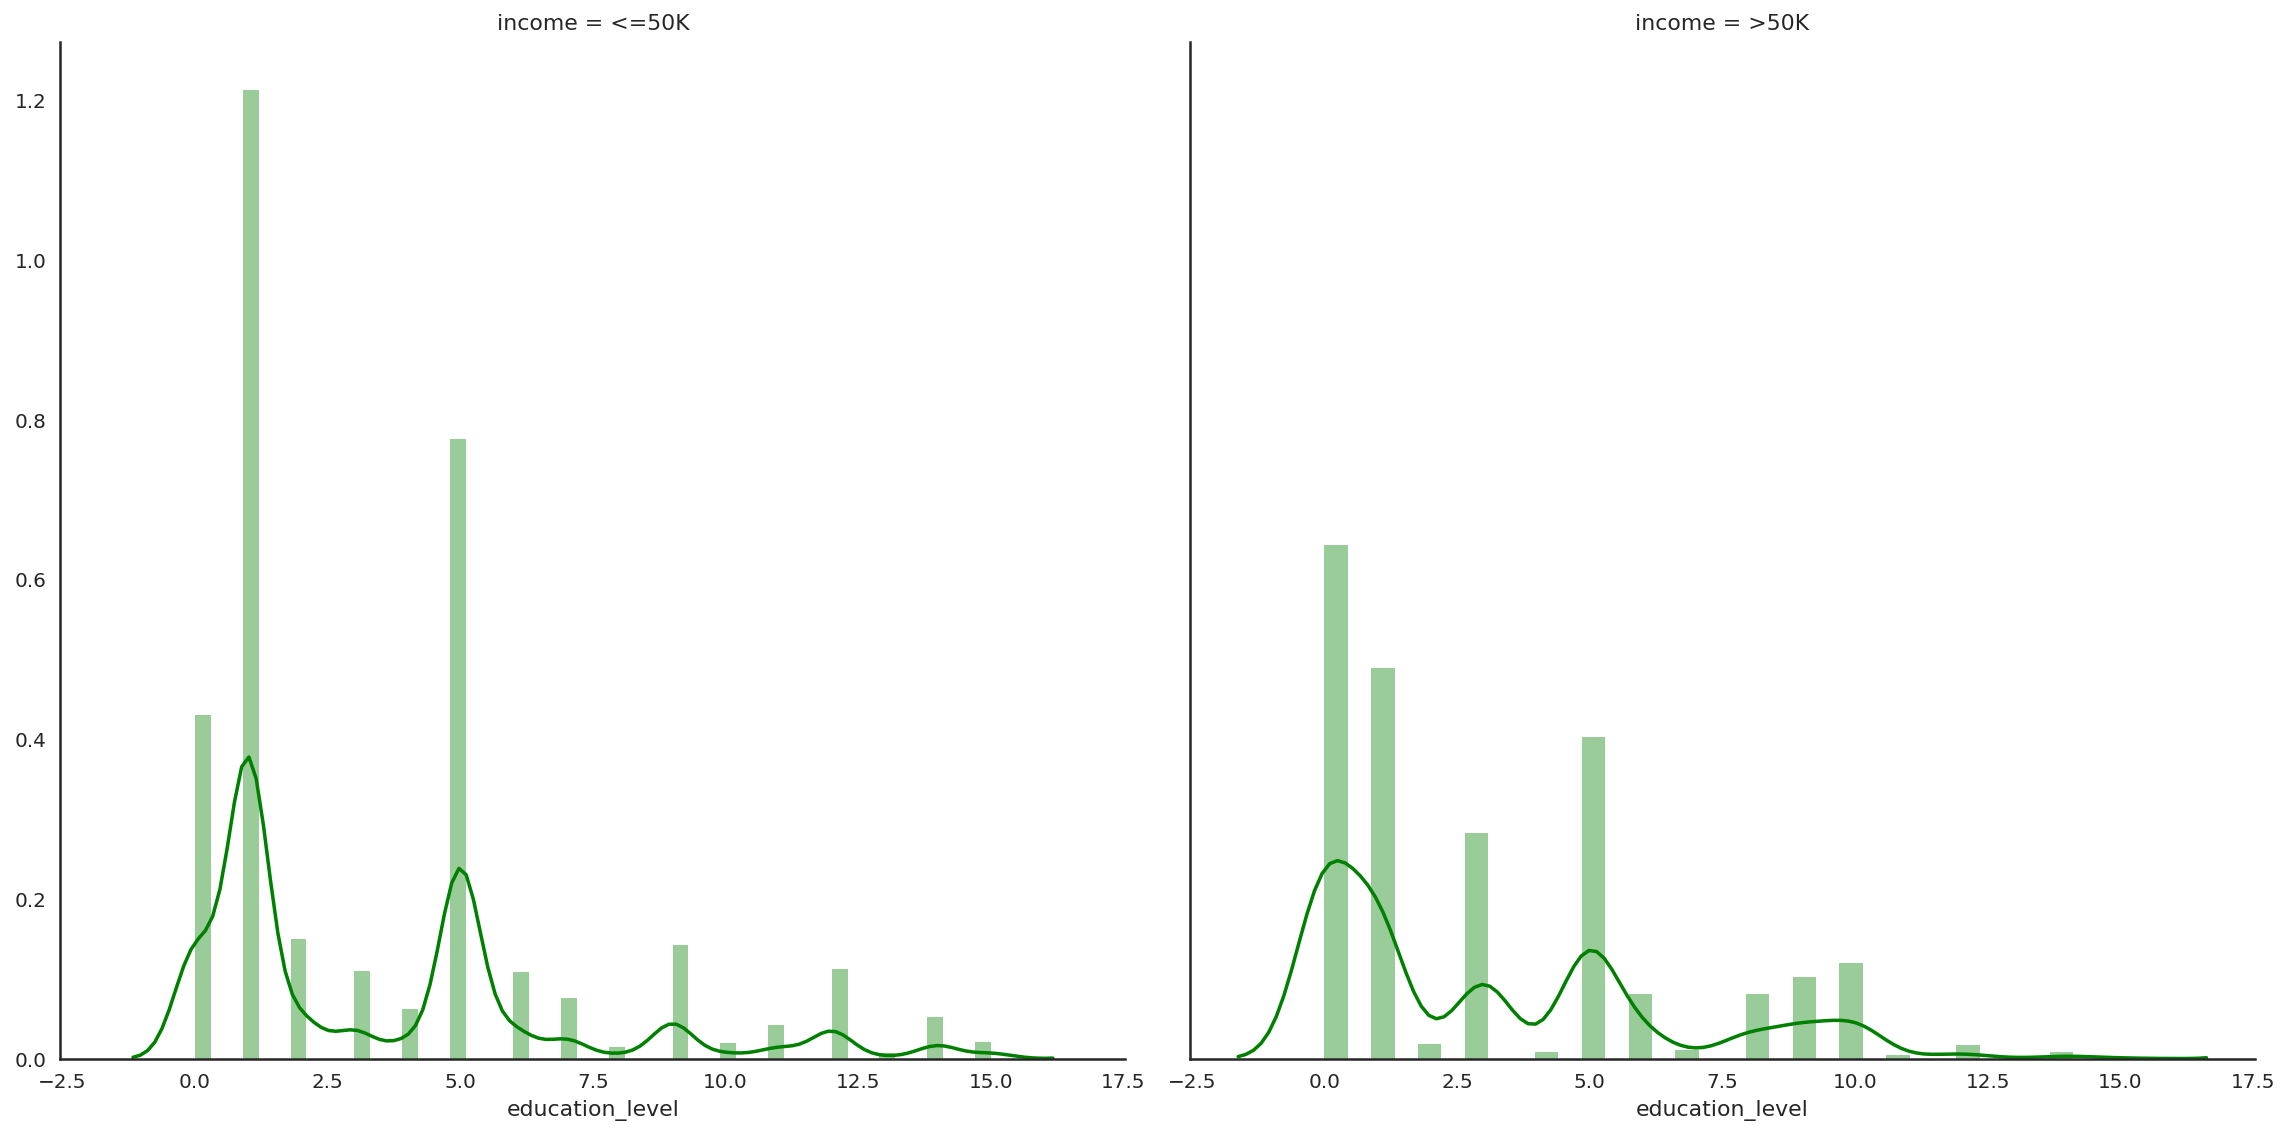

In [248]:
colname = "education_level"
g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
g = g.map(sns.distplot, colname, color='g')

## 2.2.5 education-num

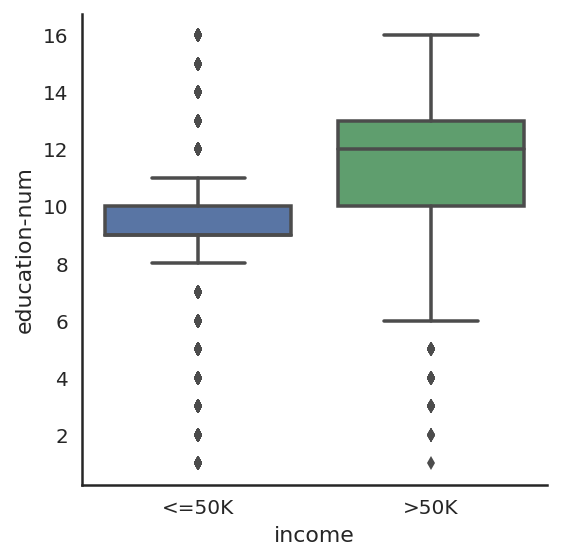

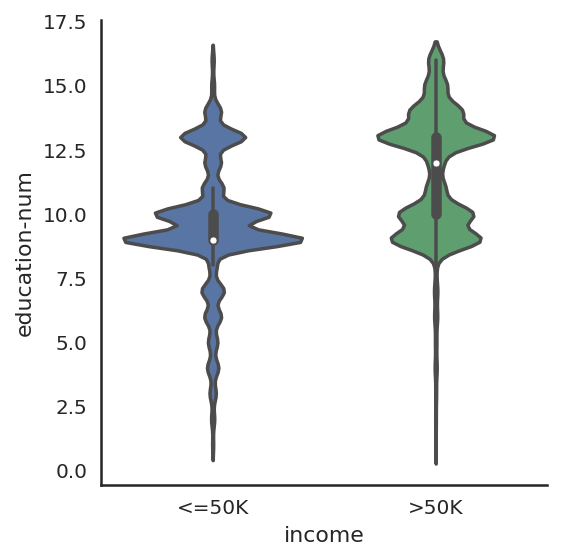

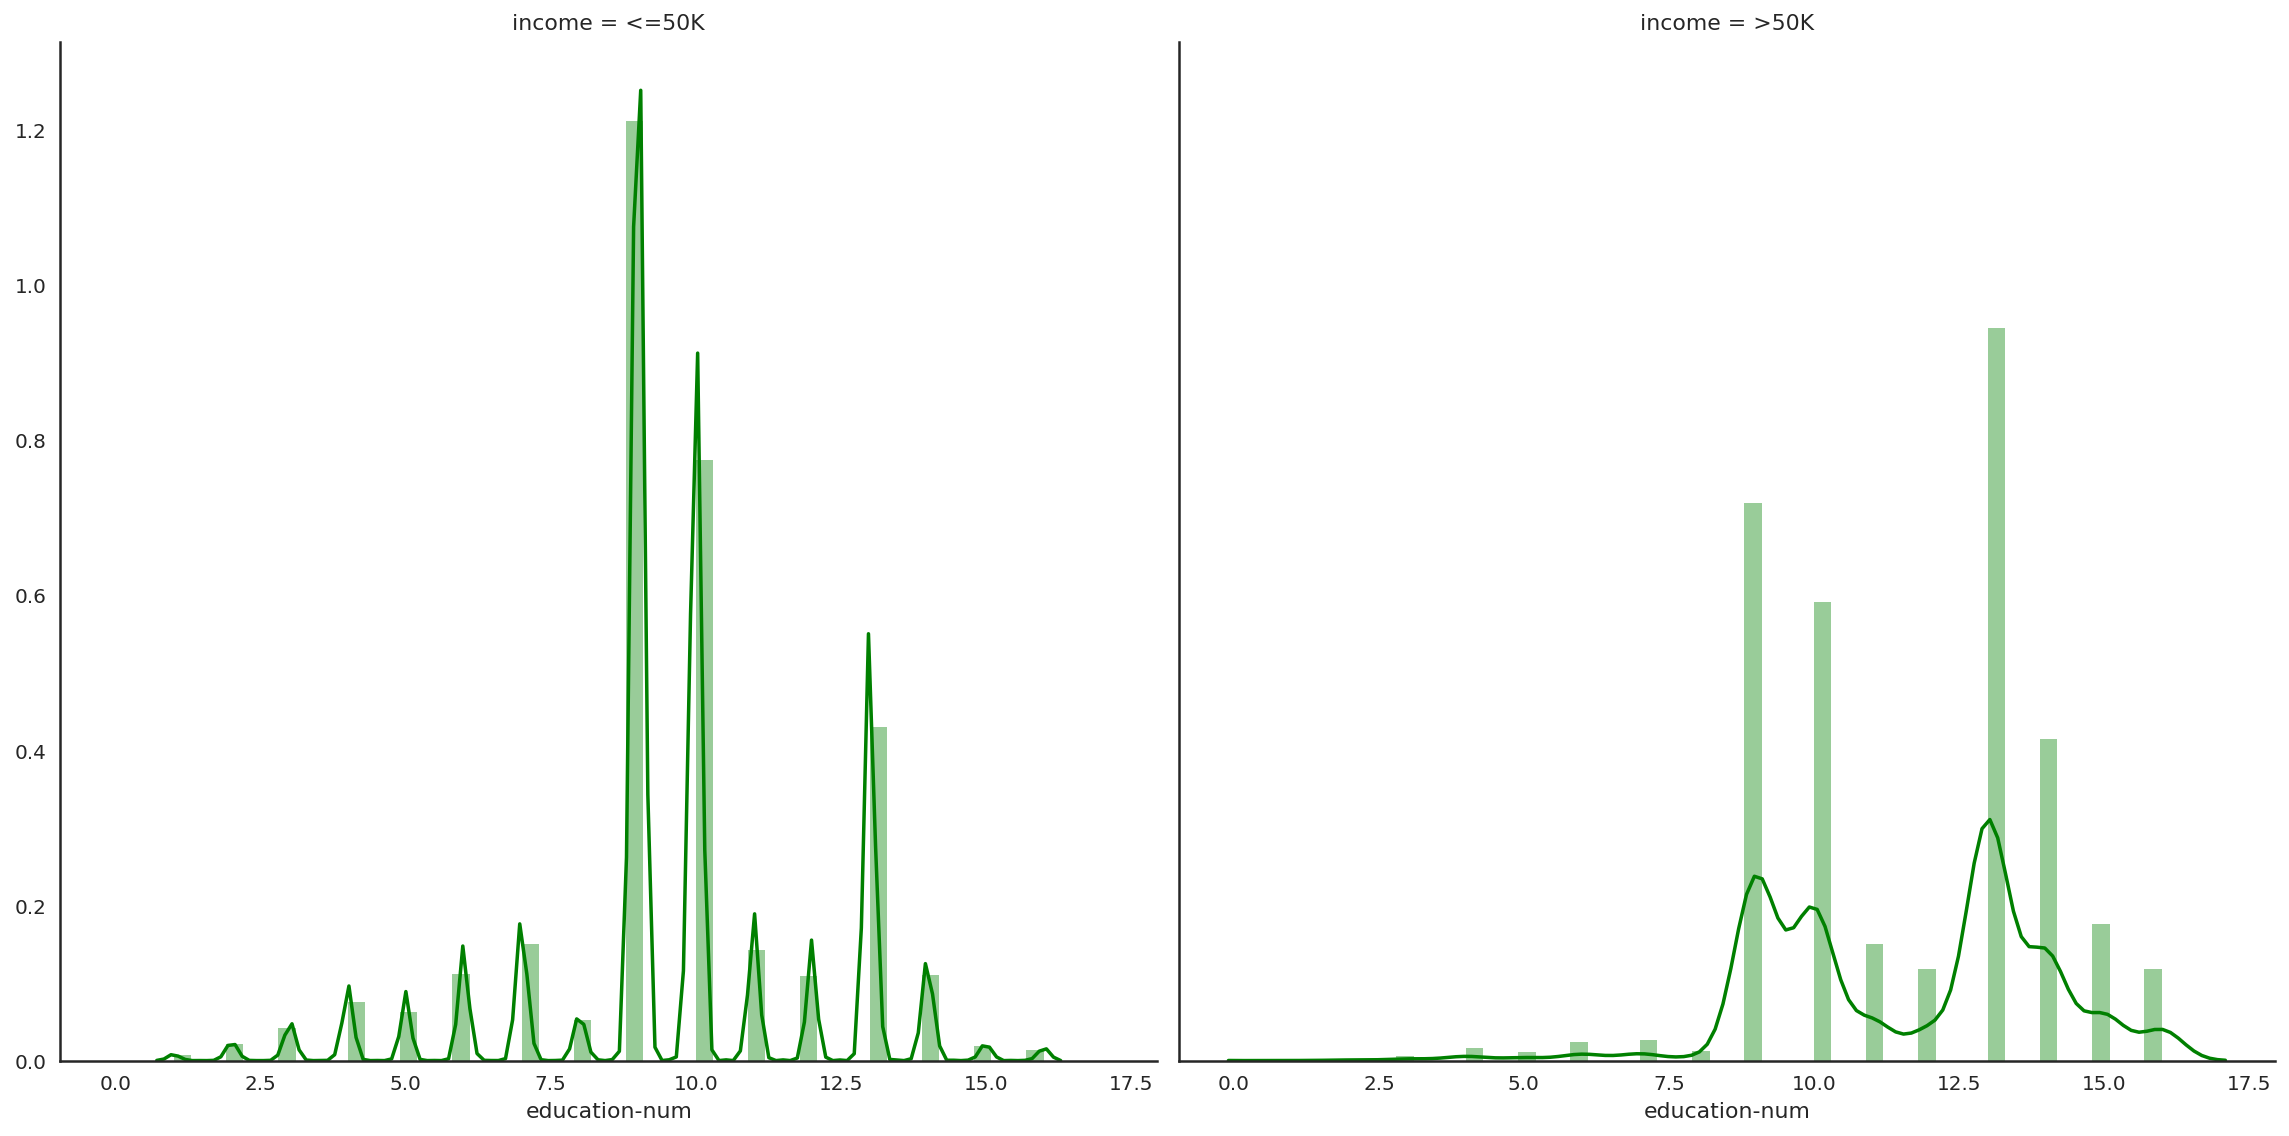

In [249]:
colname = "education-num"
g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
g = g.map(sns.distplot, colname, color='g')

## 2.2.6 occupation

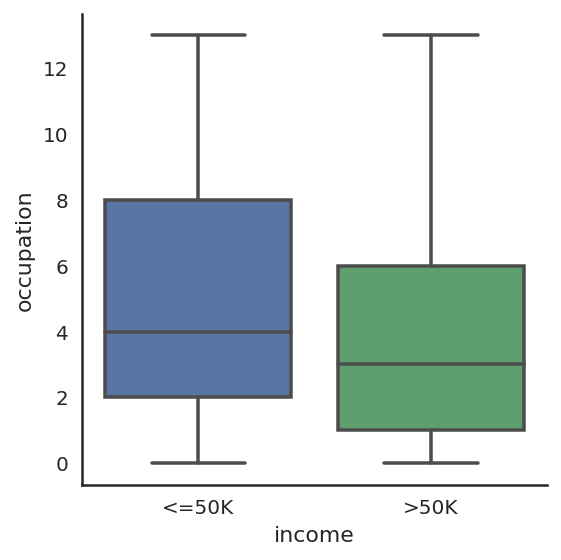

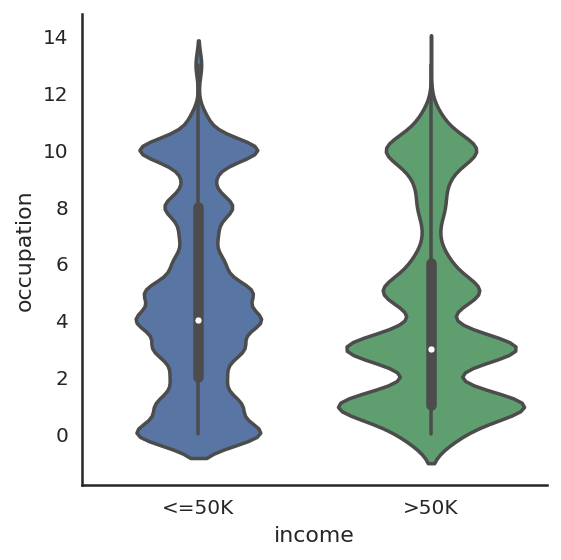

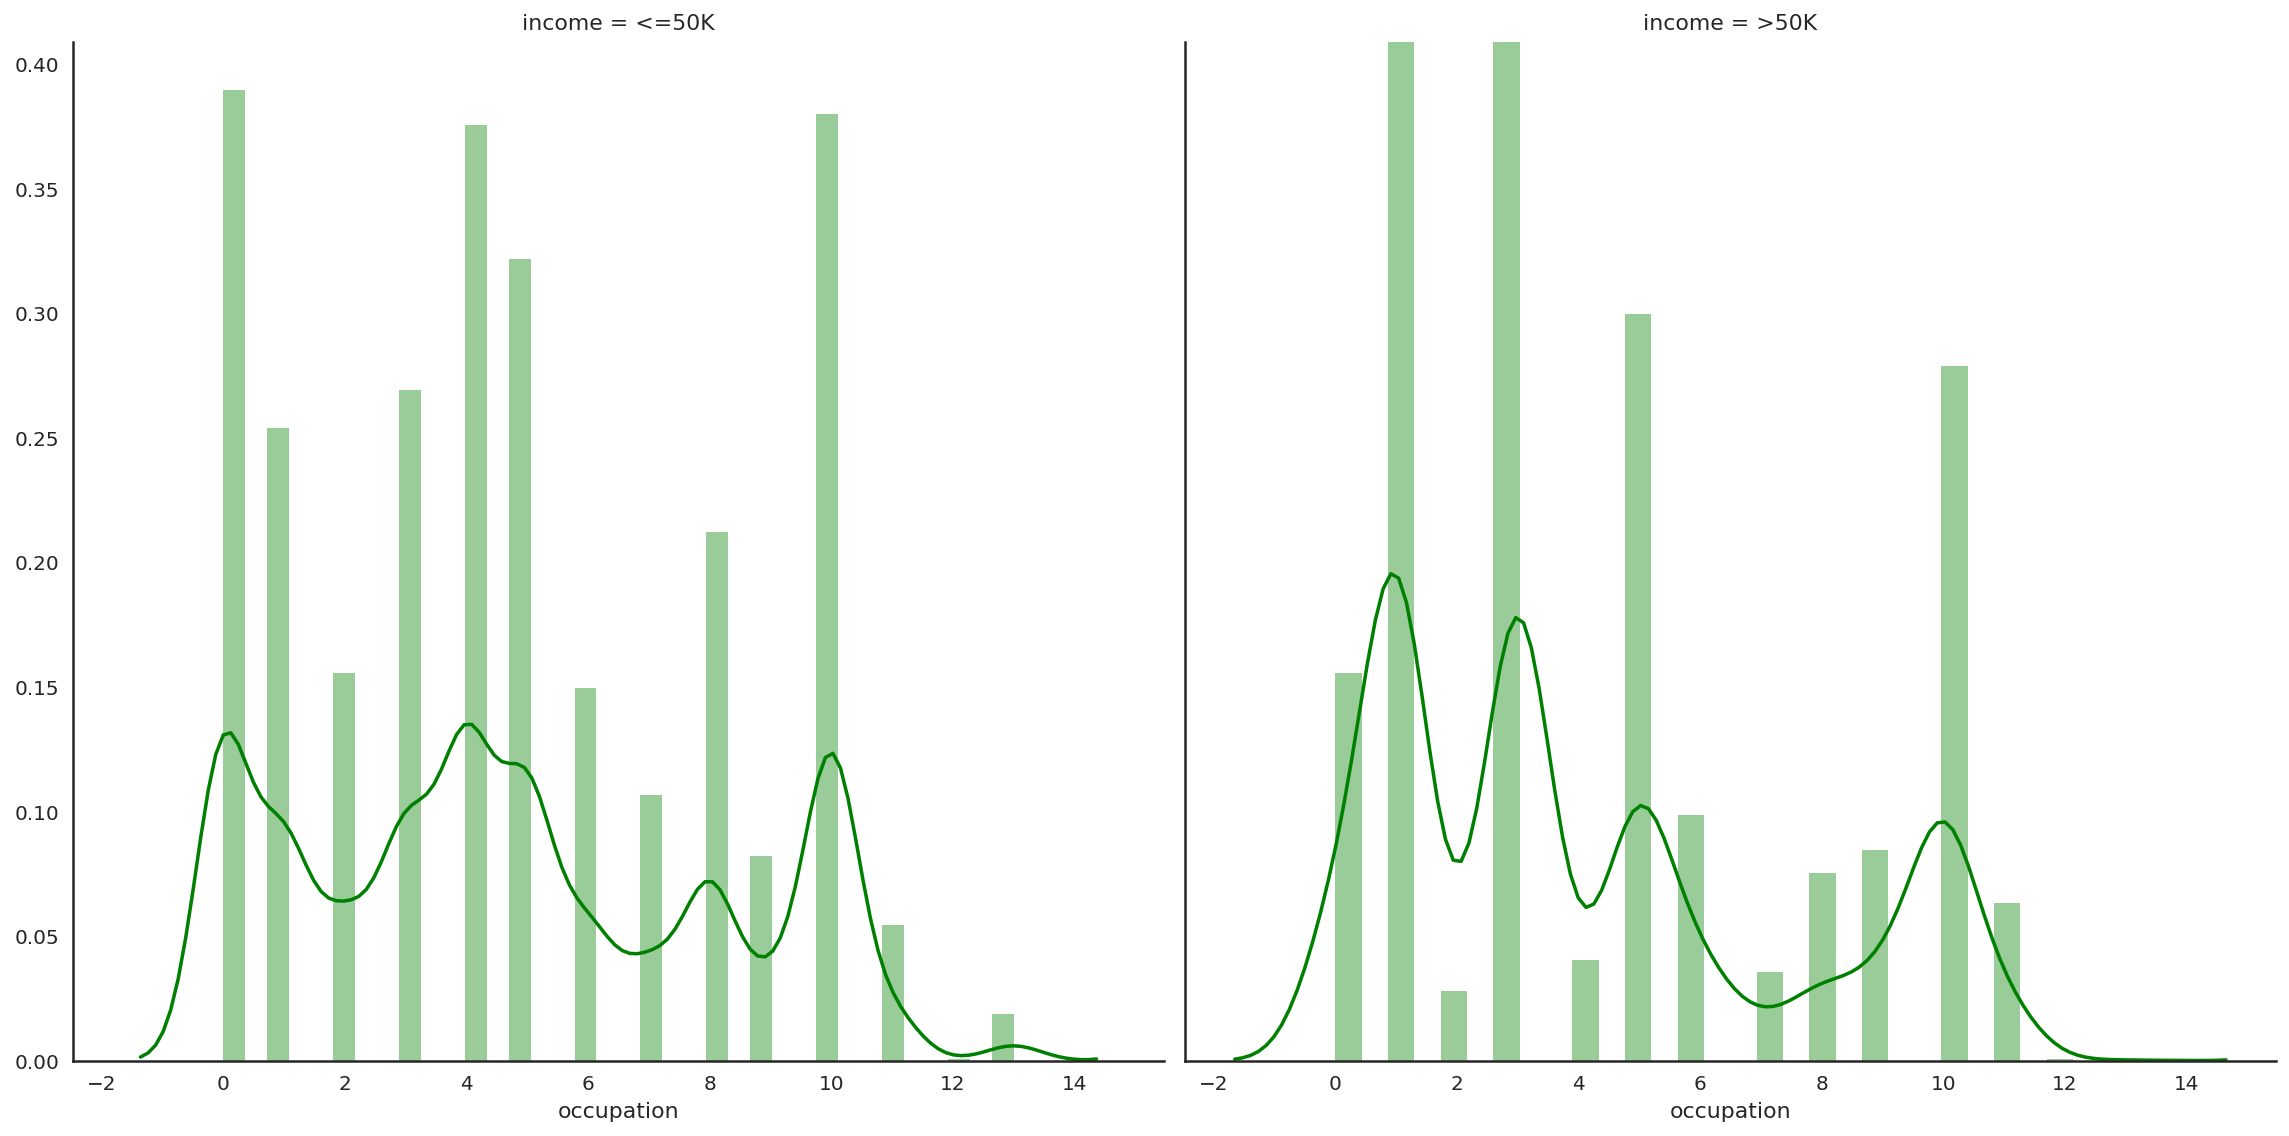

In [250]:
colname = "occupation"
g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
# selfxticklabels(colname)
g = g.map(sns.distplot, colname, color='g')

### 2.2.7 race

race
{' White': 0, ' Black': 1, ' Asian-Pac-Islander': 2, ' Amer-Indian-Eskimo': 3, ' Other': 4}
['0.0', ' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other']


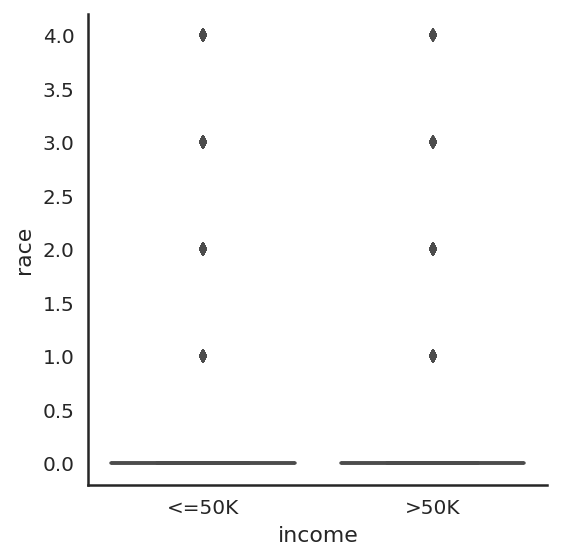

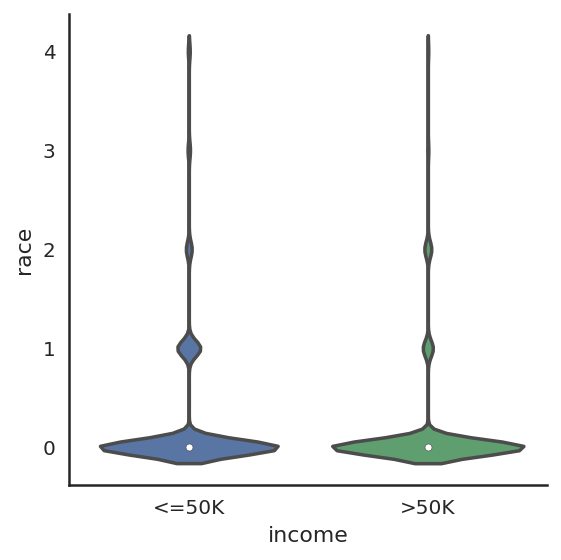

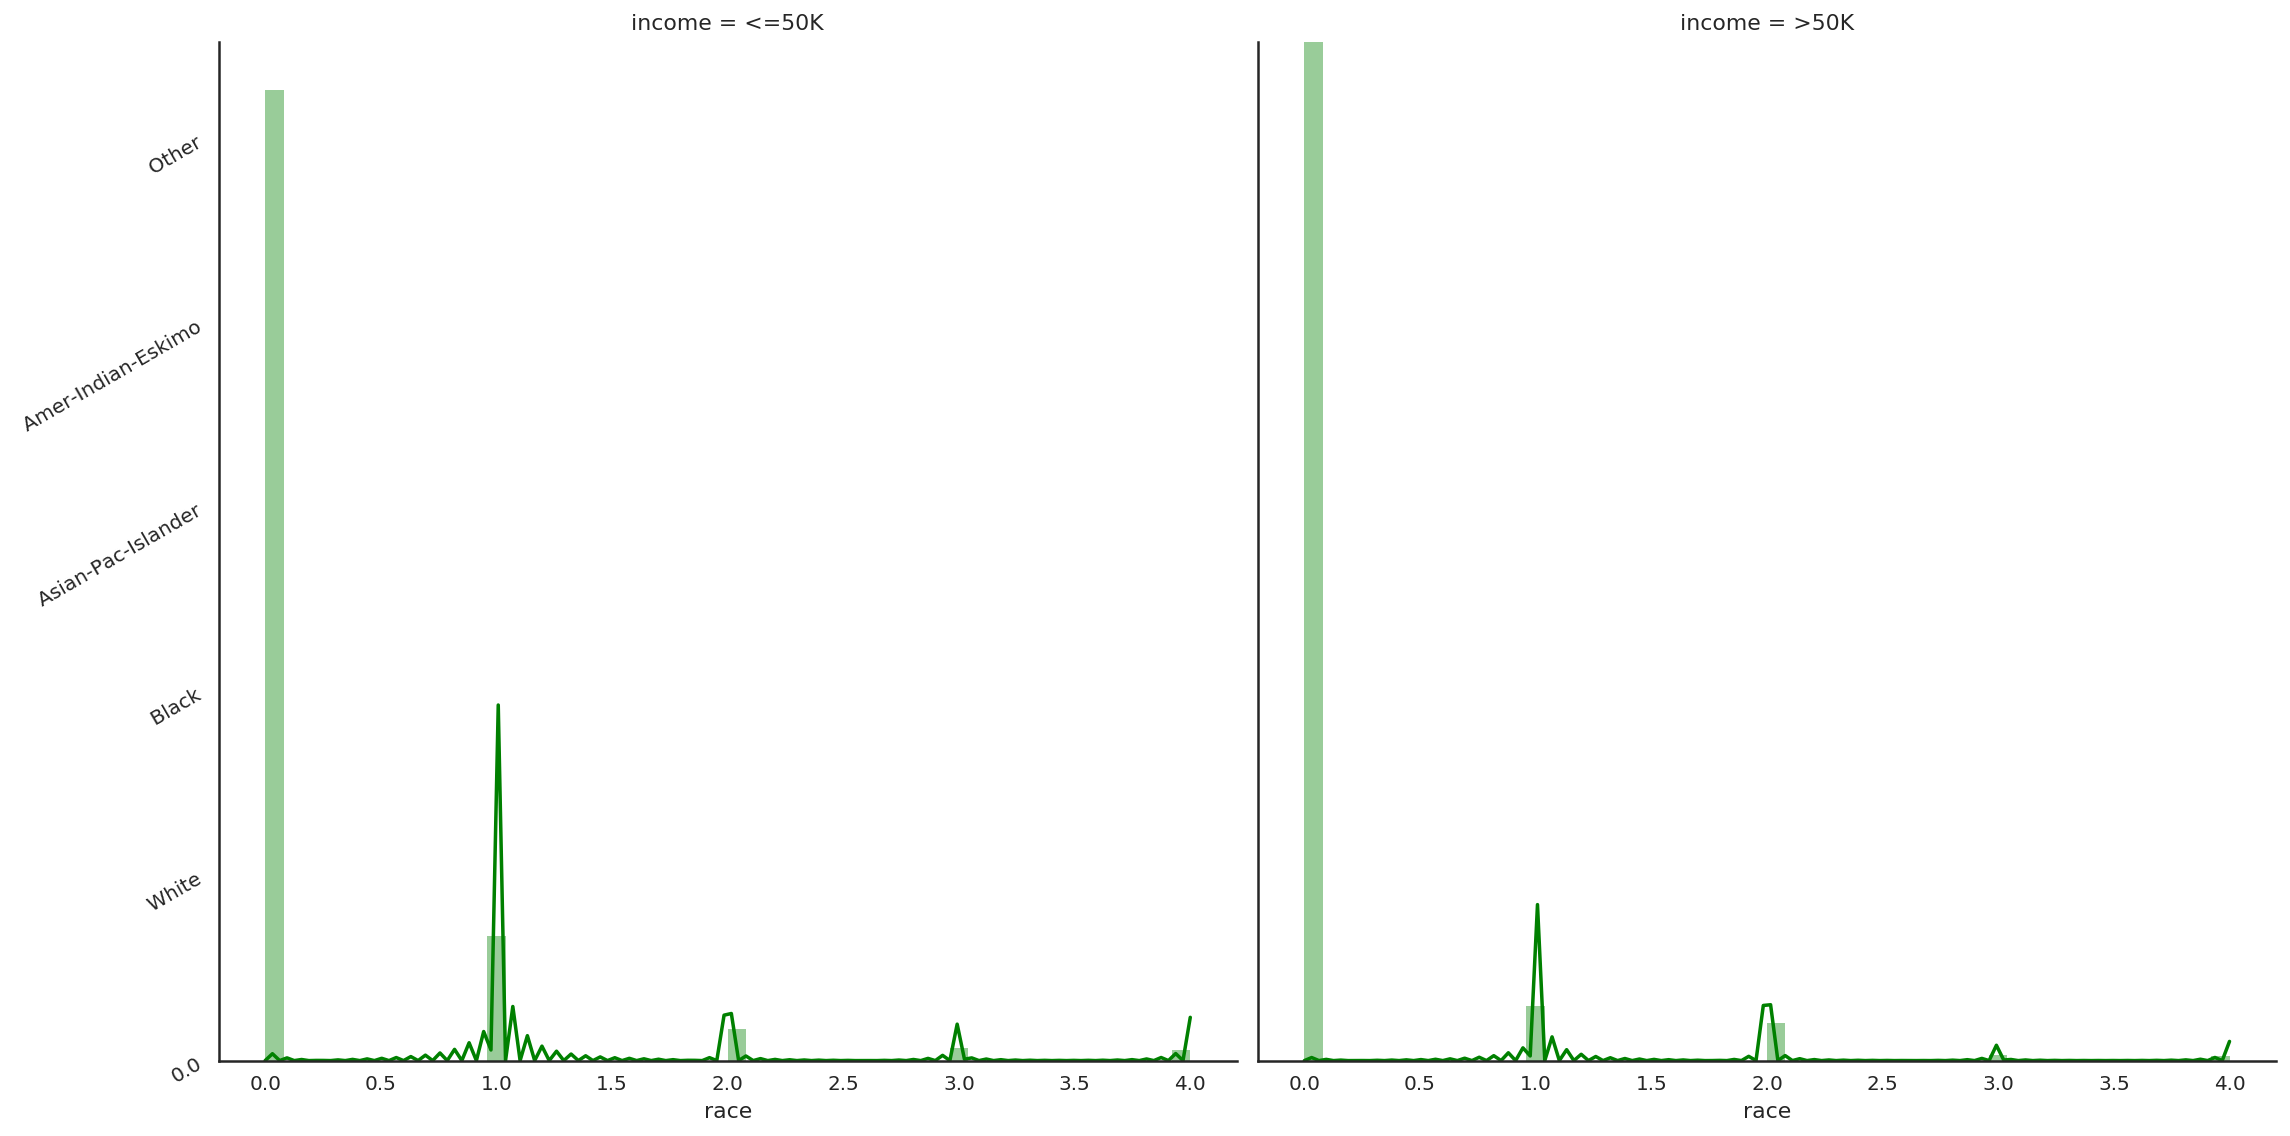

In [251]:
colname = "race"
g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
yticklabels = selfyticklabels(colname)
g.set_yticklabels(labels = yticklabels,rotation=30)
g = g.map(sns.distplot, colname, color='g')

In [252]:
colmap.get(colname)

{' Amer-Indian-Eskimo': 3,
 ' Asian-Pac-Islander': 2,
 ' Black': 1,
 ' Other': 4,
 ' White': 0}

## 2.2.8 sex

In [253]:
# colname = "sex"
# g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
# g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
# g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
# g = g.map(sns.distplot, colname, color='g')

## 2.2.9 capital-gain

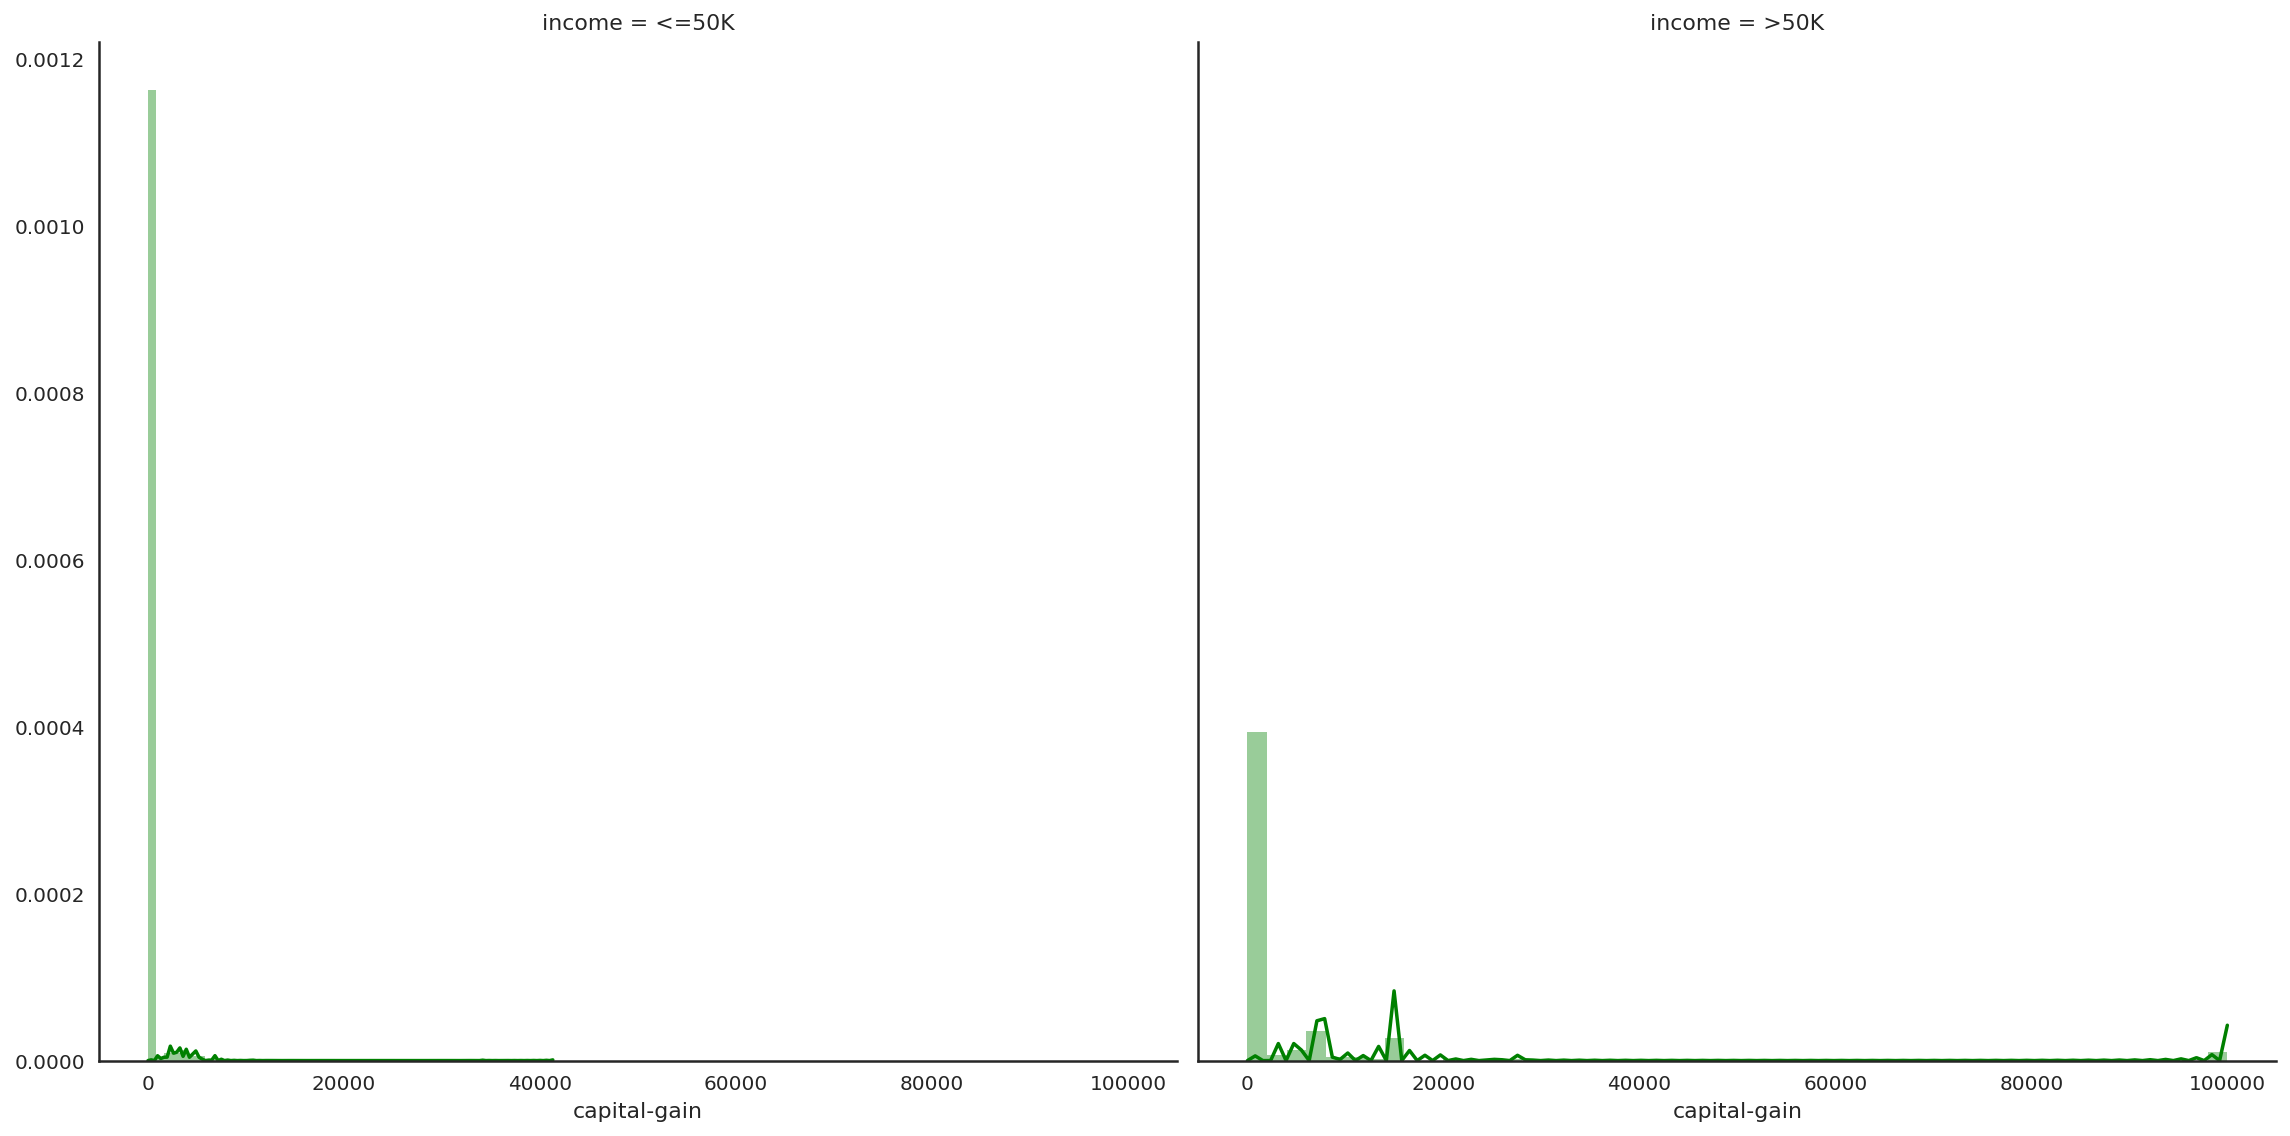

In [254]:
colname = "capital-gain"
# g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
# g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
g = g.map(sns.distplot, colname, color='g')

## 2.2.10 capital-loss

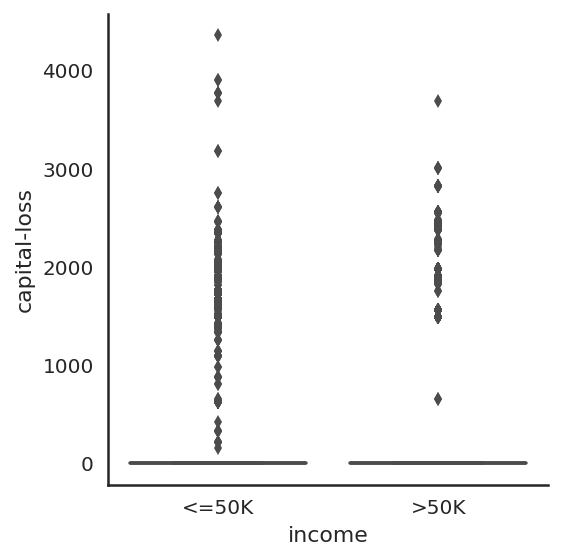

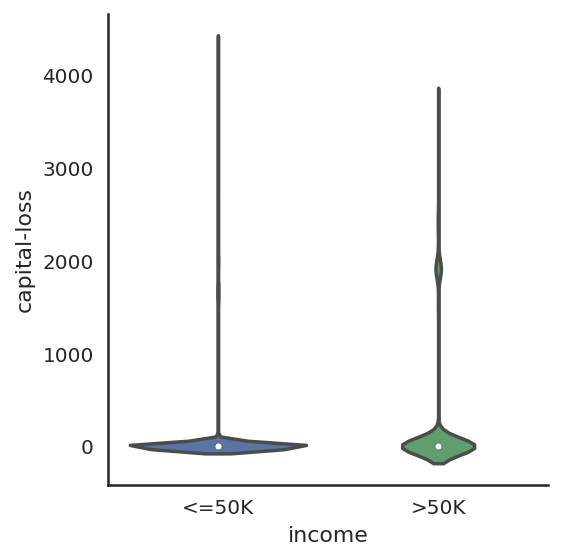

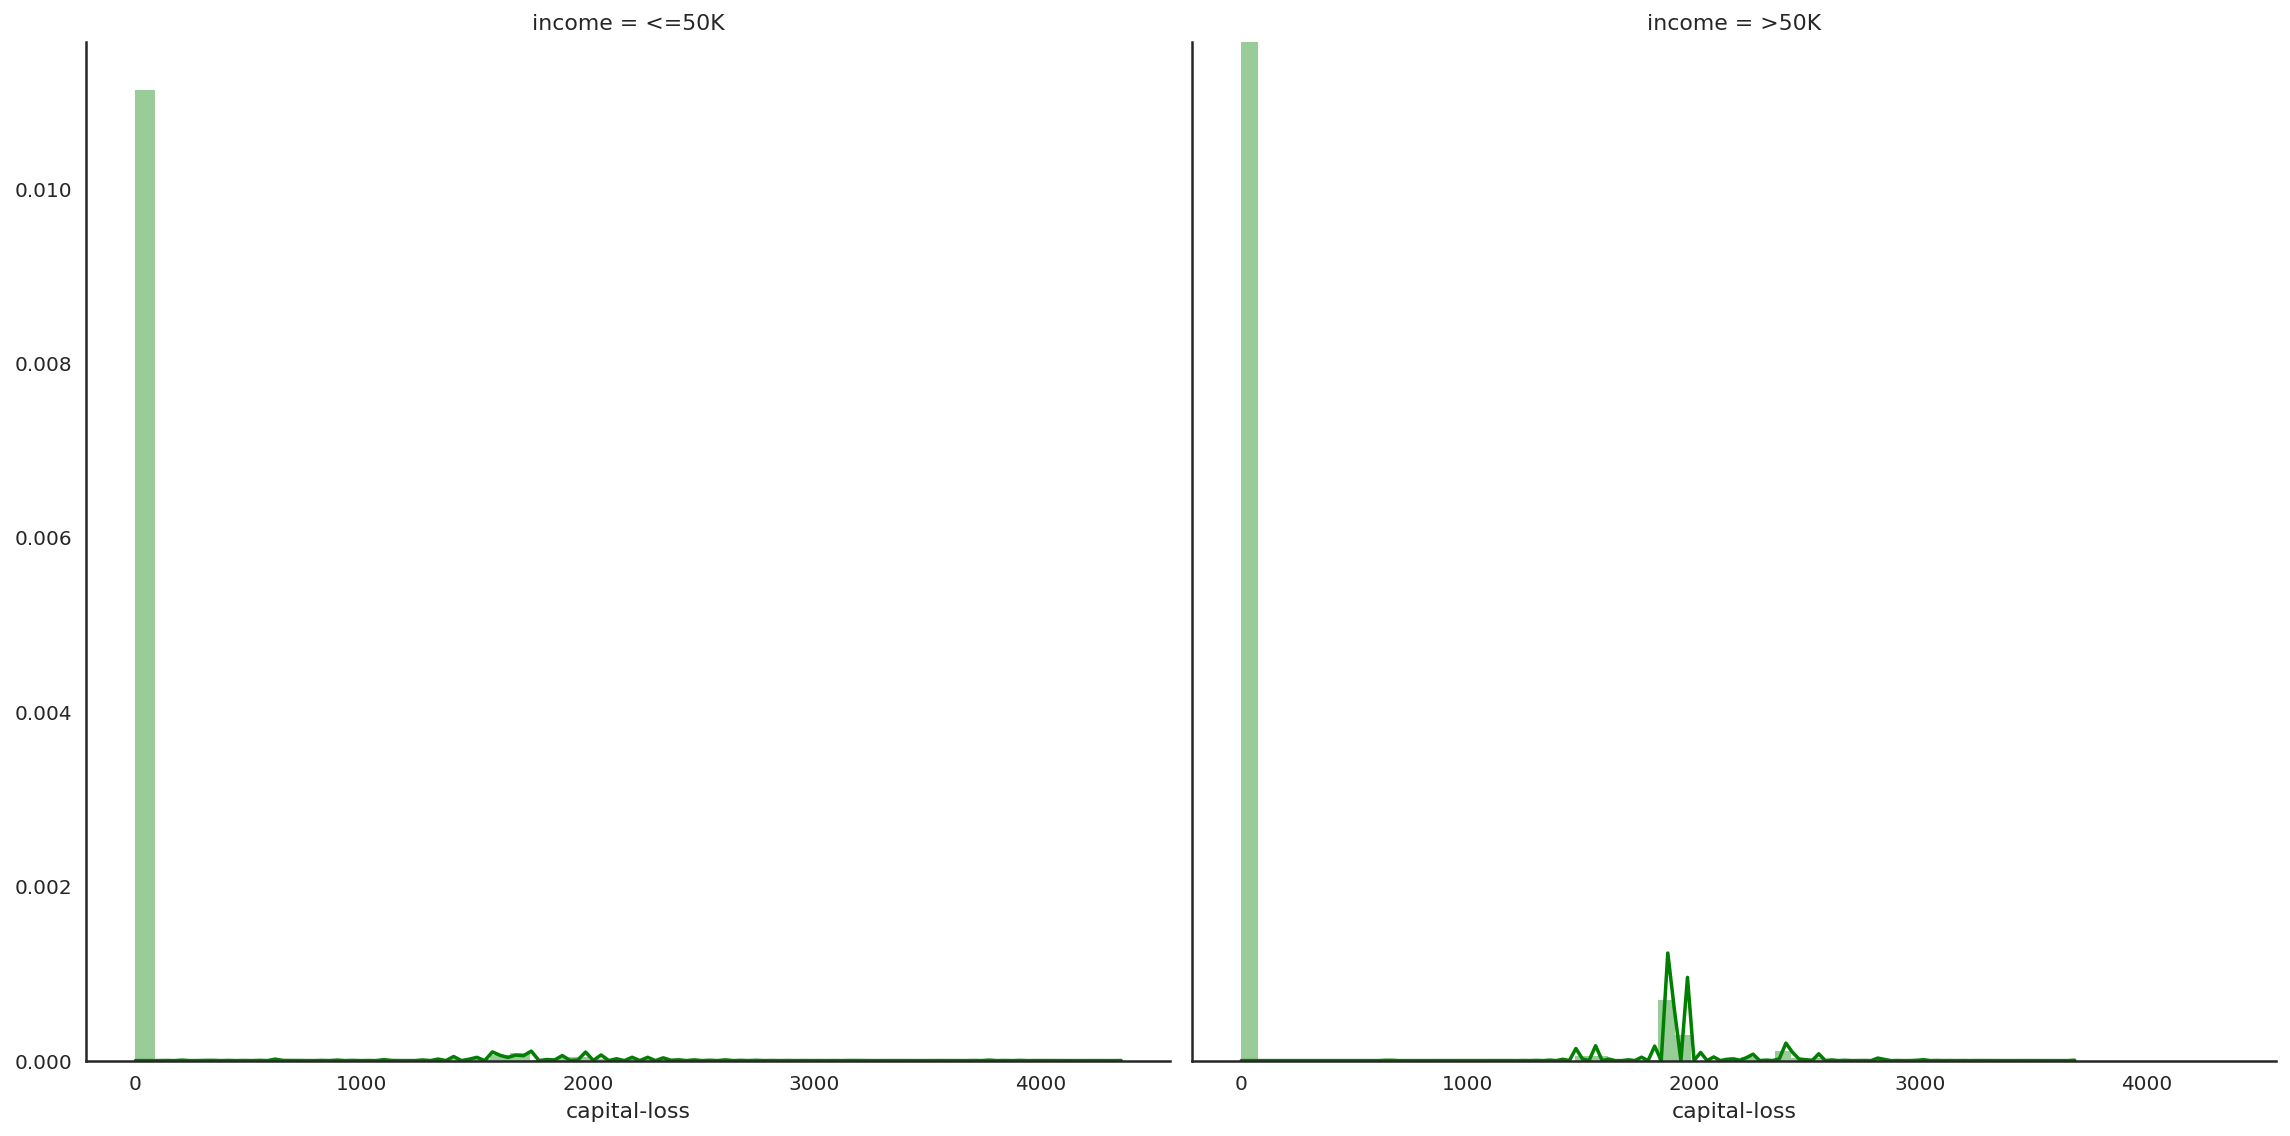

In [255]:
colname = "capital-loss"
g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
g = g.map(sns.distplot, colname, color='g')

## 2.2.11 native-country

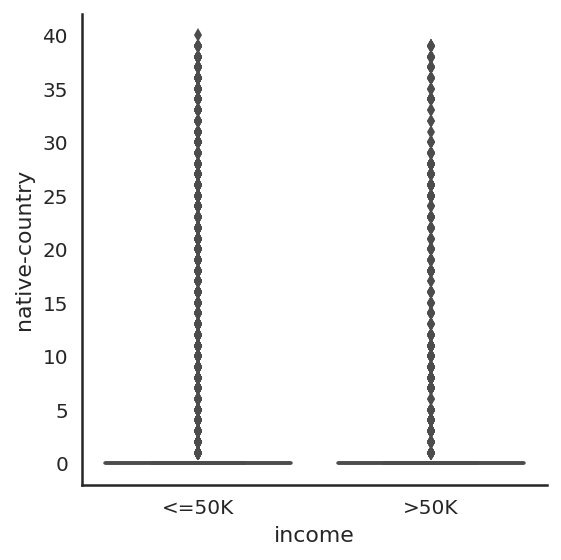

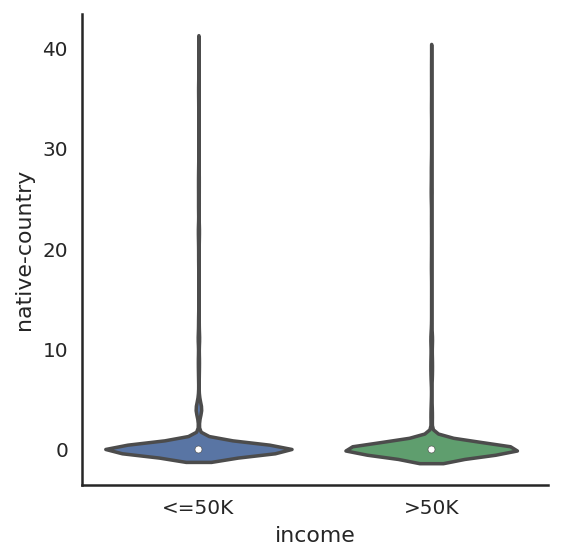

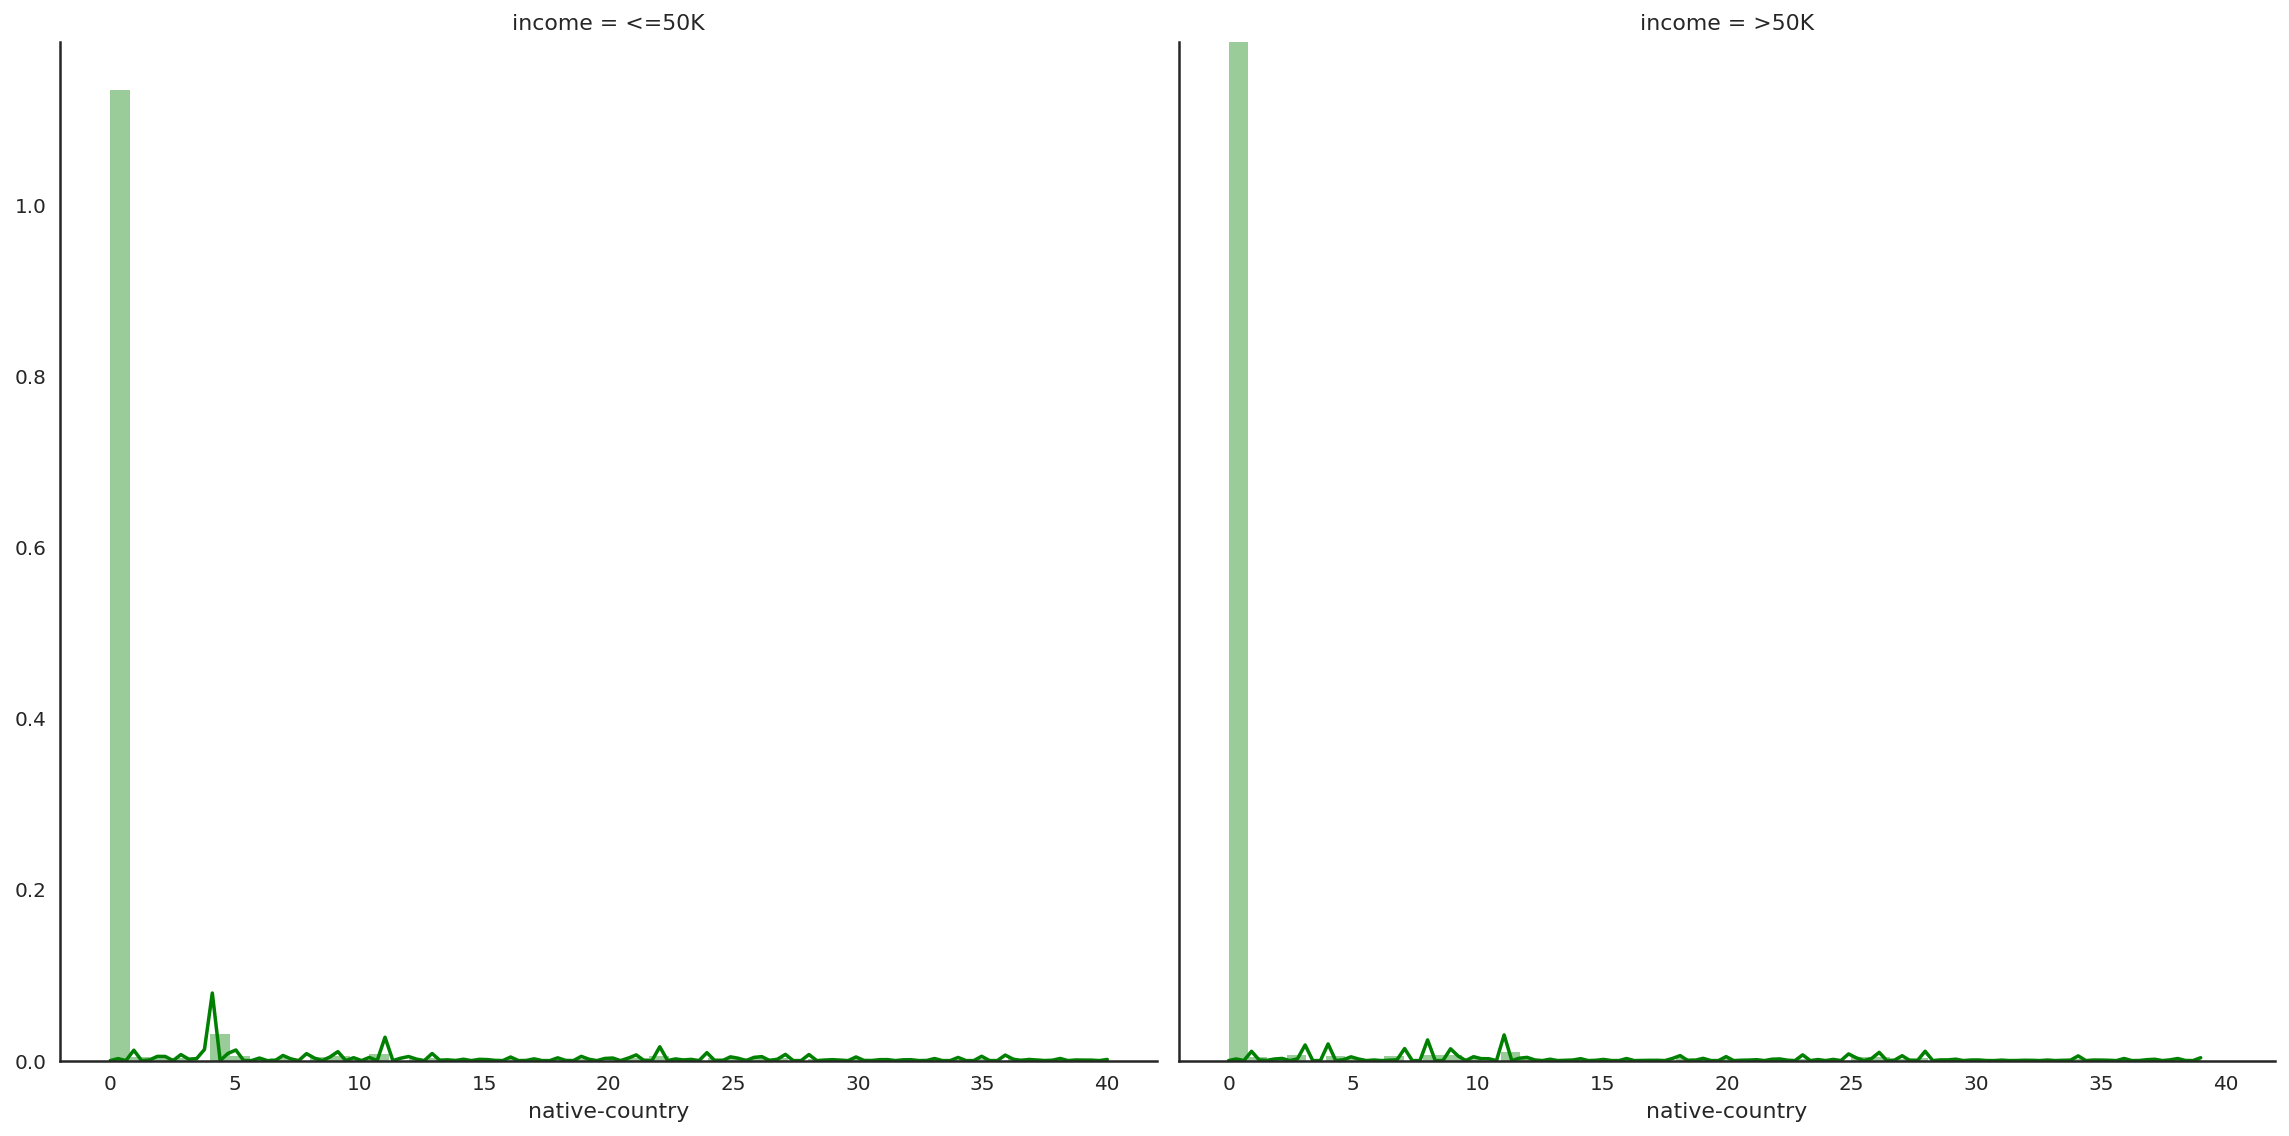

In [256]:
colname = "native-country"
g = sns.factorplot(x="income", y = colname, data = fdata, kind="box")
g = sns.factorplot(x="income", y = colname, data = fdata, kind="violin")
g = sns.FacetGrid(fdata, col='income', size=8, palette="muted", col_wrap=2, aspect=1)
g = g.map(sns.distplot, colname, color='g')

In [257]:
# Explore Age vs Sex, Parch , Pclass and SibSP
# g = sns.factorplot(y="income",x="age",data=fdata,kind="box")
# g = sns.factorplot(y="income",x="race", data=fdata,kind="box")
# g = sns.factorplot(y="income",x="education_level", data=fdata,kind="box")
# g = sns.factorplot(y="income",x="education-num", data=fdata,kind="box")

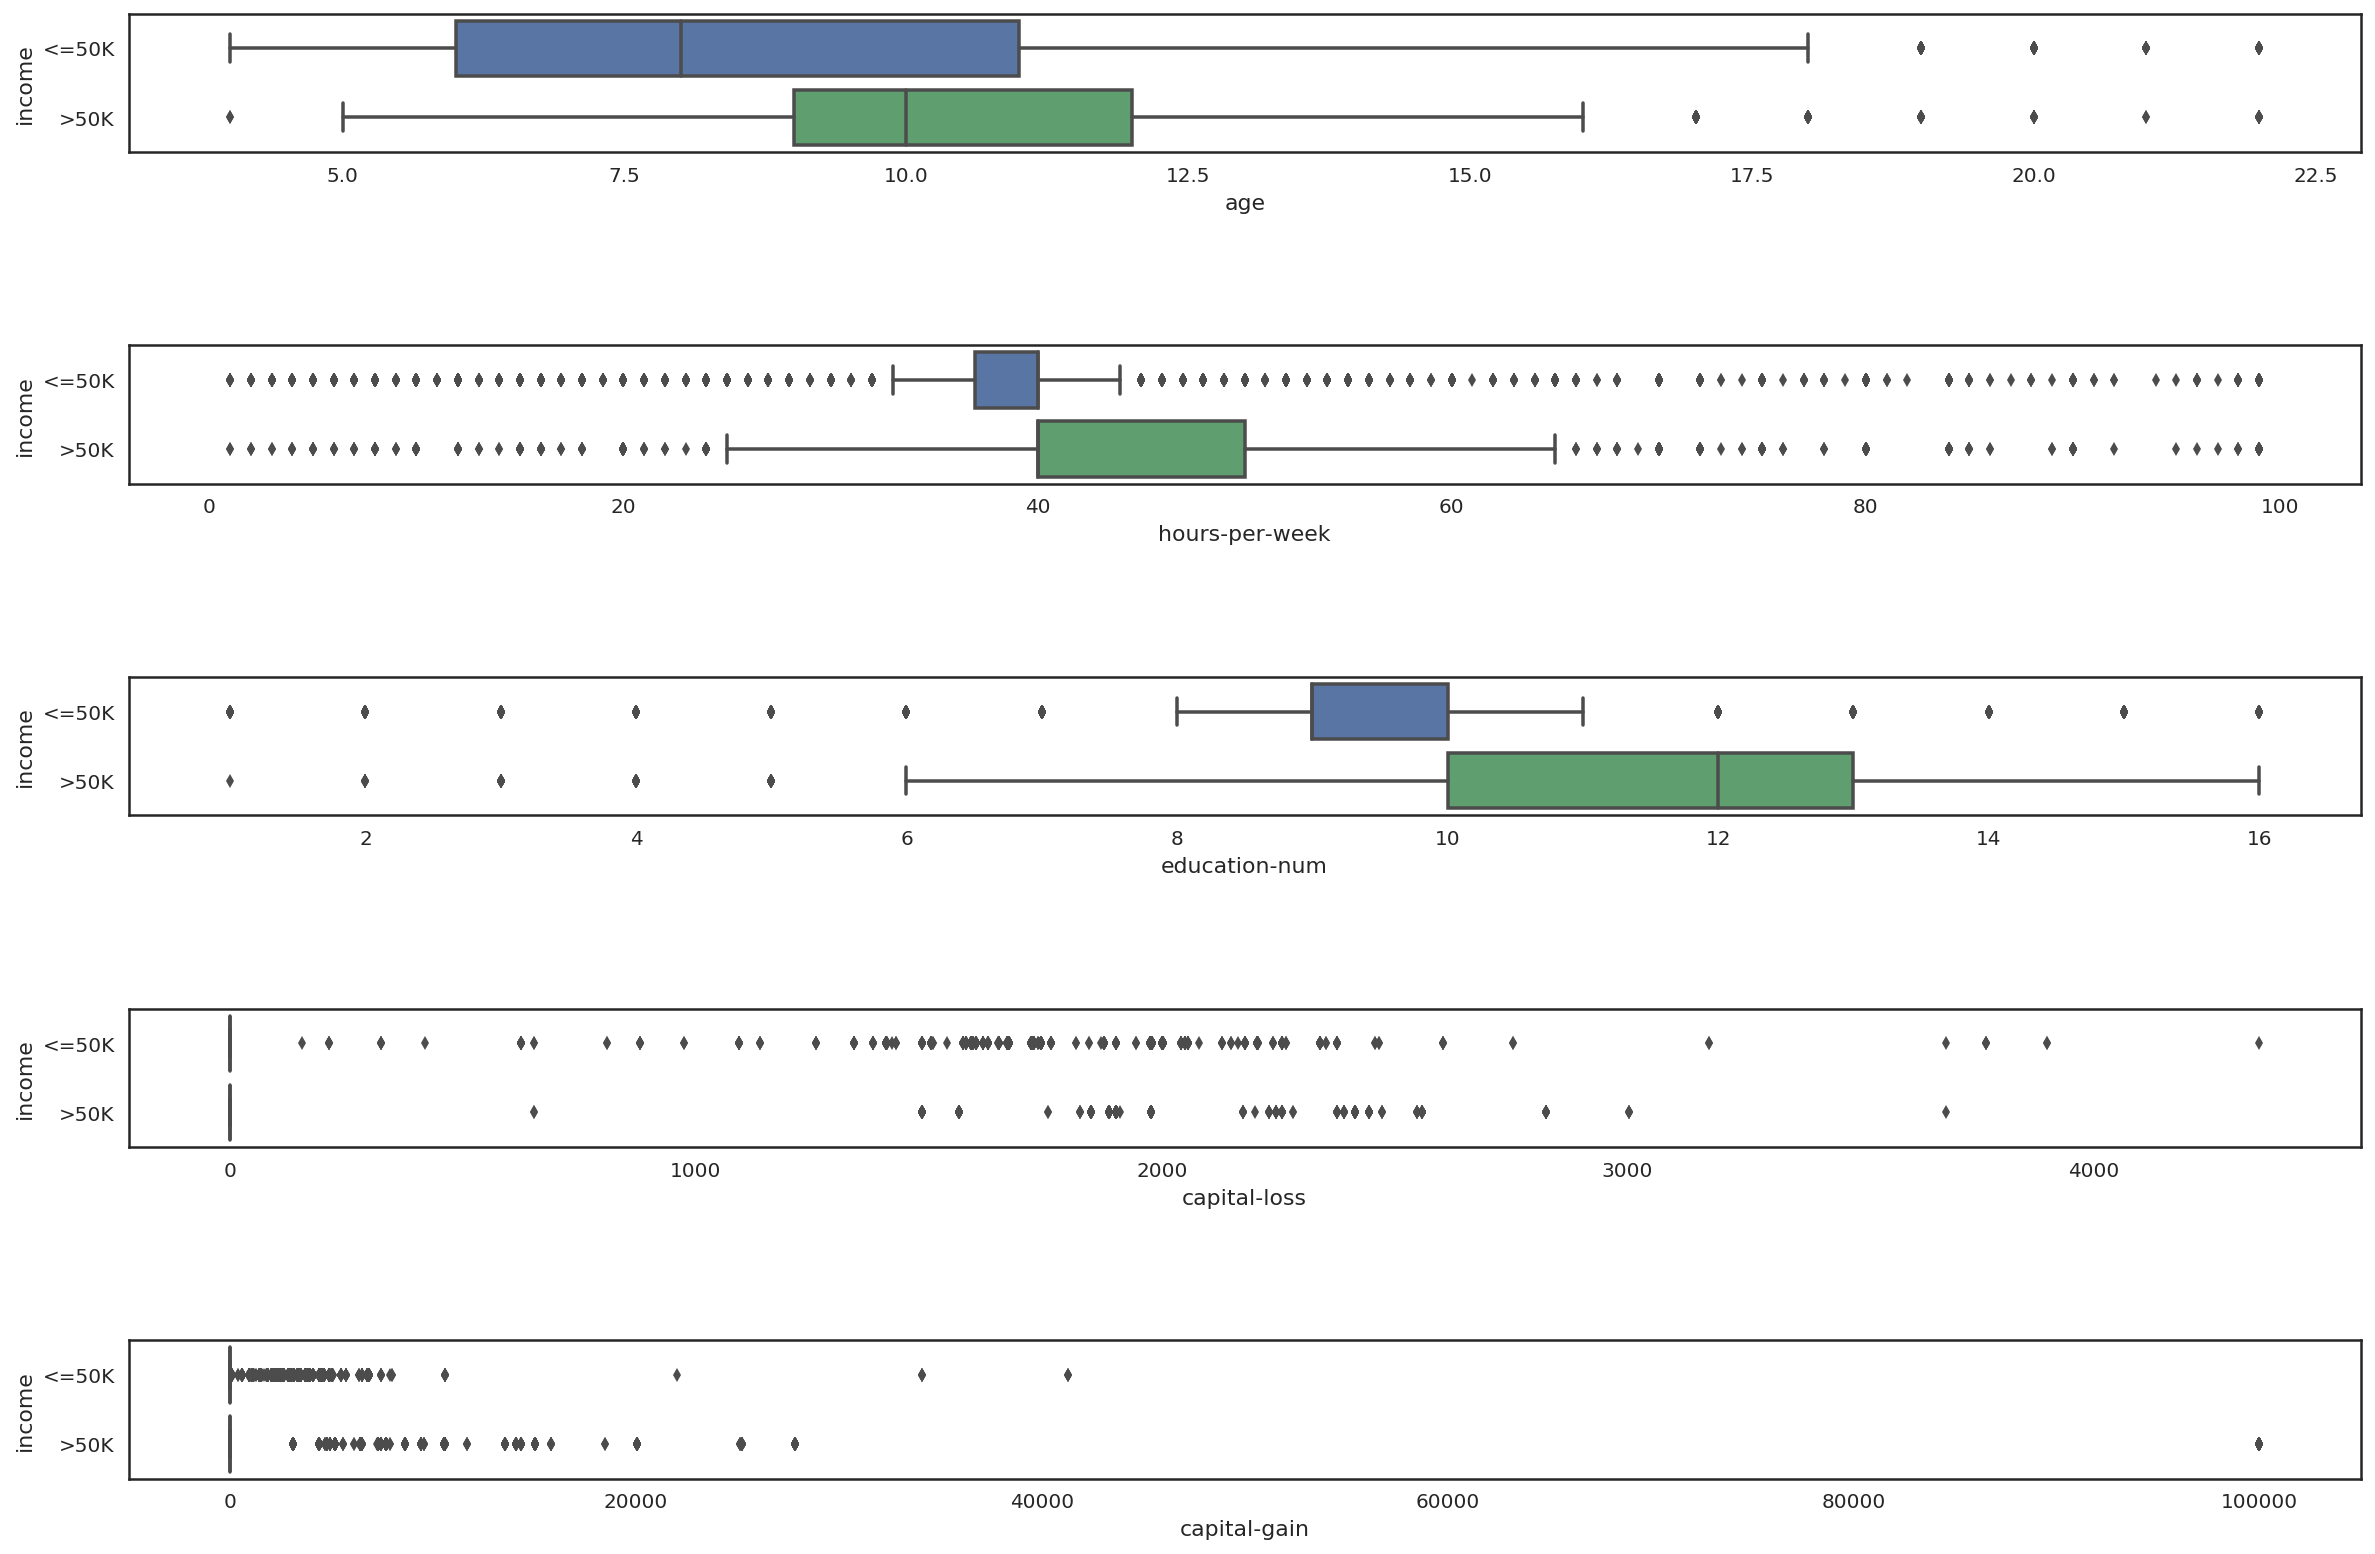

In [258]:
# fdata['age'].value_counts().plot(kind='bar', figsize=(20,16))
#  Seaborn中的boxplot，可以画箱线图，可以看出不同种类的分布情况
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(10,1,1)
ax2 = fig.add_subplot(10,1,3)
ax3 = fig.add_subplot(10,1,5)
ax4 = fig.add_subplot(10,1,7)
ax5 = fig.add_subplot(10,1,9)
%config InlineBackend.figure_format = 'retina'
sns.boxplot(x='age', y='income', data=fdata, ax=ax1)
sns.boxplot(x='hours-per-week', y='income', data=fdata,ax=ax2)
sns.boxplot(x='education-num', y='income', data=fdata,ax=ax3)
sns.boxplot(x='capital-loss', y='income', data=data,ax=ax4)
sns.boxplot(x='capital-gain', y='income', data=data,ax=ax5)

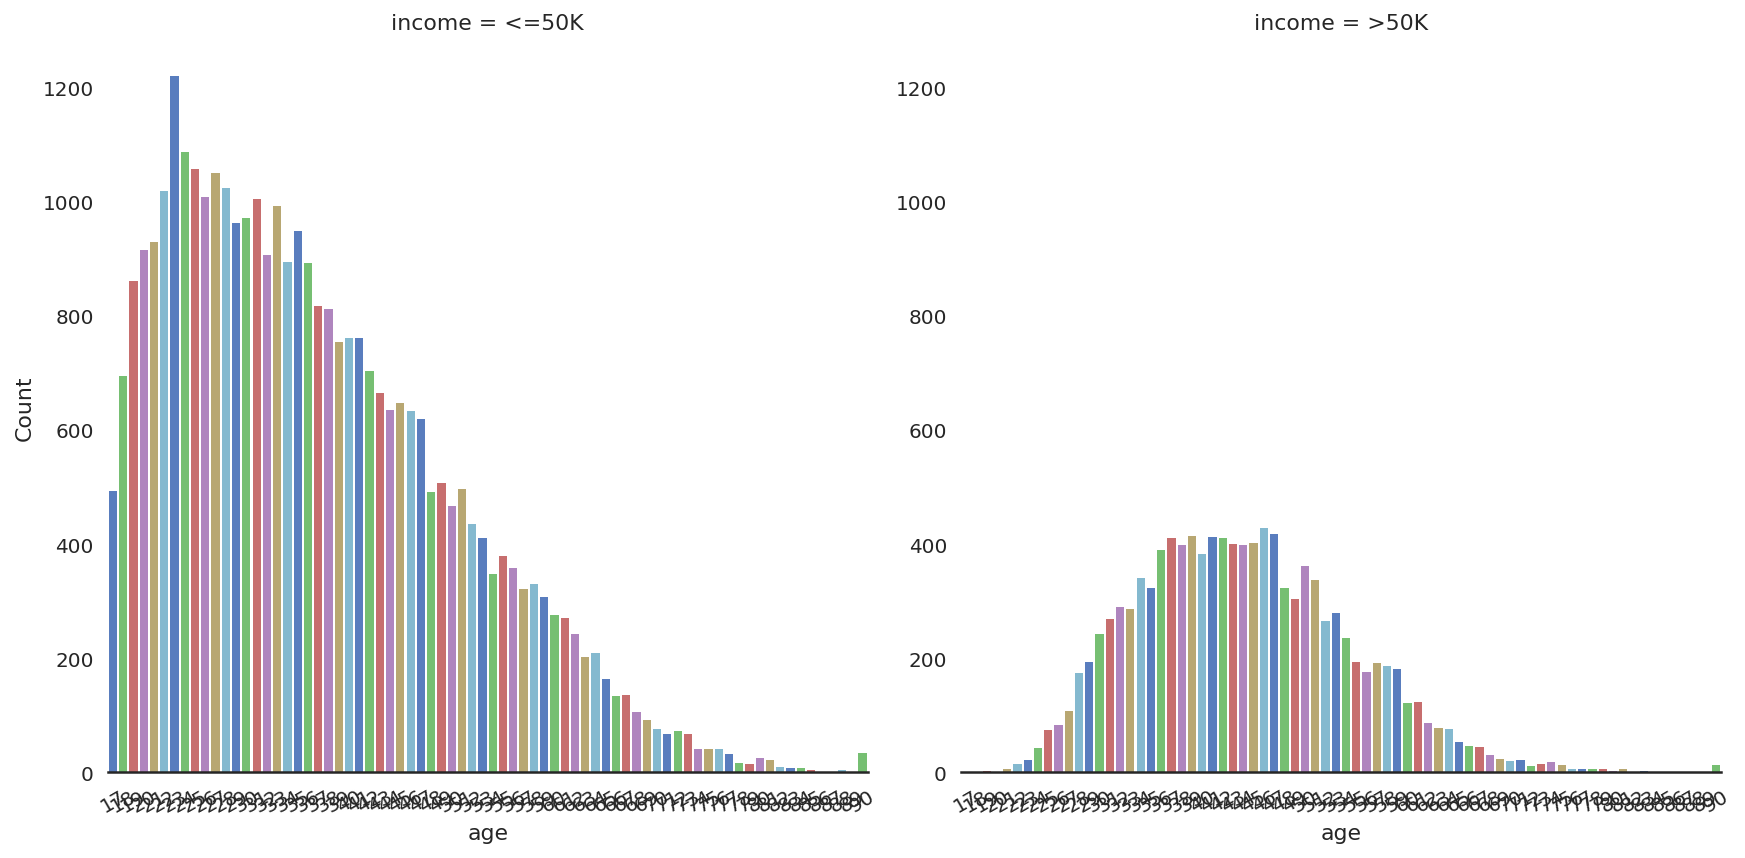

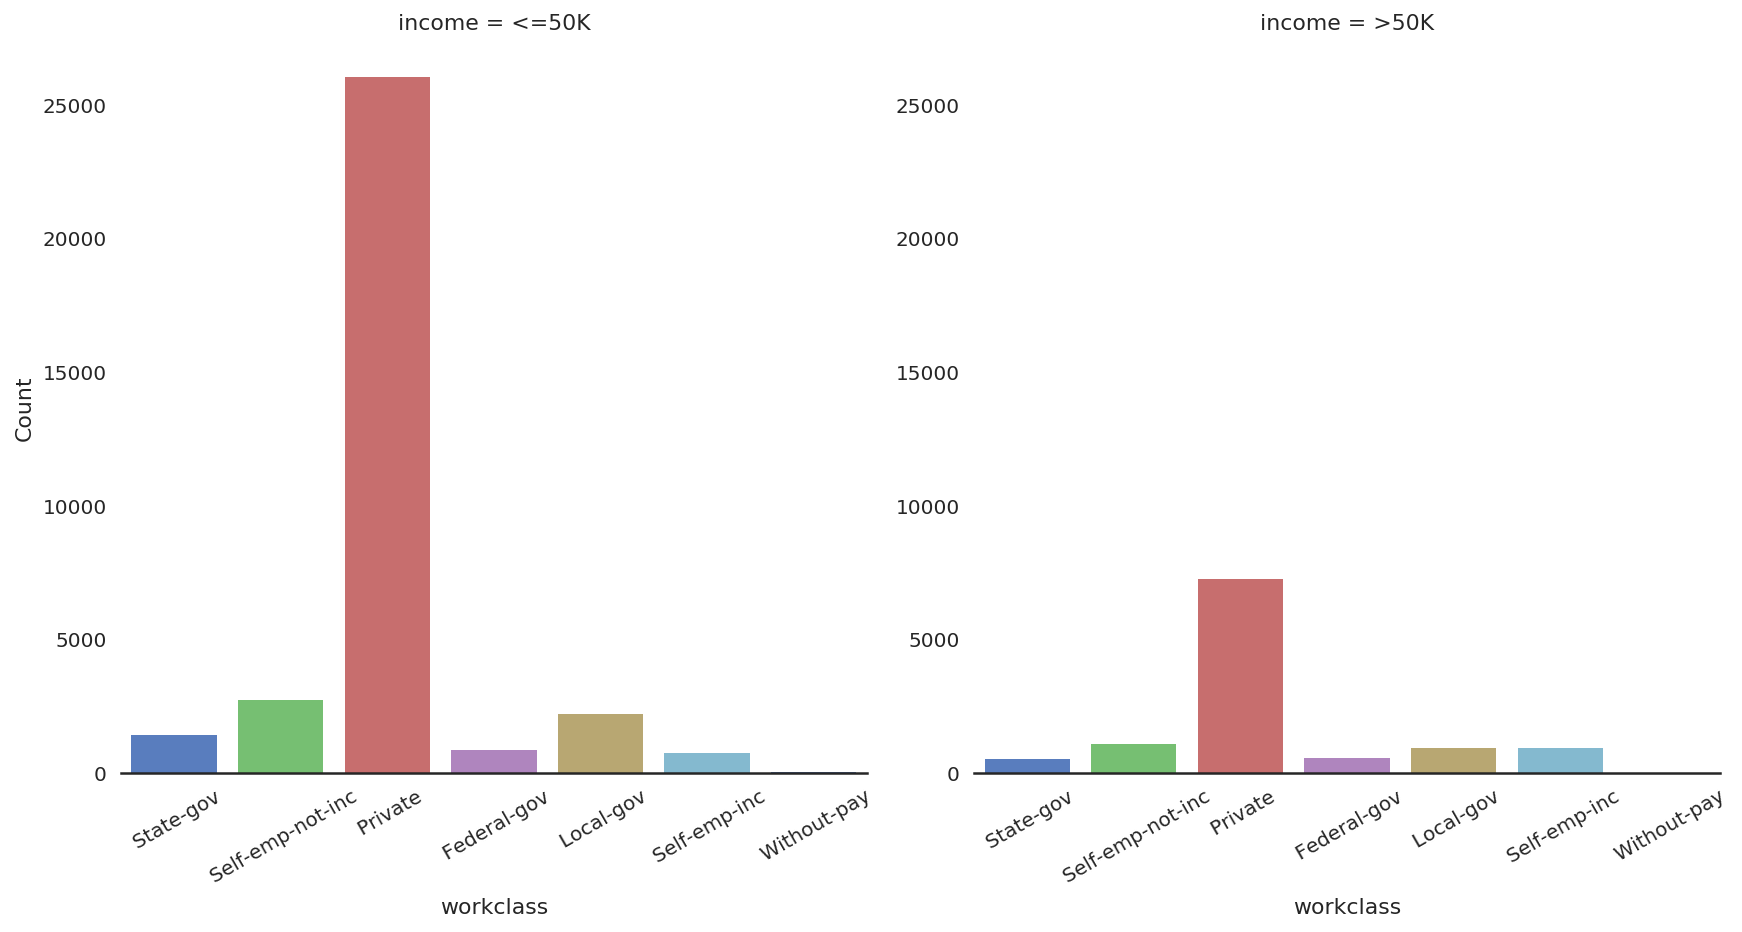

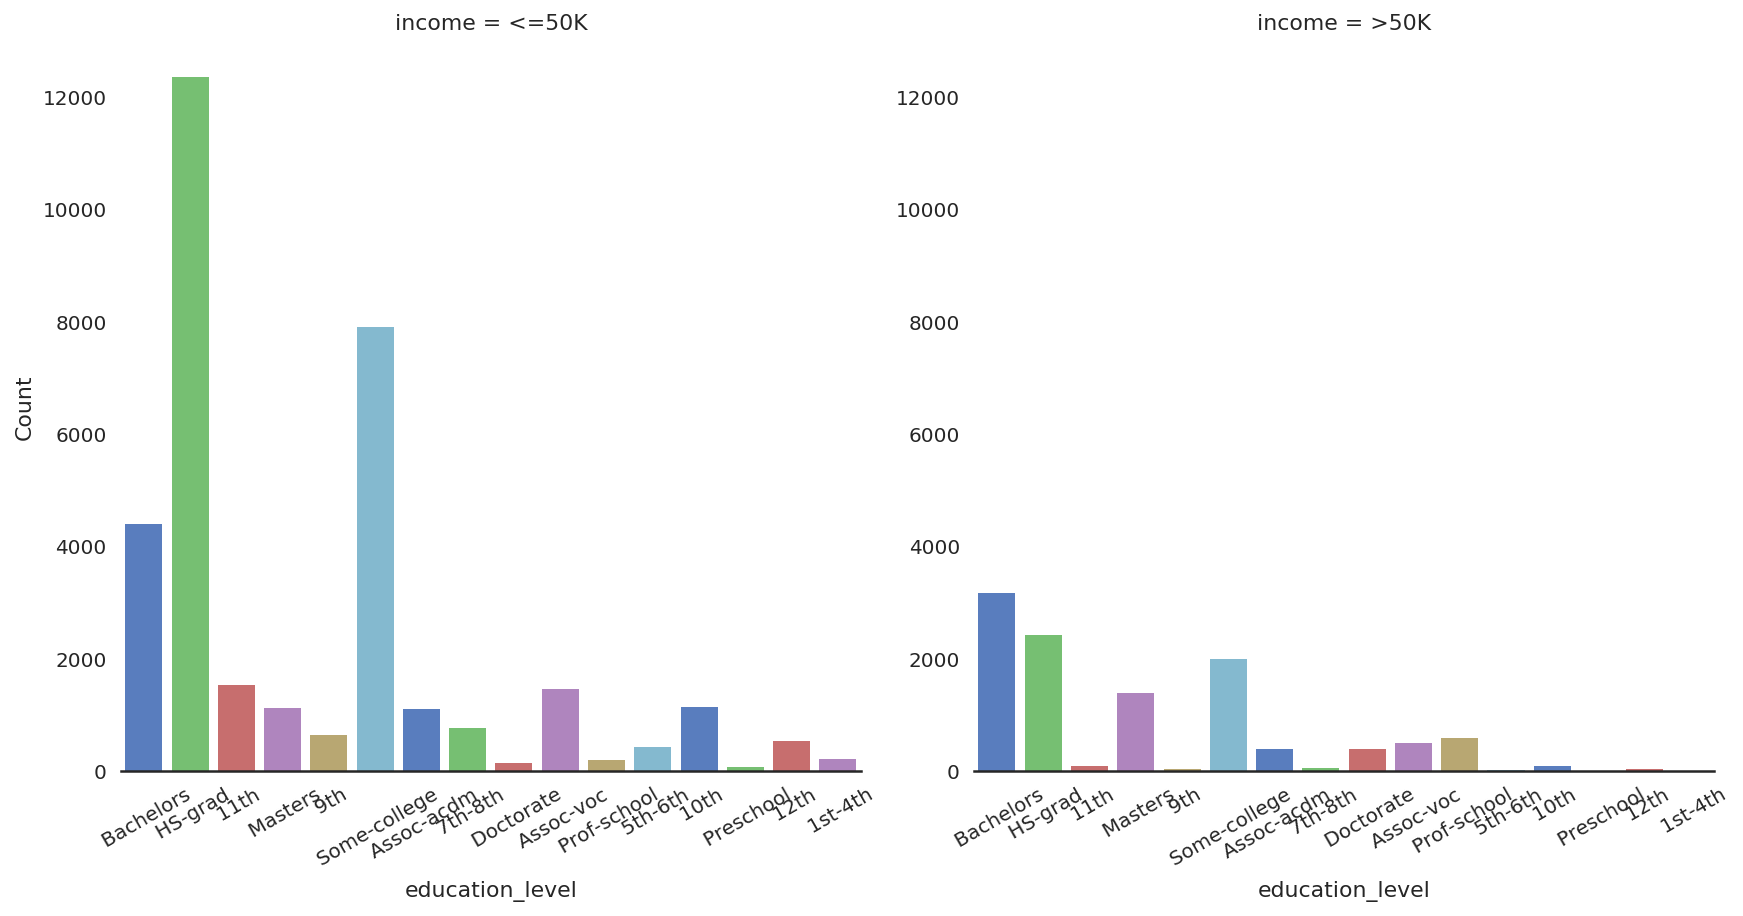

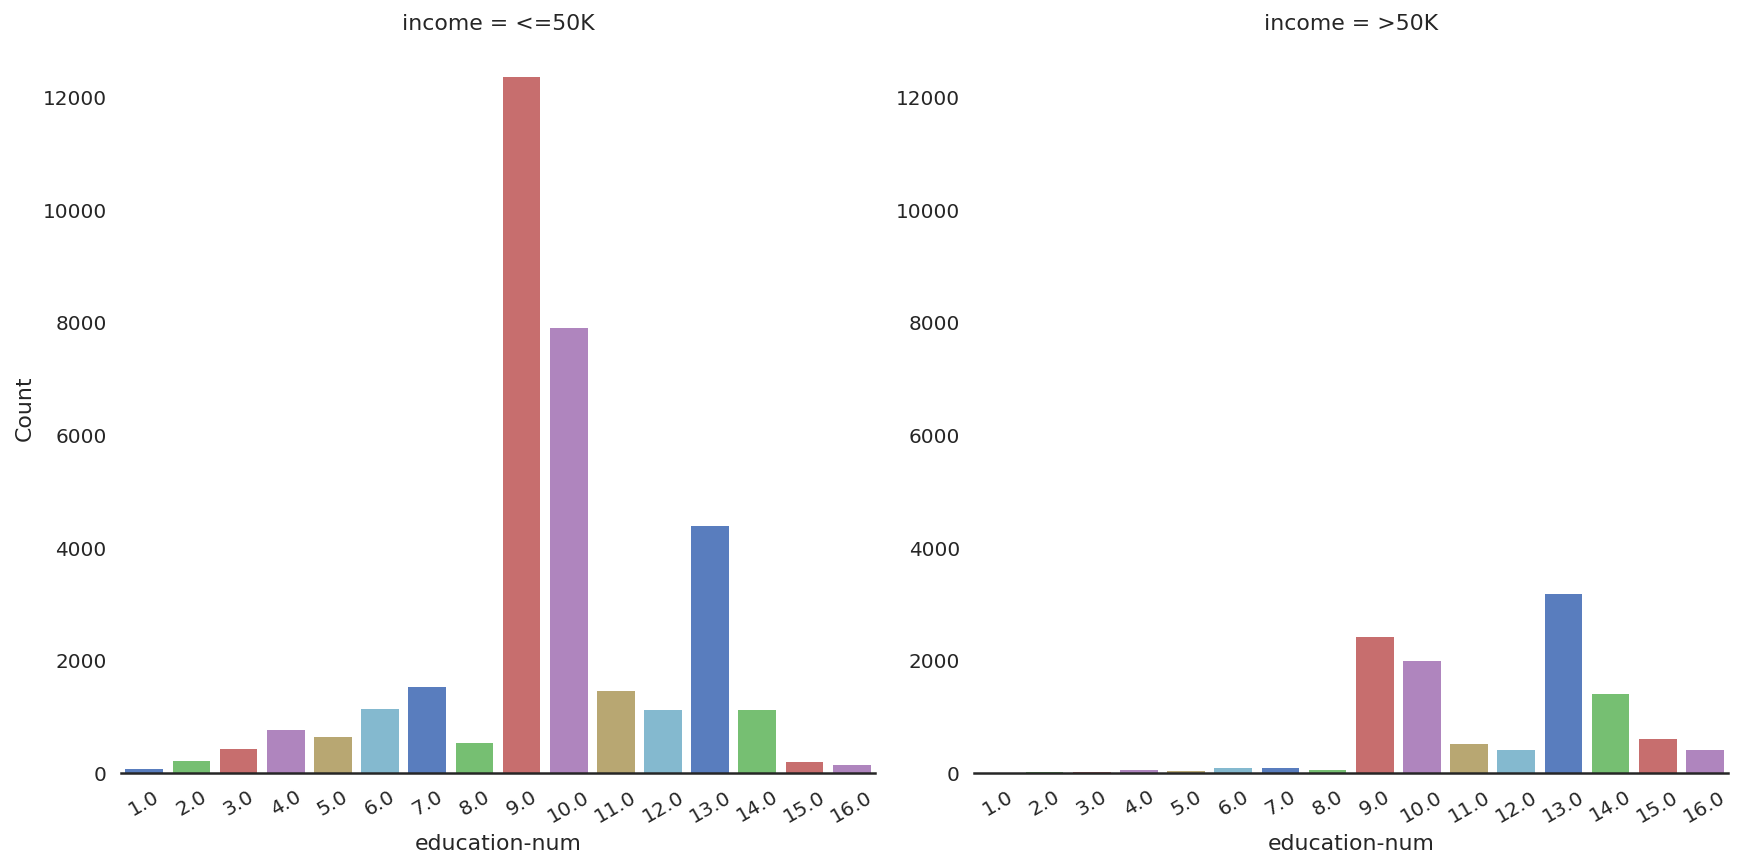

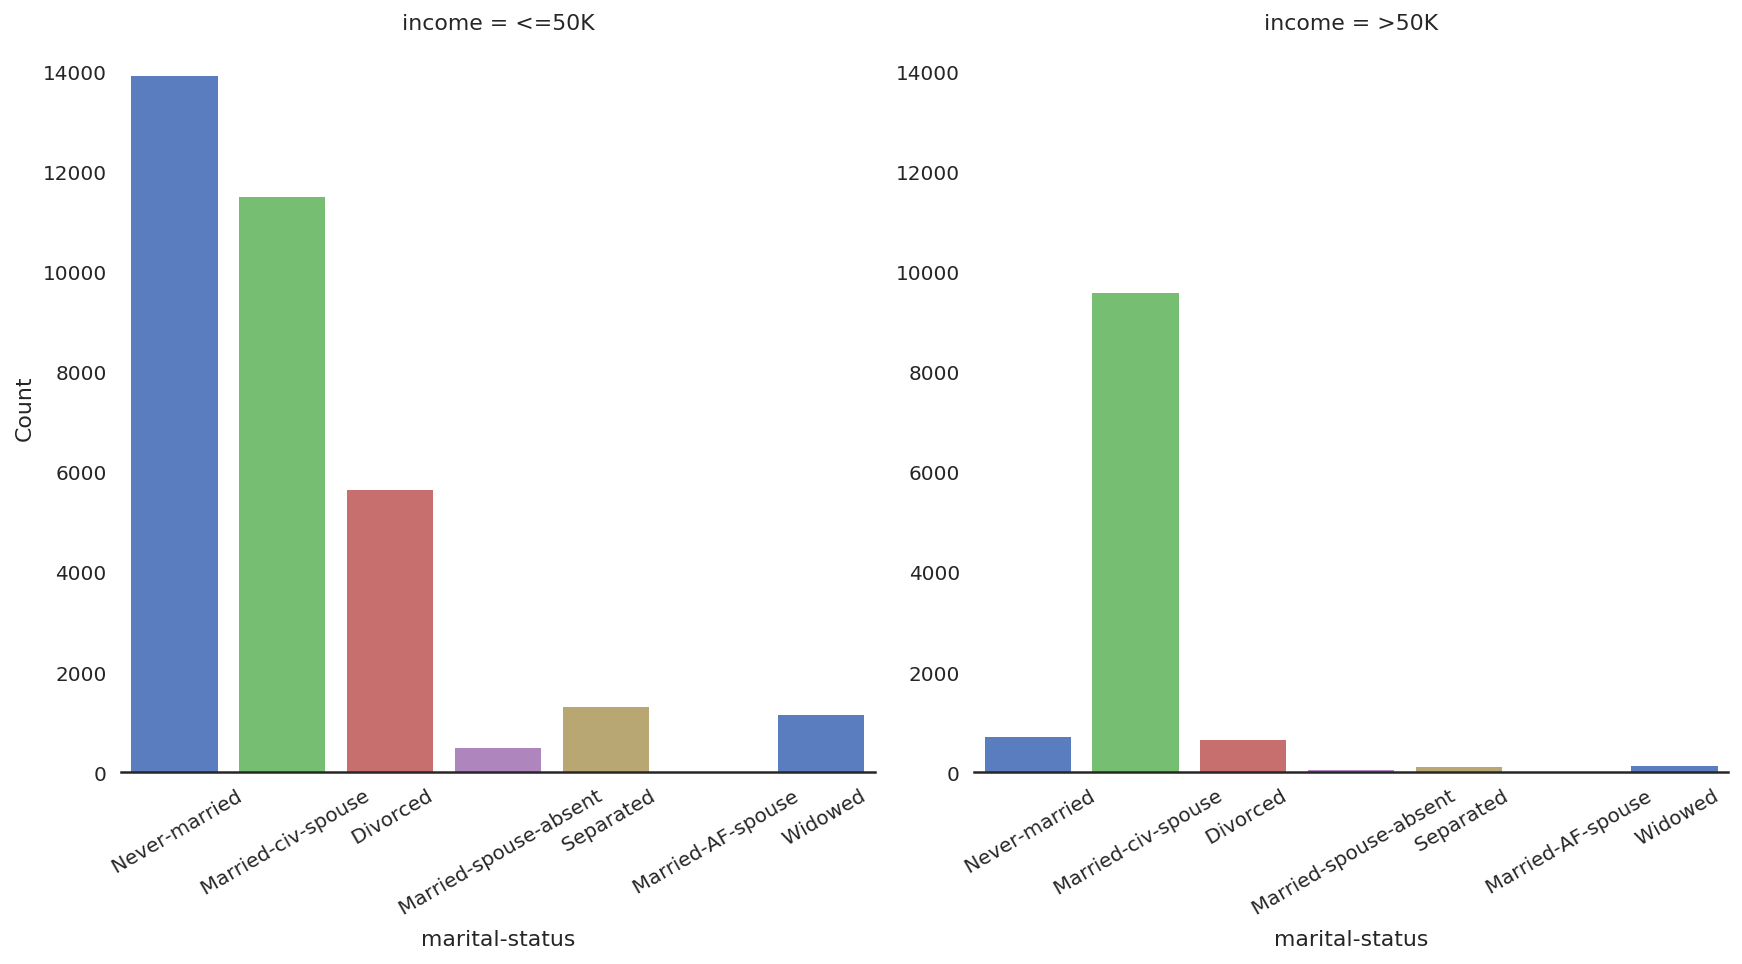

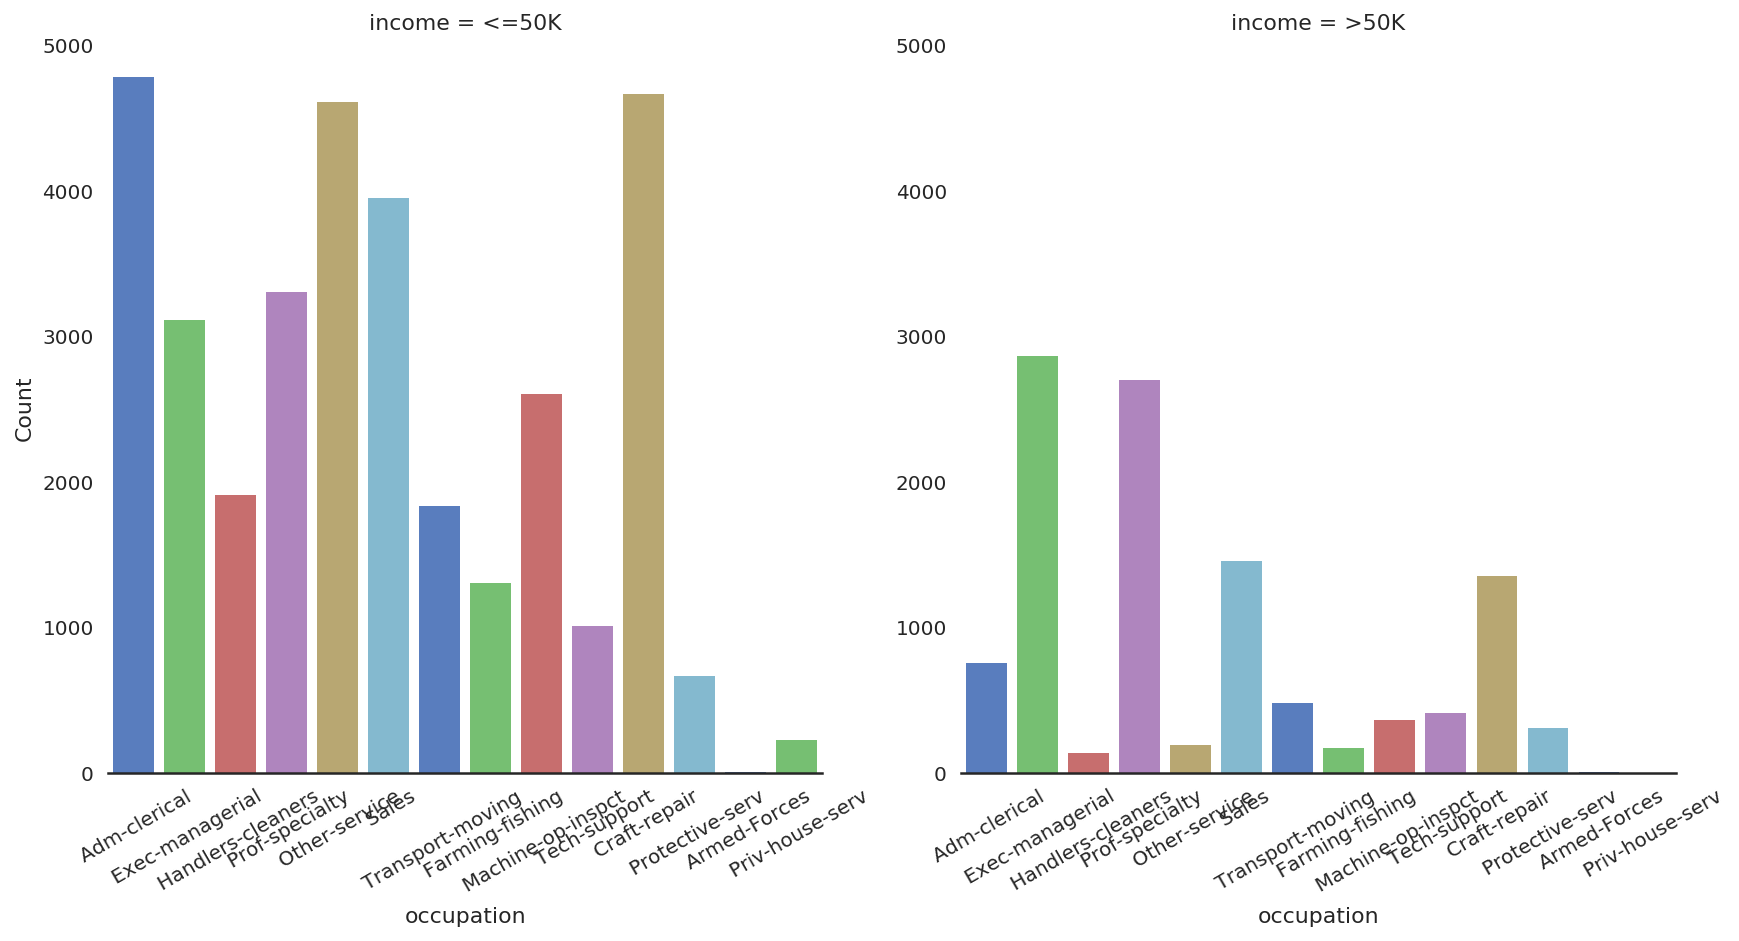

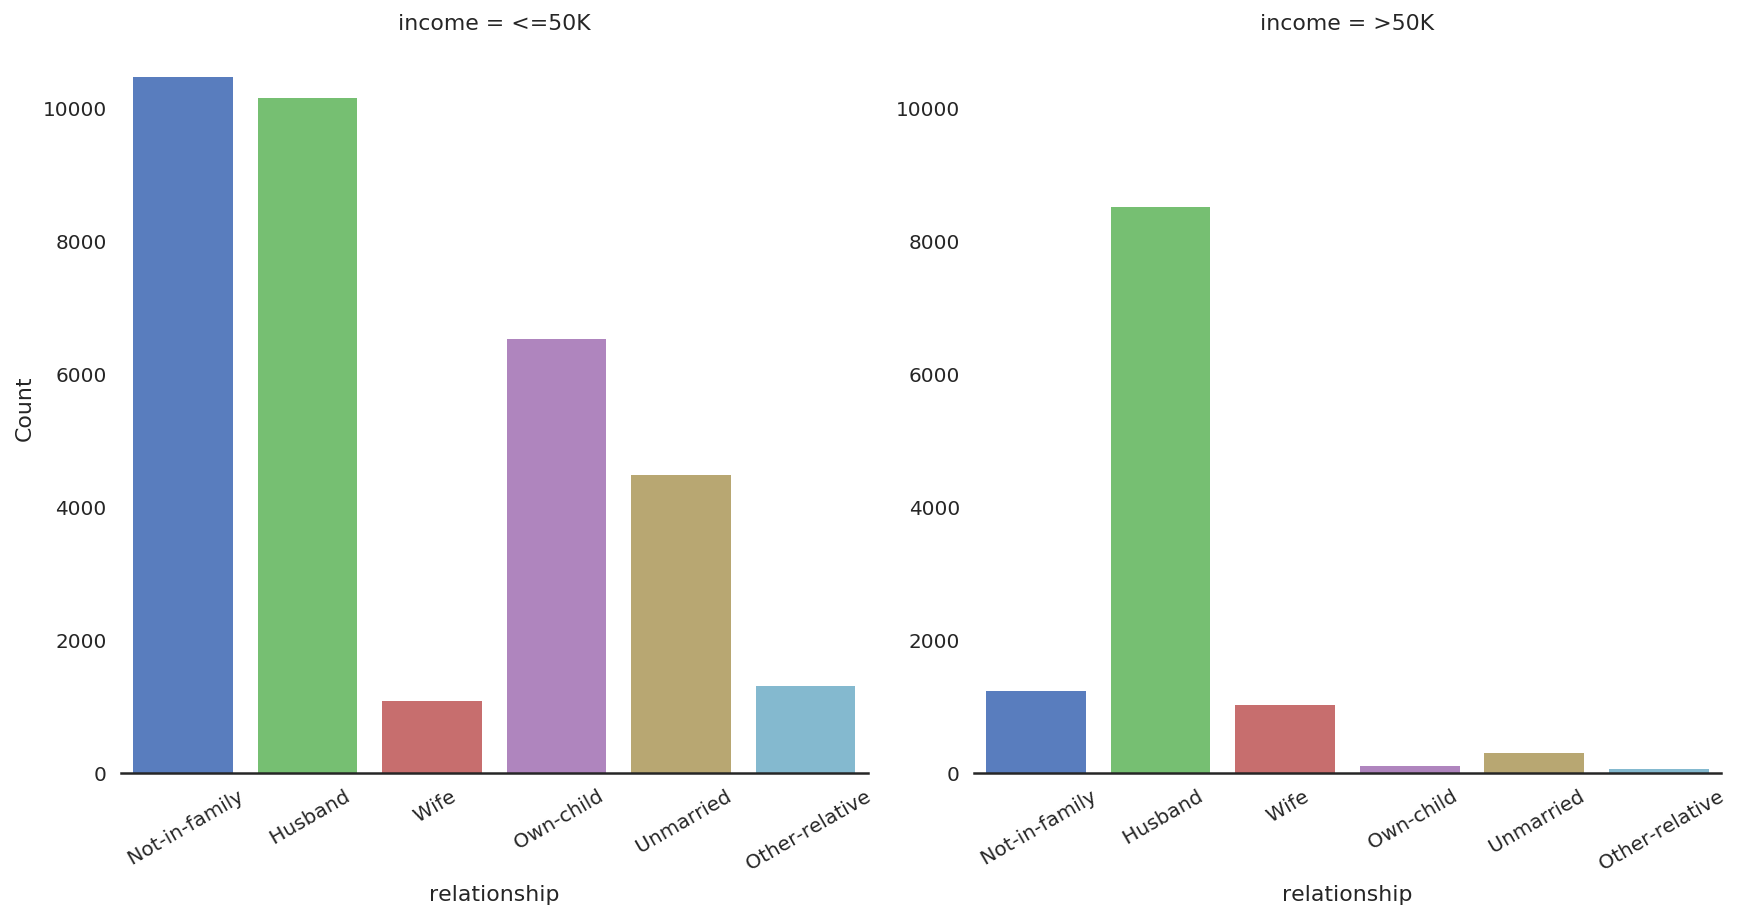

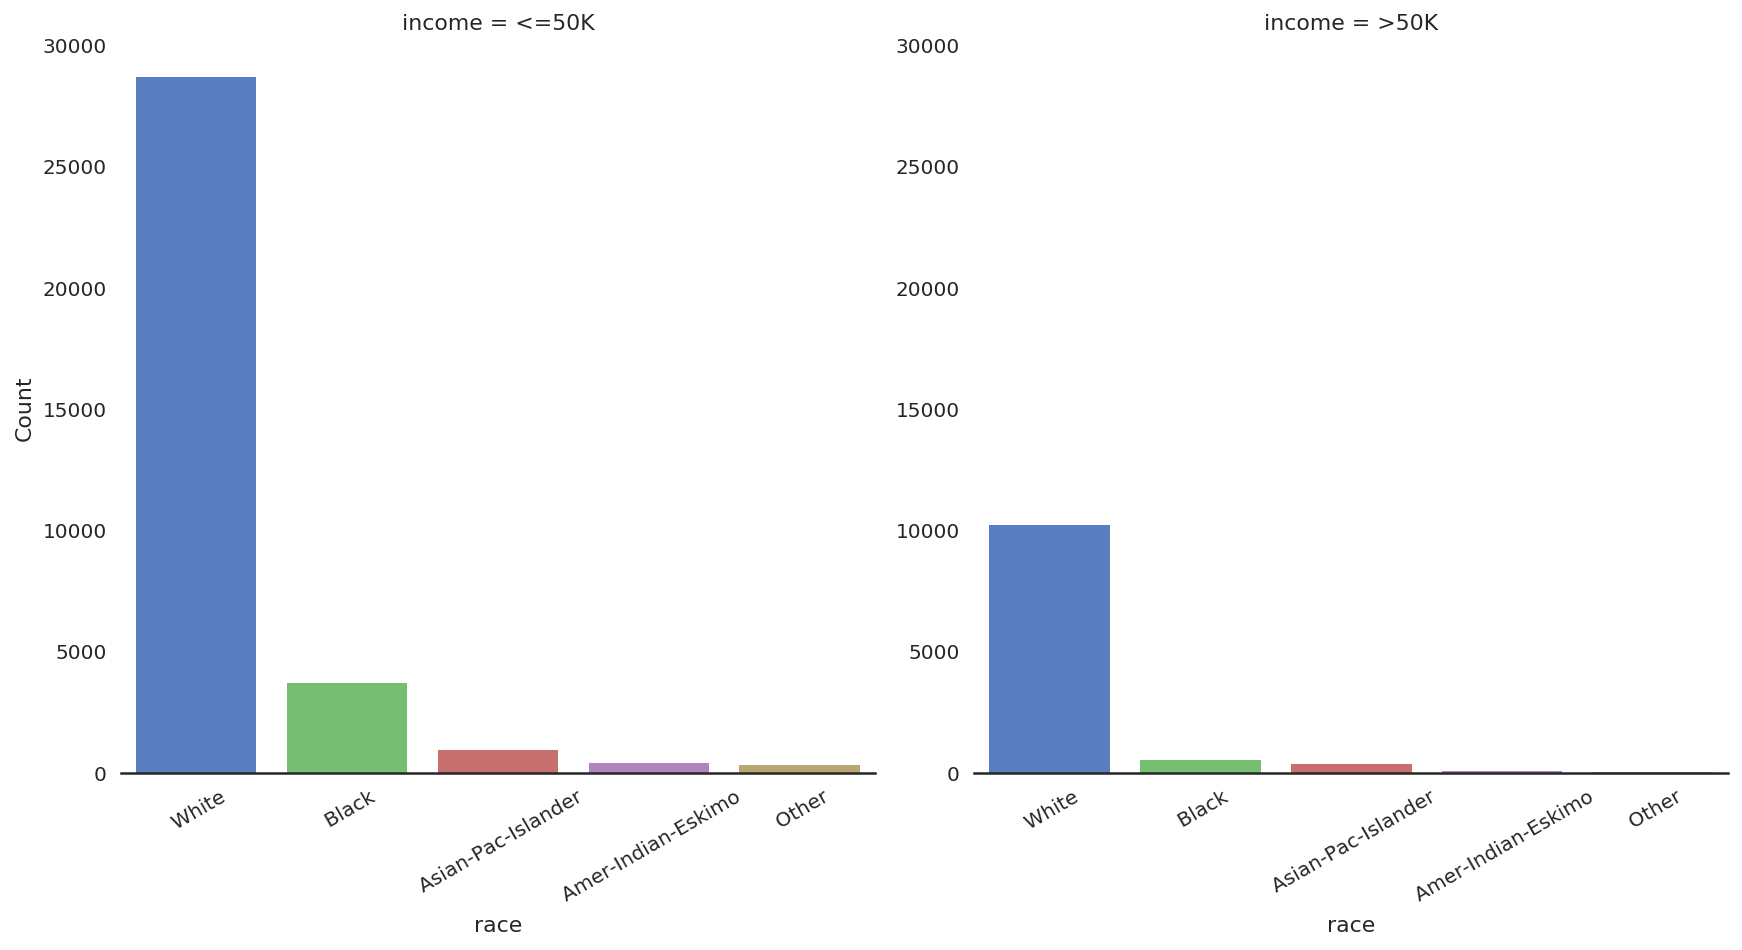

In [259]:
colname = ['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race']
for i in colname:
    g = sns.factorplot(i,
                       col="income",
                       data=data,
                       size=6,
                       kind="count",
                       palette="muted")
    g.despine(left=True)
    g = g.set_ylabels("Count")
    g.set_xticklabels(rotation=30)


## 2.3 feature scale transform

In [260]:
print(numerical)
fdata[numerical] = scaler.fit_transform(fdata[numerical])
# fdata["income"] = fdata["income"].map({"<=50K":0, ">50K":1})
fdata.head()

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


age  workclass  education_level  education-num  marital-status  \
0  0.277778          0                0       0.800000               0   
1  0.444444          1                0       0.800000               1   
2  0.277778          2                1       0.533333               2   
3  0.500000          2                2       0.400000               1   
4  0.166667          2                0       0.800000               1   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             0     0    0       0.02174           0.0   
1           1             1     0    0       0.00000           0.0   
2           2             0     0    0       0.00000           0.0   
3           2             1     1    0       0.00000           0.0   
4           3             2     1    1       0.00000           0.0   

   hours-per-week  native-country income  
0        0.397959               0  <=50K  
1        0.122449               0  <=50K  
2        0.397959               0  <=50K  
3        0.397959               0  <=50K  
4        0.397959               1  <=50K

In [261]:
fdata.describe()

age     workclass  education_level  education-num  \
count  45222.000000  45222.000000     45222.000000   45222.000000   
mean       0.292027      2.109239         3.413317       0.607897   
std        0.184379      0.940460         3.479642       0.170192   
min        0.000000      0.000000         0.000000       0.000000   
25%        0.166667      2.000000         1.000000       0.533333   
50%        0.277778      2.000000         2.000000       0.600000   
75%        0.388889      2.000000         5.000000       0.800000   
max        1.000000      6.000000        15.000000       1.000000   

       marital-status    occupation  relationship          race           sex  \
count    45222.000000  45222.000000  45222.000000  45222.000000  45222.000000   
mean         1.078480      4.628013      1.517469      0.211203      0.324952   
std          1.225909      3.436685      1.433022      0.612877      0.468362   
min          0.000000      0.000000      0.000000      0.000000      0.000000   
25%          0.000000      1.000000      0.000000      0.000000      0.000000   
50%          1.000000      4.000000      1.000000      0.000000      0.000000   
75%          1.000000      8.000000      3.000000      0.000000      1.000000   
max          6.000000     13.000000      5.000000      4.000000      1.000000   

       capital-gain  capital-loss  hours-per-week  native-country  
count  45222.000000  45222.000000    45222.000000    45222.000000  
mean       0.011014      0.020339        0.407531        1.168635  
std        0.075065      0.092965        0.122526        4.909535  
min        0.000000      0.000000        0.000000        0.000000  
25%        0.000000      0.000000        0.397959        0.000000  
50%        0.000000      0.000000        0.397959        0.000000  
75%        0.000000      0.000000        0.448980        0.000000  
max        1.000000      1.000000        1.000000       40.000000

Text(0.5,1,'Correlation between features')

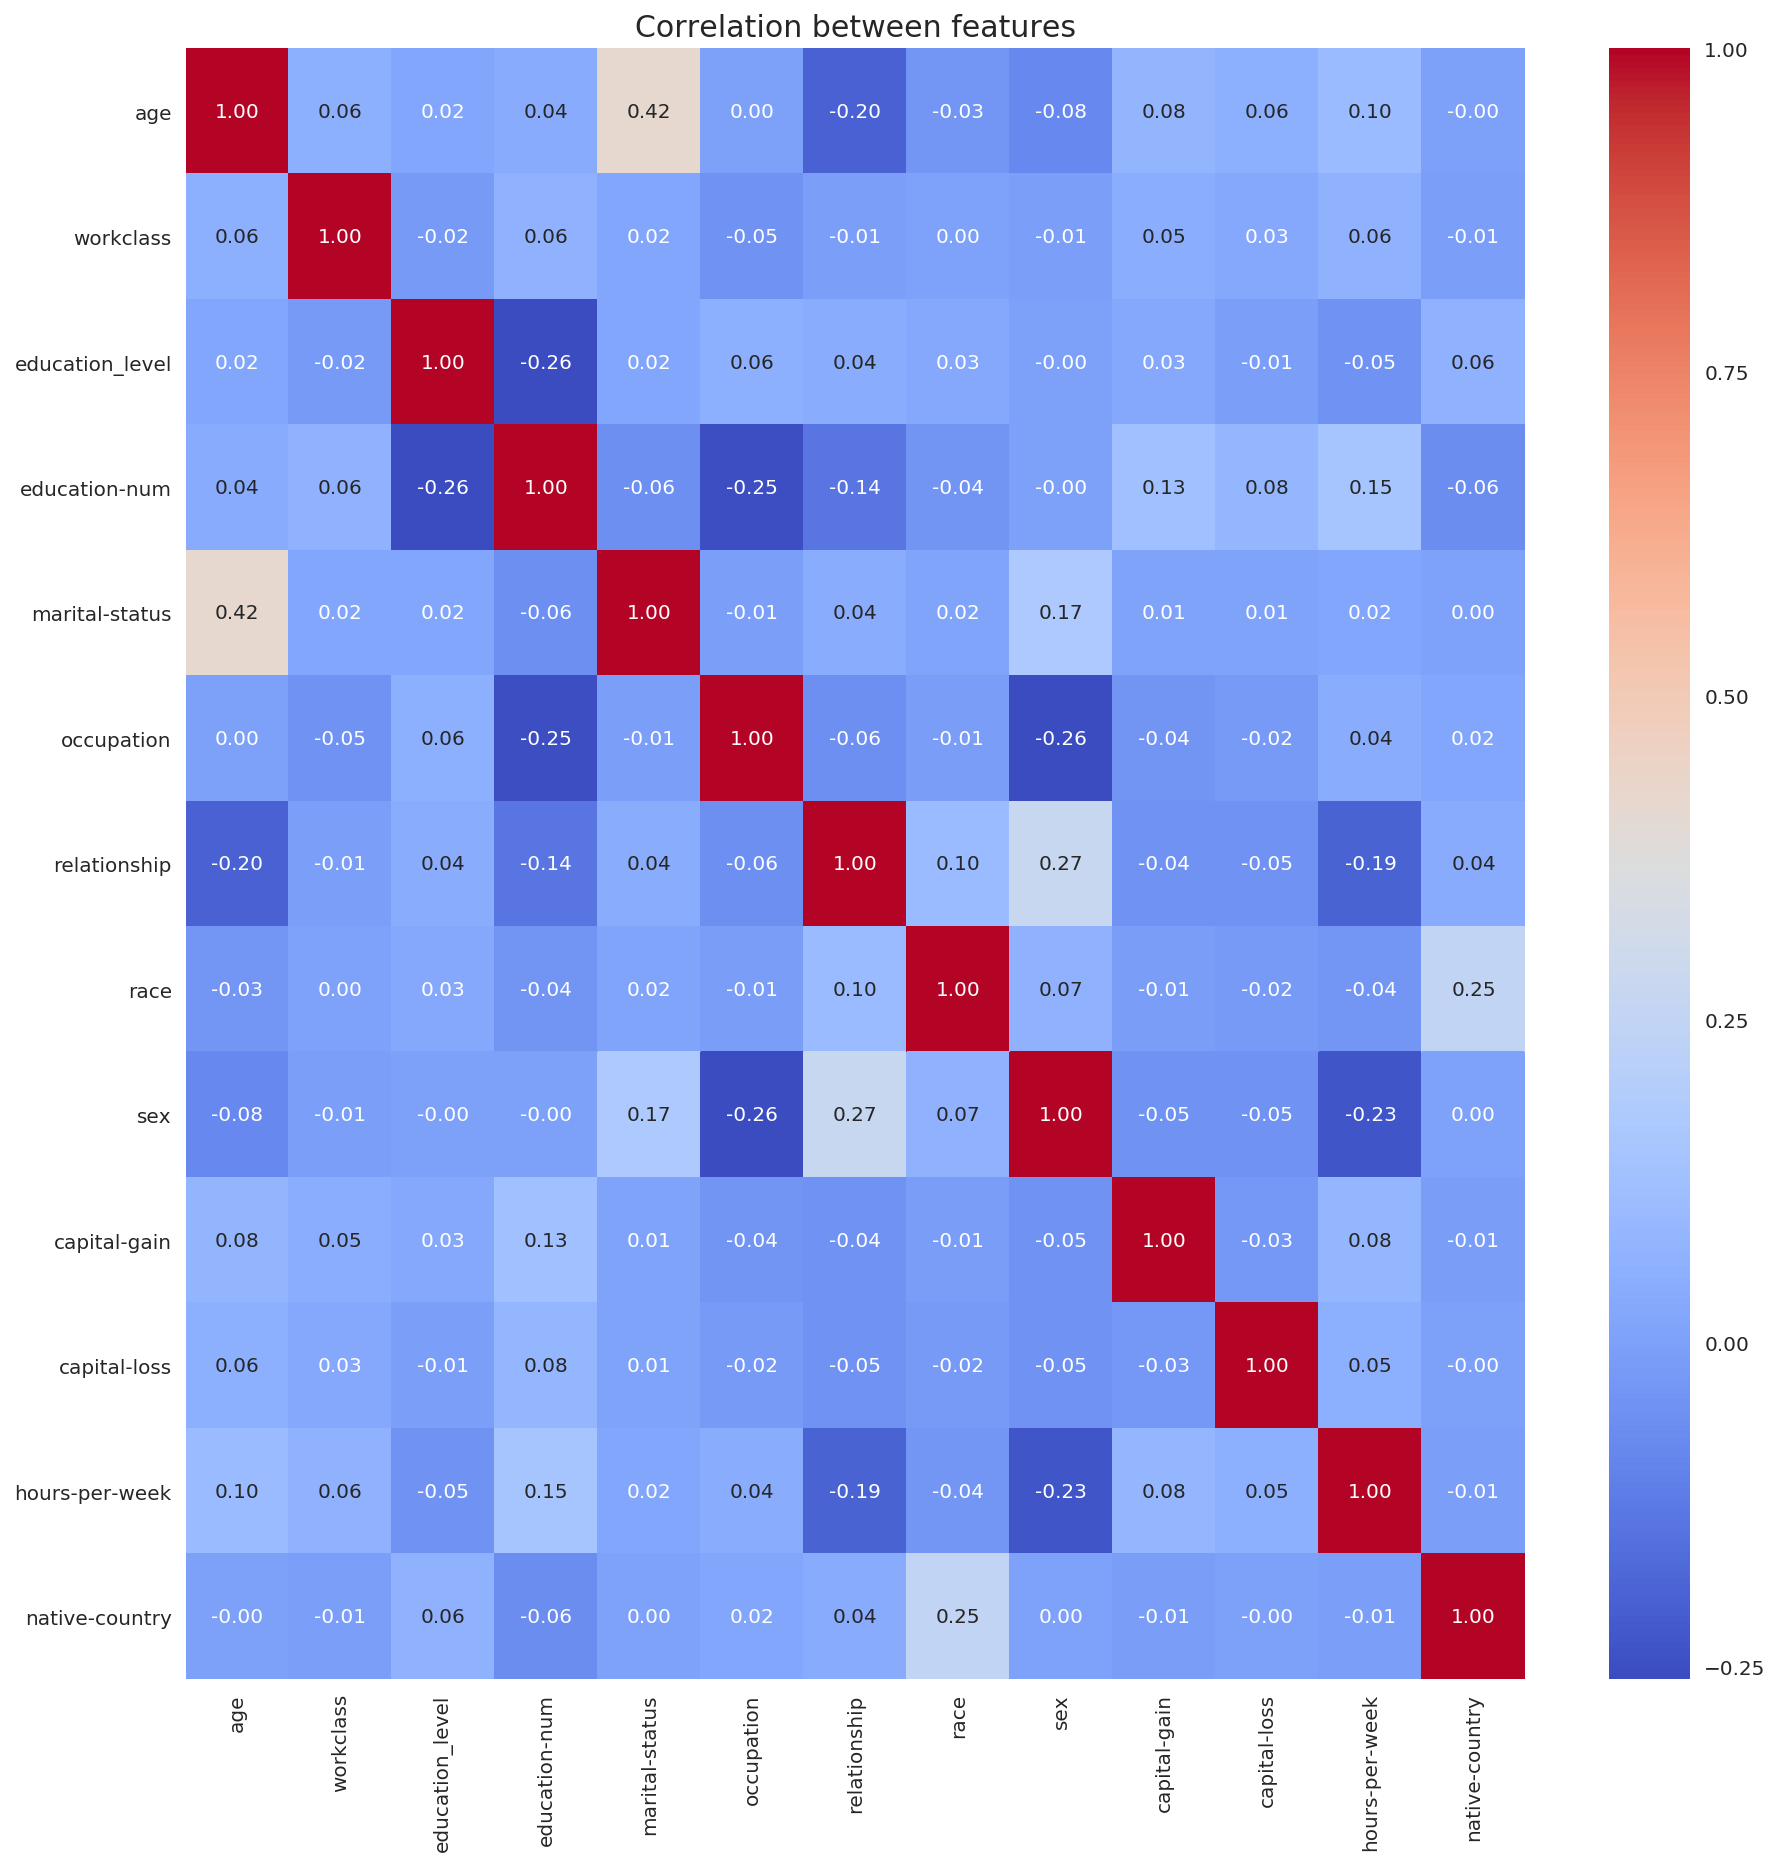

In [262]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
f, ax= plt.subplots(figsize = (15, 15))
g = sns.heatmap(fdata.corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax = ax)
# 设置Axes的标题
ax.set_title('Correlation between features', fontsize=15)
# g.set_xticklabels(rotation=30)

# feature engineering xticks exist error 

In [263]:
# g = sns.factorplot(data=fdata, x='education_level', y="income", kind='box', size=10, aspect=.8)
# xticklabels = selfxticklabels('education_level')
# g.set_xticklabels(labels = xticklabels,rotation=30)
# for ax in g.axes.flatten():
#     for tick in ax.get_xticklabels():
#         pass
#         print(tick)
#         tick.set(rotation=30)
# <your code here>
# print('--'*40)
# locs, labels = plt.xticks()
# for i in labels:
#     print(i)

In [264]:
# col = 'race'
# yticklabels = selfyticklabels(col)
# g = sns.factorplot(data=fdata, y=col, x="income", kind='box', size=10, aspect=.8)
# g.set_yticklabels(labels = yticklabels,rotation=30)
# g = sns.factorplot(data=fdata, y=col, x="income", kind='violin', size=10, aspect=.8)
# for ax in g.axes.flatten():
#     for tick in ax.get_yticklabels():
#         # print(tick)
#         pass
# # print(colmap.get(col))
# g.set_yticklabels(labels = yticklabels,rotation=30)

In [265]:
# skipcol = ['hours-per-week', 'capital-gain', 'income', 'capital-loss', 'native-country']
# numerical = ['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
# numerical2 = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass']
# # fdata[numerical] = scaler.fit_transform(fdata[numerical])
# # g = sns.factorplot(x="age",y="income",data=fdata,kind="box")
# for col in fdata.columns:
#     if col not in skipcol:
#         g = sns.factorplot(data=fdata, x=col, y="income", kind='box', size=10, aspect=.8)
#         print('-->'*40)
#         print(col)
#         if col not in numerical2:
#             xticklabels = selfxticklabels(col)
#             g.set_xticklabels(labels = xticklabels,rotation=30)
#         g = sns.factorplot(data = fdata, x=col, y="income", kind="violin", size=10, aspect=.8)
#         if col not in numerical2:
#             xticklabels = selfxticklabels(col)
#             g.set_xticklabels(labels = xticklabels,rotation=30)

In [266]:
# skipcol = ['hours-per-week', 'capital-gain', 'income', 'capital-loss', 'native-country']
# numerical2 = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass']
# g = sns.factorplot(x="age",y="income",data=fdata,kind="box")
# for col in fdata.columns:
#     if col not in skipcol:
#         g = sns.factorplot(data=fdata, y=col, x="income", kind='box', size=10, aspect=.8)
#         print('-->'*40)
#         print(col)
#         if col not in numerical2:
#             yticklabels = selfyticklabels(col)
#             g.set_yticklabels(labels = yticklabels,rotation=30)
#         g = sns.factorplot(data=fdata, y=col, x="income", kind='violin', size=10, aspect=.8)
#         if col not in numerical2:
#             yticklabels = selfyticklabels(col)
#             g.set_yticklabels(labels = yticklabels,rotation=30)

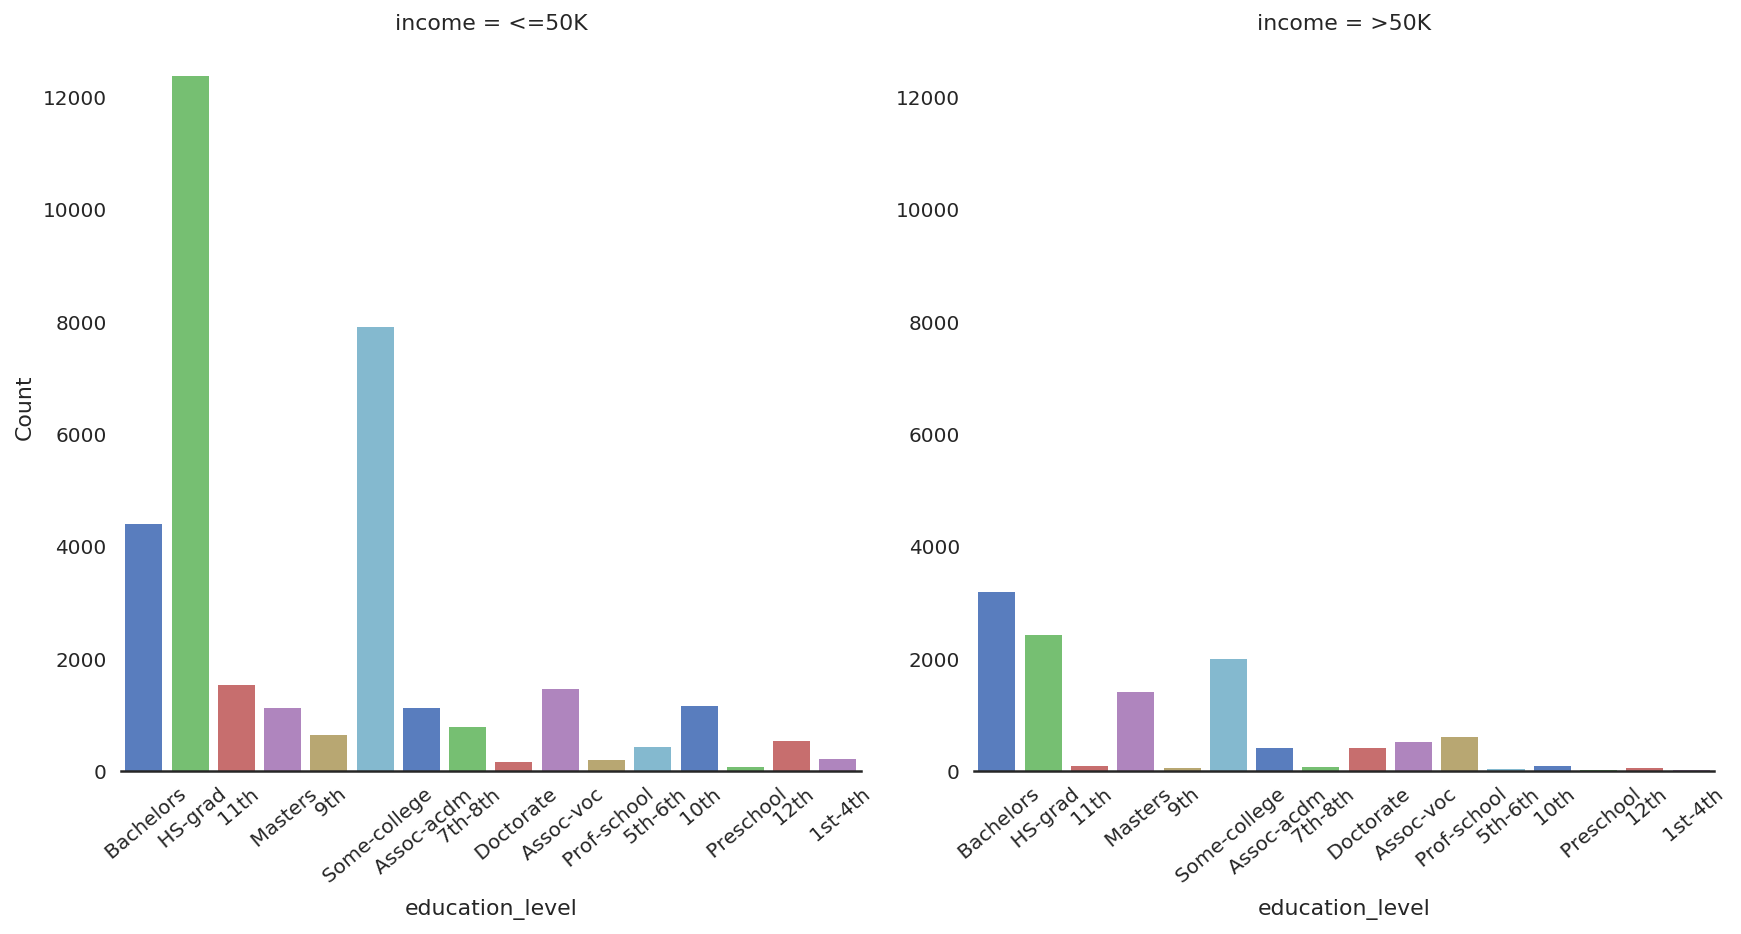

In [267]:
# g = sns.factorplot(data = fdata, kind="count", palette="muted", size=10, aspect=.8)
colname = "education_level"
g = sns.factorplot(colname,
                   col="income",
                   data=data,
                   size=6,
                   kind="count",
                   palette="muted")
g.despine(left=True)
g = g.set_ylabels("Count")
xticklabels = selfxticklabels(colname)
g.set_xticklabels(rotation=40)#labels = xticklabels,

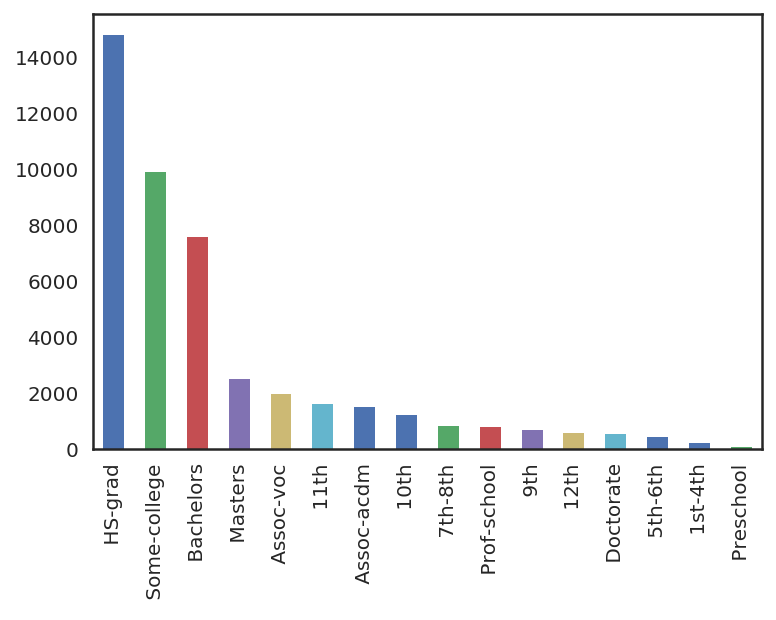

In [268]:
g = data['education_level'].value_counts().plot(kind='bar')

In [269]:
# g = sns.factorplot("education-num", col="income",  data=fdata,
#                    size=6, kind="count", palette="muted")
# g.despine(left=True)
# g = g.set_ylabels("Count")


# 3.1 split dataset

income
col:income map:{'<=50K': 0, '>50K': 1}


age  workclass  education_level  education-num  marital-status  \
0  0.277778          0                0       0.800000               0   
1  0.444444          1                0       0.800000               1   
2  0.277778          2                1       0.533333               2   
3  0.500000          2                2       0.400000               1   
4  0.166667          2                0       0.800000               1   

   occupation  relationship  race  sex  capital-gain  capital-loss  \
0           0             0     0    0       0.02174           0.0   
1           1             1     0    0       0.00000           0.0   
2           2             0     0    0       0.00000           0.0   
3           2             1     1    0       0.00000           0.0   
4           3             2     1    1       0.00000           0.0   

   hours-per-week  native-country  income  
0        0.397959               0       0  
1        0.122449               0       0  
2        0.397959               0       0  
3        0.397959               0       0  
4        0.397959               1       0

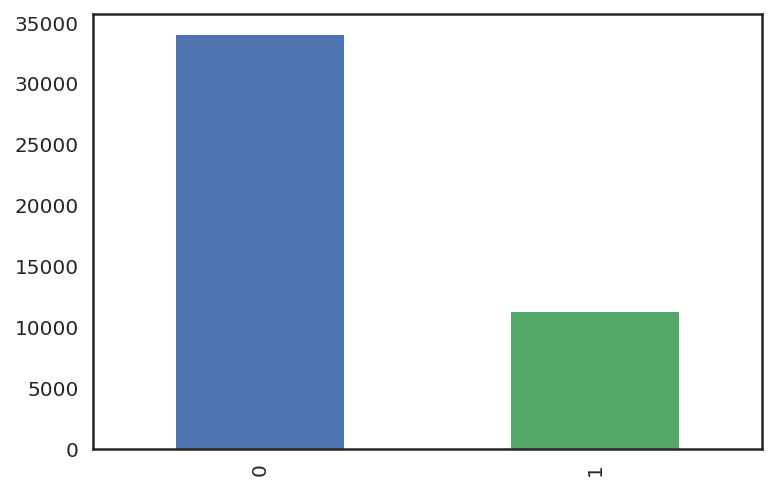

In [270]:
mapcol(fdata, 'income')
fdata['income'].value_counts().plot(kind='bar')
fdata.head()

In [271]:
# skewed = ['capital-gain', 'capital-loss']
# fdata['capital-loss'].describe()
# 将数据切分成特征和对应的标签
income_raw = fdata['income']
features_raw = fdata.drop('income', axis = 1)
print(income_raw.shape)
print(features_raw.shape)

(45222,)
(45222, 13)


In [272]:
# 导入 train_test_split
from sklearn.model_selection import train_test_split

# 将'features'和'income'数据切分成训练集和测试集
X_train, x_test, y_train, y_test = train_test_split(features_raw, income_raw, test_size = 0.2, random_state = 0)
X_train, x_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.25, random_state = 2)
# 显示切分的结果
print("Training set has {} samples.".format(X_train.shape))
print("Testing set has {} samples.".format(y_train.shape))
print("Training set has {} samples.".format(x_val.shape))
print("Testing set has {} samples.".format(y_val.shape))
print("Training set has {} samples.".format(x_test.shape))
print("Testing set has {} samples.".format(y_test.shape))

Training set has (27132, 13) samples.
Testing set has (27132,) samples.
Training set has (9045, 13) samples.
Testing set has (9045,) samples.
Training set has (9045, 13) samples.
Testing set has (9045,) samples.


# 3.2  feature select

In [273]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso          # 此处以L1正则化的线性模型Lasso为例
lasso = Lasso()                                 # 可在此步对模型进行参数设置，这里用默认值。
lasso.fit(X_train, y_train)                                 # 训练模型，传入X、y, 数据中不能包含miss_value
model = SelectFromModel(prefit=True, estimator=lasso)
X_new = model.transform(X_train)
# print(X_train.shape)
# print(X_new.shape)

In [274]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor      # 同样以此模型举例
rf = RandomForestRegressor()                            # 默认参数
rf.fit(X_train, y_train)
model = SelectFromModel(prefit=True, estimator=rf)
X_new = model.transform(X_train)
# print(X_train.shape)
# print(X_new.shape)

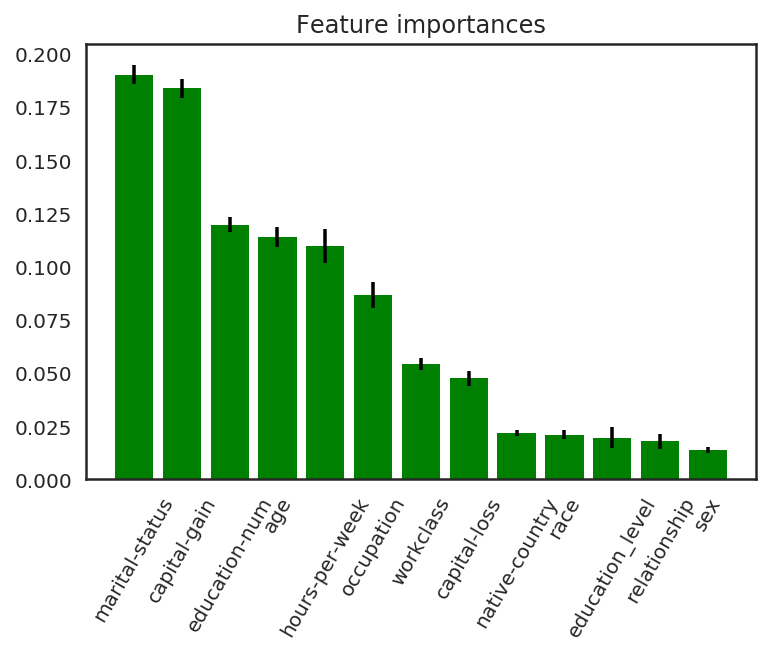

In [275]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestRegressor      # 同样以此模型举例
forest = RandomForestRegressor()                            # 默认参数
forest.fit(X_train, y_train)
# model = SelectFromModel(prefit=True, estimator=forest)
# X_new = model.transform(X_train)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")
# for f in range(X_train.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]),
        importances[indices],
        color="g",
        yerr=std[indices],
        align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices][:], rotation=60)
plt.xlim([-1, X_train.shape[1]])
plt.show()

In [276]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process import GaussianProcessClassifier
import time

In [277]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=5, shuffle=True)

In [278]:
# Modeling step Test differents algorithms 
random_state = 3
classifiers = []
classifiers.append(xgb.sklearn.XGBClassifier(learning_rate=0.01, n_estimators=100, max_depth=5, n_jobs=4, random_state=random_state))
classifiers.append(GaussianNB())
classifiers.append(BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=random_state+1), random_state=random_state))
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state=random_state))
classifiers.append(LinearDiscriminantAnalysis())
# classifiers.append(GaussianProcessClassifier(random_state=random_state))
classifiers.append(RidgeClassifier(random_state=random_state))
classifiers.append(SGDClassifier(random_state=random_state))
# classifiers.append(RadiusNeighborsClassifier())
classifiers.append(ExtraTreeClassifier(random_state=random_state))

cv_results = []
train_times = []
for classifier in classifiers :
    before_cv = time.time()
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=16))
    train_times.append(time.time() - before_cv)
    print('classifier:', classifier)


classifier: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=4, nthread=None, objective='binary:logistic', random_state=3,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)
classifier: GaussianNB(priors=None)
classifier: BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=4,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=3, verbos

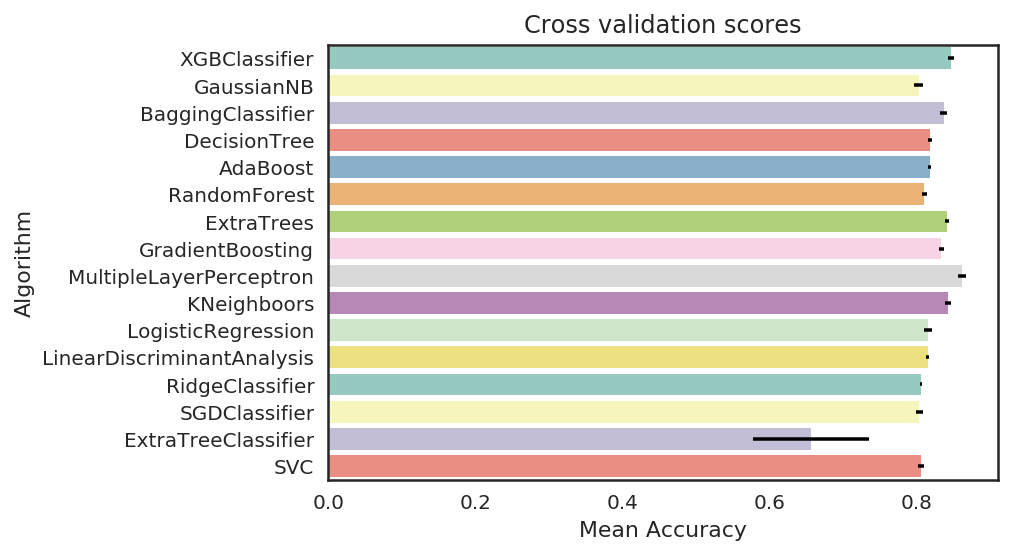

In [279]:
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,
                       "CrossValerrors": cv_std,
                       "Algorithm":["XGBClassifier",
                                    "GaussianNB",
                                    "BaggingClassifier",
                                    "DecisionTree",
                                    "AdaBoost",
                                    "RandomForest",
                                    "ExtraTrees",
                                    "GradientBoosting",
                                    "MultipleLayerPerceptron",
                                    "KNeighboors",
                                    "LogisticRegression",
                                    "LinearDiscriminantAnalysis",
                                    "RidgeClassifier",
                                    "SGDClassifier",
                                    "ExtraTreeClassifier",
                                    "SVC"
                                   ],
                       "train_times":train_times
                      })

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [280]:
cv_res

Algorithm  CrossValMeans  CrossValerrors  train_times
0                XGBClassifier       0.846897        0.004597     6.023962
1                   GaussianNB       0.803000        0.005972     0.716322
2            BaggingClassifier       0.837130        0.004913     2.419737
3                 DecisionTree       0.818185        0.002767    60.066673
4                     AdaBoost       0.817816        0.002461     0.900022
5                 RandomForest       0.810961        0.003411    14.949507
6                   ExtraTrees       0.841295        0.002591     1.306617
7             GradientBoosting       0.833923        0.003659     1.390450
8      MultipleLayerPerceptron       0.861714        0.005722     6.181077
9                  KNeighboors       0.843285        0.003883    11.740656
10          LogisticRegression       0.815421        0.005348     5.457444
11  LinearDiscriminantAnalysis       0.815274        0.002275     1.213471
12             RidgeClassifier       0.806686        0.001413     0.703902
13               SGDClassifier       0.804032        0.005196     0.709923
14         ExtraTreeClassifier       0.656569        0.079042     0.799068
15                         SVC       0.805875        0.004361     0.689696

In [281]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

xgb = XGBClassifier(
    learning_rate =0.1,
    n_estimators=100,
    max_depth=8,
    min_child_weight=1,
    gamma=0.4,
    subsample=0.75,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    n_jobs=-1,
    scale_pos_weight=1,
    seed=50)

xgb_param_grid = {
    'subsample':[0.9],
    'colsample_bytree':[0.5]
}
#  'learning_rate':[0.0001, 0.001, 0.01, 0.1]
grid_search=GridSearchCV(estimator=xgb,
                               param_grid=xgb_param_grid,
                               scoring='accuracy',
                               cv=kfold,
                               verbose=1,
                               n_jobs=4)
grid_result = grid_search.fit(X_train, y_train)
xgb_best = grid_search.best_estimator_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    6.4s finished


Best: 0.869674 using {'colsample_bytree': 0.5, 'subsample': 0.9}


In [282]:
# gaussianNB = GaussianNB()
# gaussianNB_param_grid = {}

# grid_search = GridSearchCV(gaussianNB, param_grid = gaussianNB_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
# grid_result = grid_search.fit(X_train,y_train)
# gaussianNB_best = grid_search.best_estimator_
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# print(dt_best.feature_importances_)

In [283]:
# BaggingClassifier
bagdt = DecisionTreeClassifier()

bagdtClassfier = BaggingClassifier(bagdt, random_state=9)
bag_param = {'base_estimator__criterion':['gini'],
                  'base_estimator__splitter':['best'],
                  'base_estimator__max_depth':[10],
                  'n_estimators':[2]}

grid_search = GridSearchCV(bagdtClassfier, param_grid = bag_param, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_result = grid_search.fit(X_train,y_train)
bagdt_best = grid_search.best_estimator_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: 0.849919 using {'base_estimator__criterion': 'gini', 'base_estimator__max_depth': 10, 'base_estimator__splitter': 'best', 'n_estimators': 2}


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.4s finished


In [284]:
# BaggingClassifier
bagrf = RandomForestClassifier()
bagrfClassfier = BaggingClassifier(bagrf, random_state=9)
# bagrf_param = {'base_estimator__max_features':['sqrt', 'log2',None],
#                'base_estimator__min_samples_leaf':[1,2,5],
#                'base_estimator__min_samples_split':[2,5],
#                'base_estimator__max_depth':[5,15],
#                'n_estimators':[250],
#                'max_features':[0.6],
#                'max_samples':[0.6]
#               }
bagrf_param = {'base_estimator__max_features':[None],
               'base_estimator__min_samples_leaf':[2],
               'base_estimator__min_samples_split':[2],
               'base_estimator__max_depth':[15],
               'n_estimators':[250],
               'max_features':[0.6],
               'max_samples':[0.6]
              }

grid_search = GridSearchCV(bagrfClassfier, param_grid = bagrf_param, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_result = grid_search.fit(X_train,y_train)
bagrf_best = grid_search.best_estimator_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:  2.3min finished


Best: 0.861861 using {'base_estimator__max_depth': 15, 'base_estimator__max_features': None, 'base_estimator__min_samples_leaf': 2, 'base_estimator__min_samples_split': 2, 'max_features': 0.6, 'max_samples': 0.6, 'n_estimators': 250}


In [285]:
# DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_features='auto')

# baggingDTC = BaggingClassifier(DTC3, random_state=10)
# 'criterion':['gini','entropy'],
# 'splitter':['best','random']

dt_param_grid = {'criterion':['entropy'],
                  'splitter':['best']}

grid_search = GridSearchCV(dtc, param_grid = dt_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_result = grid_search.fit(X_train,y_train)
dt_best = grid_search.best_estimator_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# print(dt_best.feature_importances_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: 0.818222 using {'criterion': 'entropy', 'splitter': 'best'}


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s finished


In [286]:
### DecisionTreeClassifier + AdaBoostClassifier
adadt = DecisionTreeClassifier()

adadtClassifier = AdaBoostClassifier(adadt, random_state=7)
# "base_estimator__criterion" : ["gini", "entropy"],
# "base_estimator__splitter" :   ["best", "random"],
# "algorithm" : ["SAMME","SAMME.R"],
# "learning_rate":  [0.0001, 0.001, 0.01, 0.1]
    
ada_param_grid = {"base_estimator__criterion":["entropy"],
                  "base_estimator__splitter":["best"],
                  "algorithm" : ["SAMME.R"],
                  "n_estimators" :[2],
                  "learning_rate":  [0.1]}

grid_search = GridSearchCV(adadtClassifier,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_result = grid_search.fit(X_train,y_train)
ada_best = grid_search.best_estimator_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.8s finished


Best: 0.833075 using {'algorithm': 'SAMME.R', 'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'best', 'learning_rate': 0.1, 'n_estimators': 2}


In [287]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()
# "max_features": [1, 3, 10],
# "n_estimators" :[100,300],
# "min_samples_split": [2, 3, 10],
# "n_estimators" :[100,300],
# "min_samples_leaf": [1, 3, 10],
## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              "max_features": [3],
              "min_samples_split": [3],
              "min_samples_leaf": [10],
              "bootstrap": [False],
              "n_estimators" :[300],
              "criterion": ["gini"]}


grid_search = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_result = grid_search.fit(X_train,y_train)
RFC_best = grid_search.best_estimator_

# Best score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   23.9s finished


Best: 0.862303 using {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 300}


In [288]:
#ExtraTrees 
ExtC = ExtraTreesClassifier()
# "max_depth": [None],
# "max_features": [1, 3, 10],
# "min_samples_split": [2, 3, 10],
# "min_samples_leaf": [1, 3, 10],
# "bootstrap": [False],
# "n_estimators" :[100,300],
# "criterion": ["gini", "entropy"]
## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              "max_features": [10],
              "min_samples_split": [2],
              "min_samples_leaf": [10],
              "bootstrap": [False],
              "n_estimators" :[300],
              "criterion": ["entropy"]}


grid_search = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_result = grid_search.fit(X_train,y_train)
ExtC_best = grid_search.best_estimator_

# Best score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   31.8s finished


Best: 0.855853 using {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 10, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 300}


In [327]:
# Gradient boosting tunning
# 'loss' : ["deviance","exponential"],
# 'n_estimators' : [100,200,300],
# 'learning_rate': [0.1],
# 'max_depth': [4, 8],
# 'min_samples_leaf': [100,150],
# 'max_features': [0.3, 0.1] 
GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [200],
              'learning_rate': [0.1],
              'max_depth': [8],
              'min_samples_leaf': [100],
              'max_features': [0.3] 
              }

grid_search = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
grid_result = grid_search.fit(X_train,y_train)
GBC_best = grid_search.best_estimator_

# Print the best score and the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:   14.4s finished


Best: 0.866173 using {'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 8, 'max_features': 0.3, 'min_samples_leaf': 100, 'n_estimators': 200}


In [290]:
# Creating a MLP model
mlpc = MLPClassifier() # Creating a MLP to optimise
# {'activation':['identity','relu']},
# Setting up a range of hyperparameters for the grid search
param_grid = [{'activation':['relu']},
              {'solver':['lbfgs','sgd','adam']},
              {'hidden_layer_sizes':[(5),(5,5),(10,10)]}]

# Setting up the grid search with model, parameter and scoring method
grid_search = GridSearchCV(estimator=mlpc,
                           param_grid=param_grid,
                           cv=kfold,
                           n_jobs=4,
                           verbose=1,
                           scoring='accuracy')

grid_result = grid_search.fit(X_train,y_train)
mlp_best = grid_search.best_estimator_

# Print the best score and the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=4)]: Done  35 out of  35 | elapsed:  2.2min finished


Best: 0.843653 using {'solver': 'adam'}


In [291]:
# # KNeighboors
# knnc = KNeighborsClassifier()
# # param_grid = [{'n_neighbors':[2, 4, 8, 16],
# #                'p':[2,3]
# #               }]
# param_grid = [{'n_neighbors':[16],
#                'p':[2]
#               }]

# # Setting up the grid search with model, parameter and scoring method
# grid_search = GridSearchCV(estimator=knnc,
#                            param_grid=param_grid,
#                            cv=kfold,
#                            n_jobs=4,
#                            verbose=1,
#                            scoring='accuracy')

# grid_result = grid_search.fit(X_train,y_train)
# knn_best = grid_search.best_estimator_

# # Print the best score and the best parameters
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

In [292]:
# KNeighboors
lr = LogisticRegression()
# param_grid = [{'penalty':['l1','l2'],
#                'C':[0.001,0.01,0.1,1]
#               }]
param_grid = [{'penalty':['l1'],
               'C':[1]
              }]

# Setting up the grid search with model, parameter and scoring method
grid_search = GridSearchCV(estimator=lr,
                           param_grid=param_grid,
                           cv=kfold,
                           n_jobs=4,
                           verbose=1,
                           scoring='accuracy')

grid_result = grid_search.fit(X_train,y_train)
lr_best = grid_search.best_estimator_

# Print the best score and the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    1.3s finished


Best: 0.819881 using {'C': 1, 'penalty': 'l1'}


In [293]:
# KNeighboors
lda = LinearDiscriminantAnalysis()
# {'solver':['svd','lsqr','eigen']
param_grid = [{'solver':['svd']
              }]

# Setting up the grid search with model, parameter and scoring method
grid_search = GridSearchCV(estimator=lda,
                           param_grid=param_grid,
                           cv=kfold,
                           n_jobs=4,
                           verbose=1,
                           scoring='accuracy')

grid_result = grid_search.fit(X_train,y_train)
lda_best = grid_search.best_estimator_

# Print the best score and the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: 0.806760 using {'solver': 'svd'}


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s finished


In [294]:
# KNeighboors
rc = RidgeClassifier()
# param_grid = [{'alpha':[0.001,0.01,0.1,1,10],
#                'fit_intercept':[True, False],
#                'normalize':[True, False],
#               }]
param_grid = [{'alpha':[0.001],
               'fit_intercept':[True],
               'normalize':[True],
              }]

# Setting up the grid search with model, parameter and scoring method
grid_search = GridSearchCV(estimator=rc,
                           param_grid=param_grid,
                           cv=kfold,
                           n_jobs=4,
                           verbose=1,
                           scoring='accuracy')

grid_result = grid_search.fit(X_train,y_train)
rc_best = grid_search.best_estimator_

# Print the best score and the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: 0.803848 using {'alpha': 0.001, 'fit_intercept': True, 'normalize': True}


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.1s finished


In [295]:
# KNeighboors
sgdc = SGDClassifier(loss='log')
# param_grid = [{'n_neighbors':[2, 4, 8, 16],
#                'p':[2,3],
#                'fit_intercept':[True, False],
#                'learning_rate':[True, False],
#               }]
param_grid = [{'alpha':[0.001],
               'penalty':['l1']
              }]

# Setting up the grid search with model, parameter and scoring method
grid_search = GridSearchCV(estimator=sgdc,
                           param_grid=param_grid,
                           cv=kfold,
                           n_jobs=4,
                           verbose=1,
                           scoring='accuracy')

grid_result = grid_search.fit(X_train,y_train)
sgdc_best = grid_search.best_estimator_

# Print the best score and the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: 0.811883 using {'alpha': 0.001, 'penalty': 'l1'}


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s finished


In [296]:
# KNeighboors
etc = ExtraTreeClassifier()
print(etc.get_params().keys())
# param_grid = [{'max_features':['sqrt', 'log2',None],
#                'min_samples_leaf':[1,2,5],
#                'min_samples_split':[2,5],
#                'max_depth':[5,15]
#               }]
param_grid = [{'max_features':[None],
               'min_samples_leaf':[4],
               'min_samples_split':[3],
               'max_depth':[15]
              }]

# Setting up the grid search with model, parameter and scoring method
grid_search = GridSearchCV(estimator=etc,
                           param_grid=param_grid,
                           cv=kfold,
                           n_jobs=4,
                           verbose=1,
                           scoring='accuracy')

grid_result = grid_search.fit(X_train,y_train)
etc_best = grid_search.best_estimator_

# Print the best score and the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

dict_keys(['class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_impurity_split', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best: 0.840889 using {'max_depth': 15, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 3}


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    0.2s finished


In [297]:
### SVC classifier
SVMC = SVC(probability=True,kernel='rbf',random_state=9)#
# 'gamma': [0.01, 0.1, 1],
# 'C': [1, 10]
# 'kernel': ['linear', 'rbf', 'sigmoid']
# svc_param_grid = {'kernel': ['rbf']}
# grid_search = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)
# grid_result = grid_search.fit(X_train,y_train)
# SVMC_best = grid_search.best_estimator_
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
SVMC.fit(X_train,y_train)
score = SVMC.score(x_val,y_val)
print(score)
SVMC_best = SVMC

0.8134881149806523


# LGBMClassifier

In [298]:
def auc2(m, train, test): 
    return (metrics.roc_auc_score(y_train,m.predict(train)),
                            metrics.roc_auc_score(y_test,m.predict(test)))

In [299]:
import lightgbm as lgb
from sklearn import metrics

lg = lgb.LGBMClassifier(silent=False)
param_dist = {"max_depth": [5],
              "learning_rate" : [0.05],
              "num_leaves": [900],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=4, param_grid=param_dist, cv = kfold, scoring="roc_auc", verbose=5)
grid_result = grid_search.fit(X_train, y_train)
lgm_best = grid_search.best_estimator_
# Best score
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] learning_rate=0.05, max_depth=5, n_estimators=200, num_leaves=900 
[CV] learning_rate=0.05, max_depth=5, n_estimators=200, num_leaves=900 
[CV] learning_rate=0.05, max_depth=5, n_estimators=200, num_leaves=900 
[CV] learning_rate=0.05, max_depth=5, n_estimators=200, num_leaves=900 
[CV]  learning_rate=0.05, max_depth=5, n_estimators=200, num_leaves=900, score=0.9216825734514373, total=   2.6s
[CV] learning_rate=0.05, max_depth=5, n_estimators=200, num_leaves=900 
[CV]  learning_rate=0.05, max_depth=5, n_estimators=200, num_leaves=900, score=0.9153085813978846, total=   2.9s
[CV]  learning_rate=0.05, max_depth=5, n_estimators=200, num_leaves=900, score=0.9254275251699196, total=   3.3s


[Parallel(n_jobs=4)]: Done   2 out of   5 | elapsed:    4.2s remaining:    6.3s


[CV]  learning_rate=0.05, max_depth=5, n_estimators=200, num_leaves=900, score=0.9332278377494275, total=   3.2s
[CV]  learning_rate=0.05, max_depth=5, n_estimators=200, num_leaves=900, score=0.9255944462617671, total=   1.1s


[Parallel(n_jobs=4)]: Done   5 out of   5 | elapsed:    5.5s finished


Best: 0.924248 using {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 200, 'num_leaves': 900}


In [300]:
lgb_train = lgb.Dataset(X_train, label=y_train)
lgb_eval = lgb.Dataset(x_val, y_val, reference=lgb_train)
params = {
    'max_depth': 5,
    'boosting_type': 'dart',
    'objective': 'binary',
    'num_class': 1,  
    'metric': 'auc',
    'num_leaves': 900,  
    'min_data_in_leaf': 100,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l1': 0.4,
    'lambda_l2': 0.5,
    'min_gain_to_split': 0.2,
    'verbose': 5,
    'n_estimators': 300,
    'is_unbalance': True
}
# Without Categorical Features
gbm = lgb.train(params,
                   lgb_train,
                   num_boost_round=1000,
                   valid_sets=lgb_eval,
                   early_stopping_rounds=50)
preds = gbm.predict(x_test, num_iteration=gbm.best_iteration)  # 输出的是概率结果 

[1]	valid_0's auc: 0.877435
Training until validation scores don't improve for 50 rounds.
[2]	valid_0's auc: 0.883234
[3]	valid_0's auc: 0.886616
[4]	valid_0's auc: 0.88734
[5]	valid_0's auc: 0.88967
[6]	valid_0's auc: 0.890582
[7]	valid_0's auc: 0.89082
[8]	valid_0's auc: 0.891451
[9]	valid_0's auc: 0.891906
[10]	valid_0's auc: 0.89305
[11]	valid_0's auc: 0.894551
[12]	valid_0's auc: 0.894117
[13]	valid_0's auc: 0.894511
[14]	valid_0's auc: 0.895088
[15]	valid_0's auc: 0.895419
[16]	valid_0's auc: 0.895876
[17]	valid_0's auc: 0.89581
[18]	valid_0's auc: 0.896233
[19]	valid_0's auc: 0.896597
[20]	valid_0's auc: 0.89677
[21]	valid_0's auc: 0.896468
[22]	valid_0's auc: 0.896816
[23]	valid_0's auc: 0.896692
[24]	valid_0's auc: 0.897147
[25]	valid_0's auc: 0.897204
[26]	valid_0's auc: 0.897485
[27]	valid_0's auc: 0.897591
[28]	valid_0's auc: 0.897526
[29]	valid_0's auc: 0.897711
[30]	valid_0's auc: 0.89772
[31]	valid_0's auc: 0.897834
[32]	valid_0's auc: 0.898056
[33]	valid_0's auc: 0.8979

[278]	valid_0's auc: 0.910466
[279]	valid_0's auc: 0.910463
[280]	valid_0's auc: 0.91045
[281]	valid_0's auc: 0.910442
[282]	valid_0's auc: 0.910507
[283]	valid_0's auc: 0.910483
[284]	valid_0's auc: 0.910456
[285]	valid_0's auc: 0.910495
[286]	valid_0's auc: 0.910898
[287]	valid_0's auc: 0.91093
[288]	valid_0's auc: 0.910919
[289]	valid_0's auc: 0.910963
[290]	valid_0's auc: 0.911337
[291]	valid_0's auc: 0.911369
[292]	valid_0's auc: 0.911353
[293]	valid_0's auc: 0.911328
[294]	valid_0's auc: 0.911352
[295]	valid_0's auc: 0.911314
[296]	valid_0's auc: 0.911301
[297]	valid_0's auc: 0.911264
[298]	valid_0's auc: 0.91126
[299]	valid_0's auc: 0.911315
[300]	valid_0's auc: 0.911287
Did not meet early stopping. Best iteration is:
[291]	valid_0's auc: 0.911369


In [301]:
# gbm.fit(X_train, y_train)

In [302]:
# 导出特征重要性  
importance = gbm.feature_importance()
names = gbm.feature_name()
print(names)

['age', 'workclass', 'education_level', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']


In [303]:
def plot_learning_curve(estimator,
                        title,
                        X,
                        y,
                        ylim=None,
                        cv=None,
                        n_jobs=16,
                        train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator,
                                                            X,
                                                            y,
                                                            cv=cv,
                                                            n_jobs=n_jobs,
                                                            train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes,
                     train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std,
                     alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes,
                     test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std,
                     alpha=0.1,
                     color="g")
    plt.plot(train_sizes,
             train_scores_mean,
             'o-',
             color="r",
             label="Training score")
    plt.plot(train_sizes,
             test_scores_mean,
             'o-',
             color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

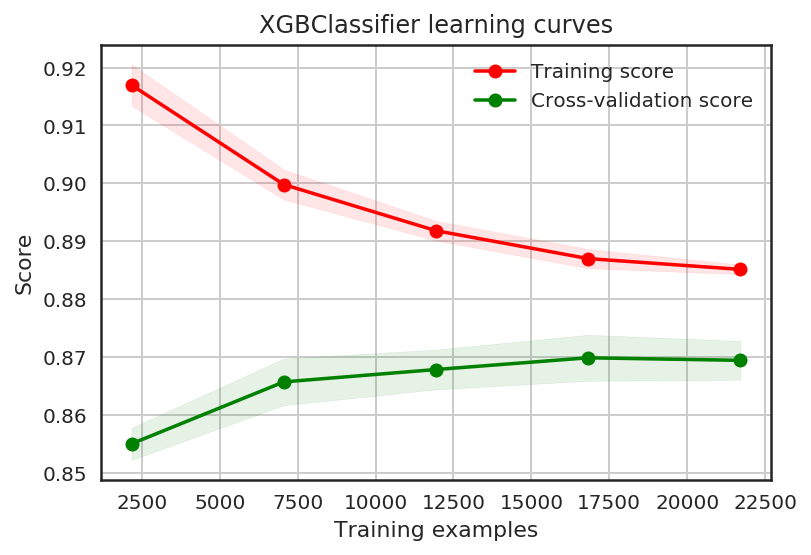

In [304]:
g = plot_learning_curve(xgb_best,"XGBClassifier learning curves",X_train, y_train,cv=kfold)

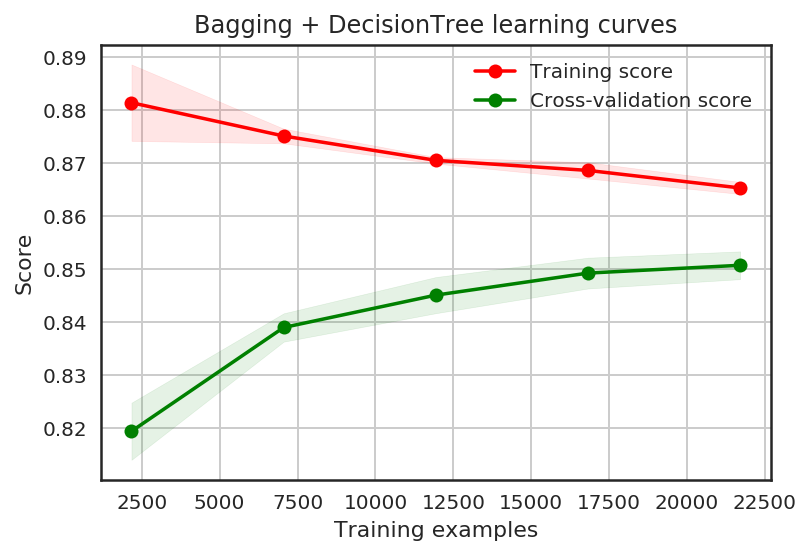

In [305]:
g = plot_learning_curve(bagdt_best,"Bagging + DecisionTree learning curves",X_train, y_train,cv=kfold)

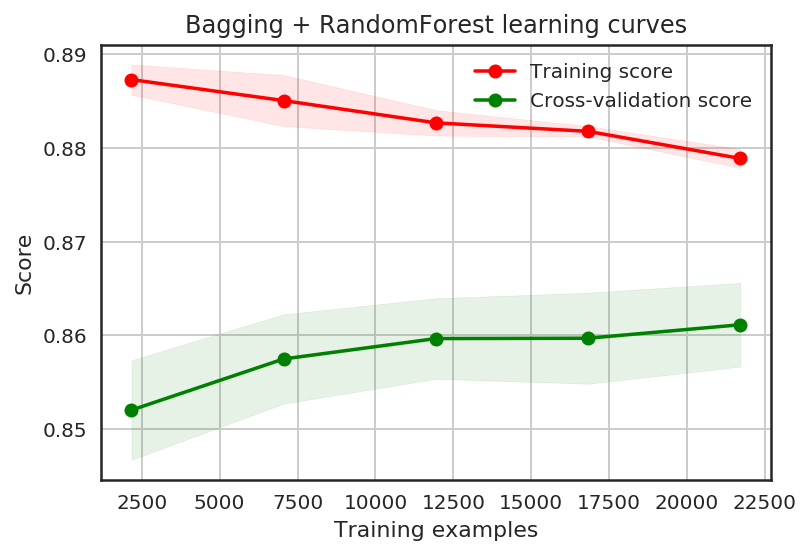

In [306]:
g = plot_learning_curve(bagrf_best,"Bagging + RandomForest learning curves",X_train, y_train,cv=kfold)

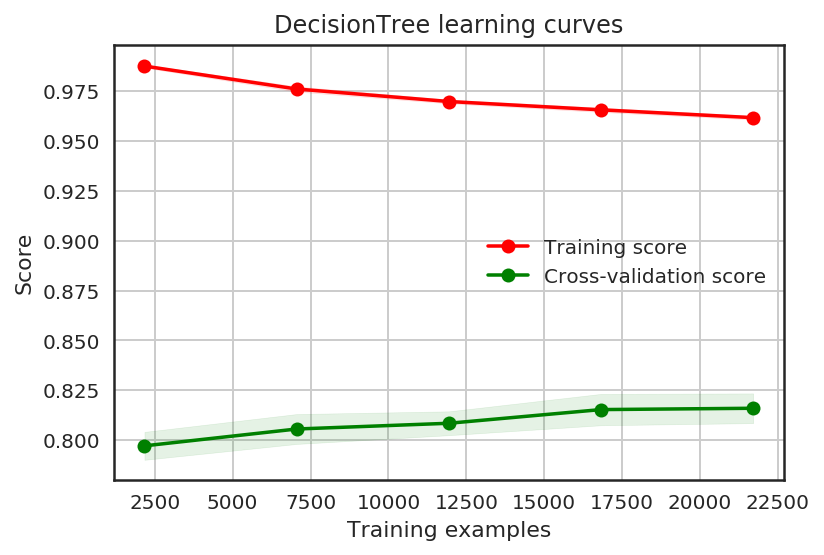

In [307]:
g = plot_learning_curve(dt_best,"DecisionTree learning curves",X_train, y_train,cv=kfold)

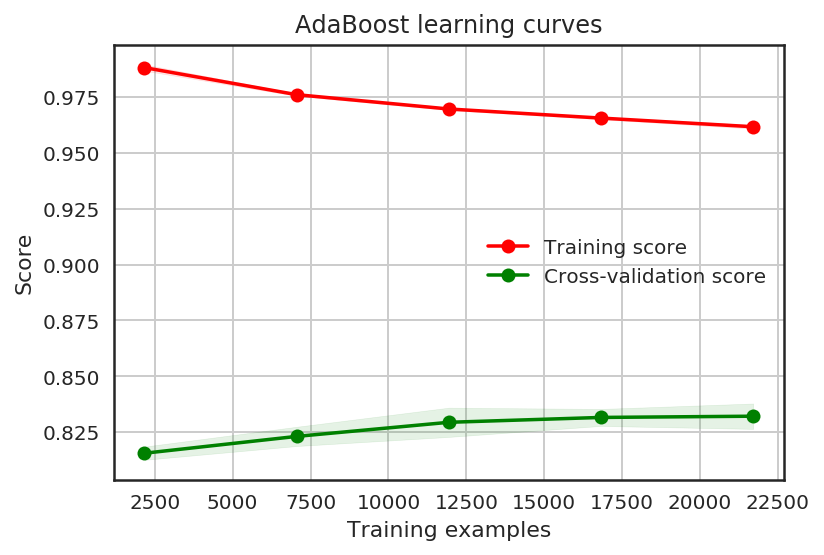

In [308]:
g = plot_learning_curve(ada_best,"AdaBoost learning curves",X_train,y_train,cv=kfold)

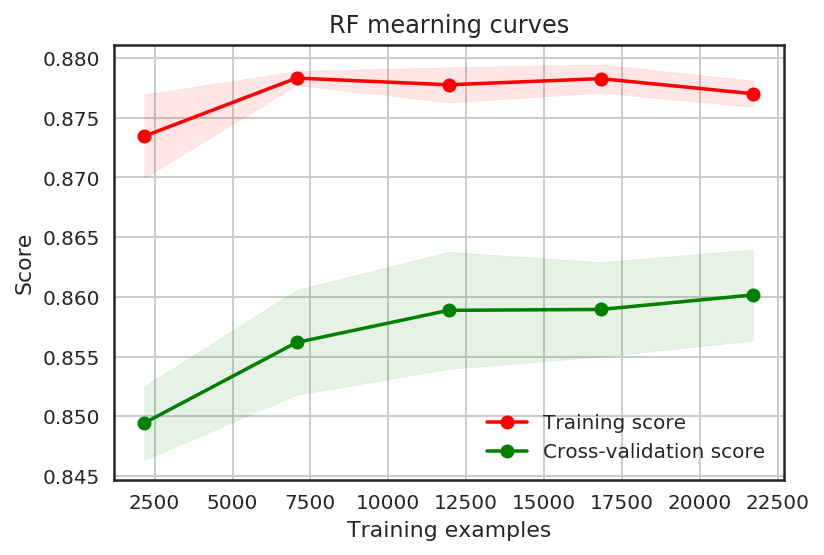

In [309]:
g = plot_learning_curve(RFC_best,"RF mearning curves",X_train,y_train,cv=kfold)

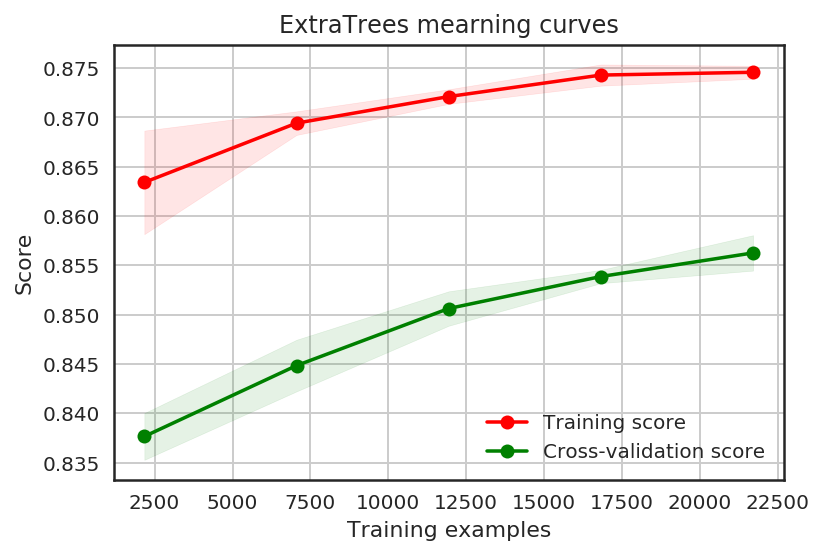

In [310]:
g = plot_learning_curve(ExtC_best,"ExtraTrees mearning curves",X_train,y_train,cv=kfold)

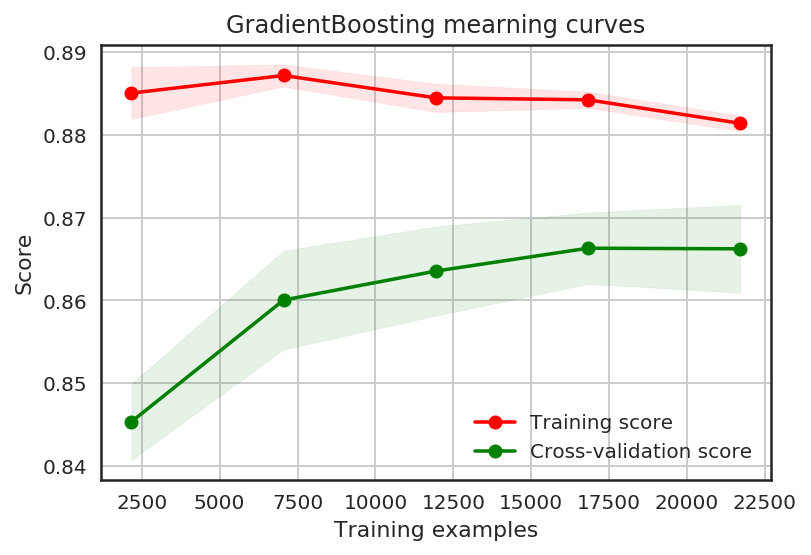

In [311]:
g = plot_learning_curve(GBC_best,"GradientBoosting mearning curves",X_train,y_train,cv=kfold)

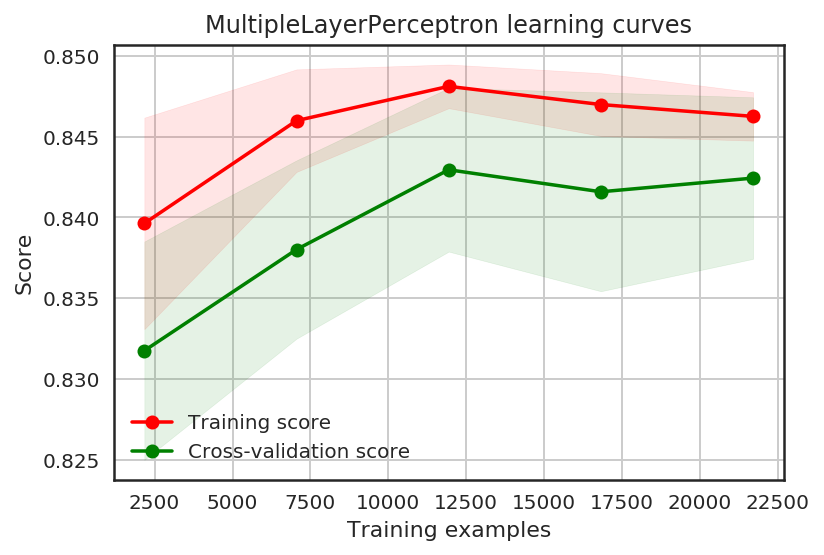

In [312]:
g = plot_learning_curve(mlp_best,"MultipleLayerPerceptron learning curves",X_train,y_train,cv=kfold)

In [313]:
# g = plot_learning_curve(knn_best,"KNeighboors learning curves",X_train,y_train,cv=kfold)

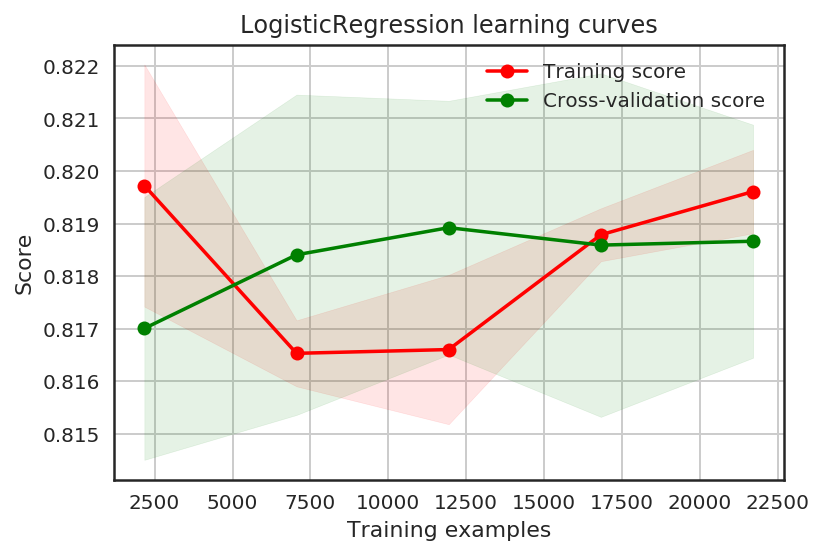

In [314]:
g = plot_learning_curve(lr_best,"LogisticRegression learning curves",X_train,y_train,cv=kfold)

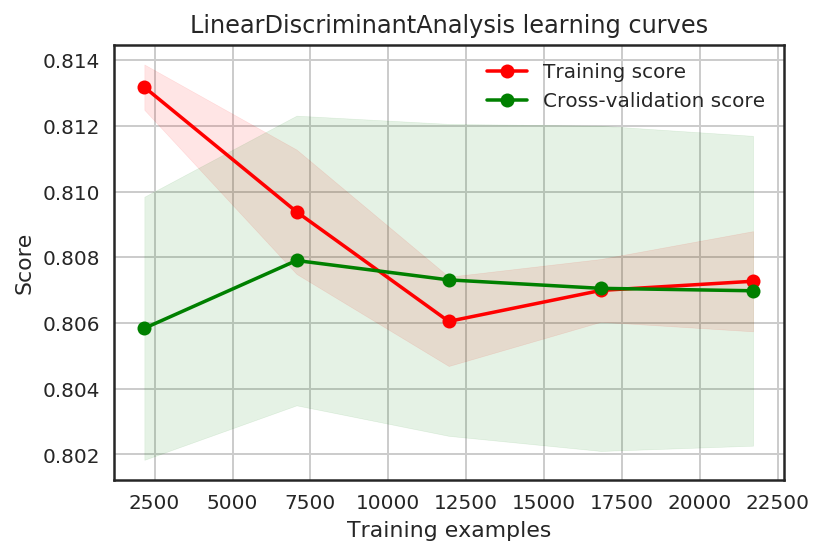

In [315]:
g = plot_learning_curve(lda_best,"LinearDiscriminantAnalysis learning curves",X_train,y_train,cv=kfold)

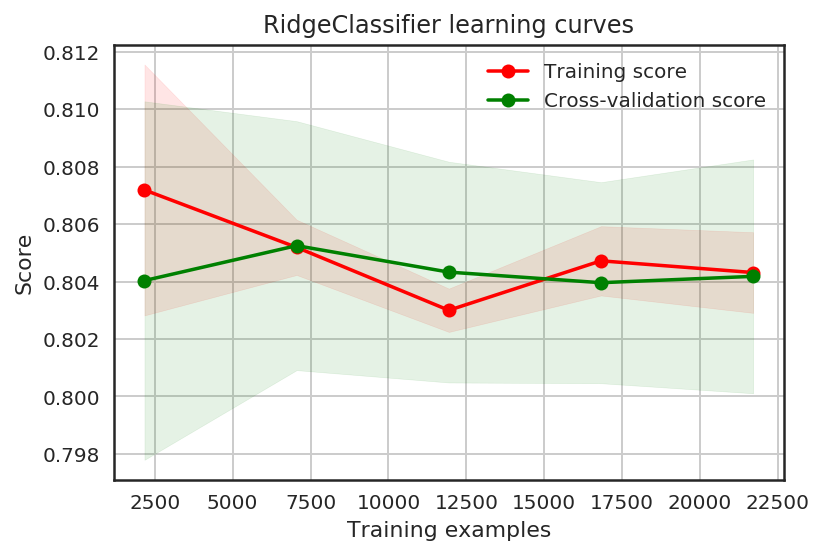

In [316]:
g = plot_learning_curve(rc_best,"RidgeClassifier learning curves",X_train,y_train,cv=kfold)

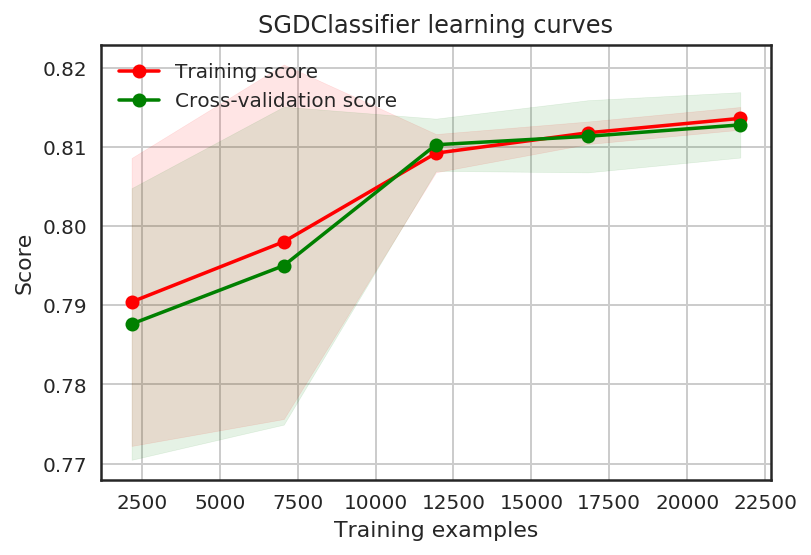

In [317]:
g = plot_learning_curve(sgdc_best,"SGDClassifier learning curves",X_train,y_train,cv=kfold)

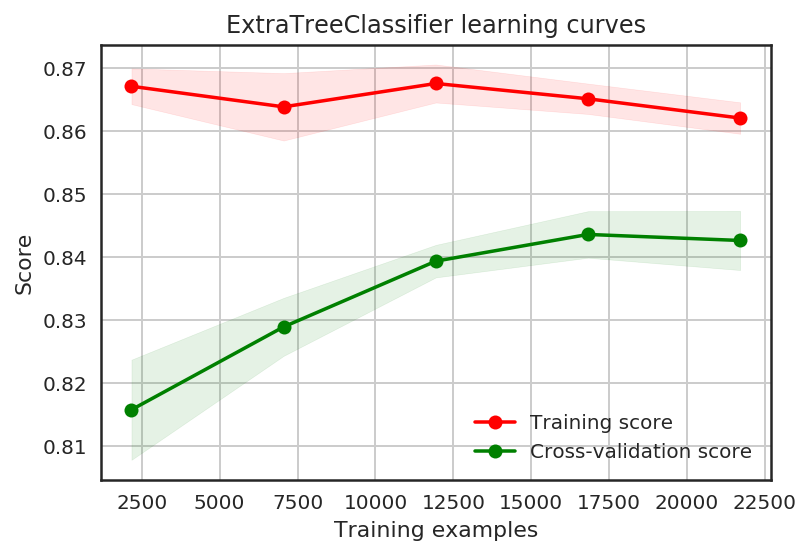

In [318]:
g = plot_learning_curve(etc_best,"ExtraTreeClassifier learning curves",X_train,y_train,cv=kfold)

In [319]:
# g = plot_learning_curve(SVMC_best,"SVC learning curves",X_train,y_train,cv=kfold)

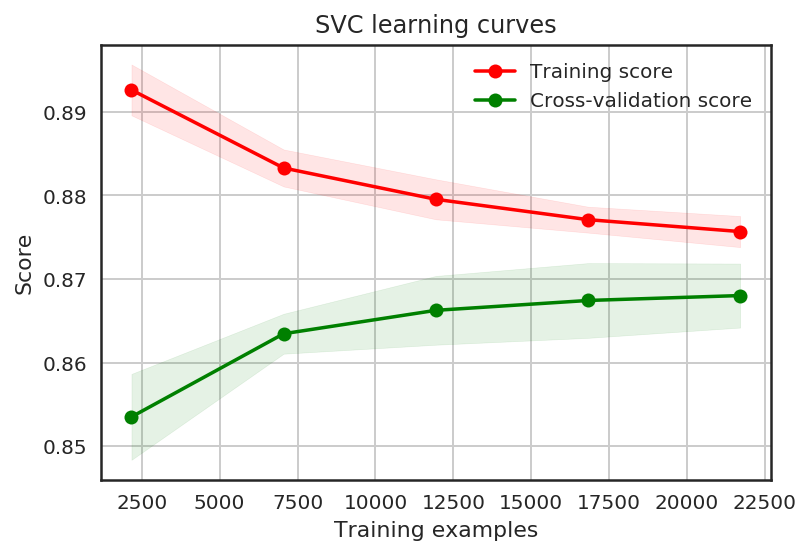

In [320]:
g = plot_learning_curve(lgm_best,"SVC learning curves",X_train,y_train,cv=kfold)

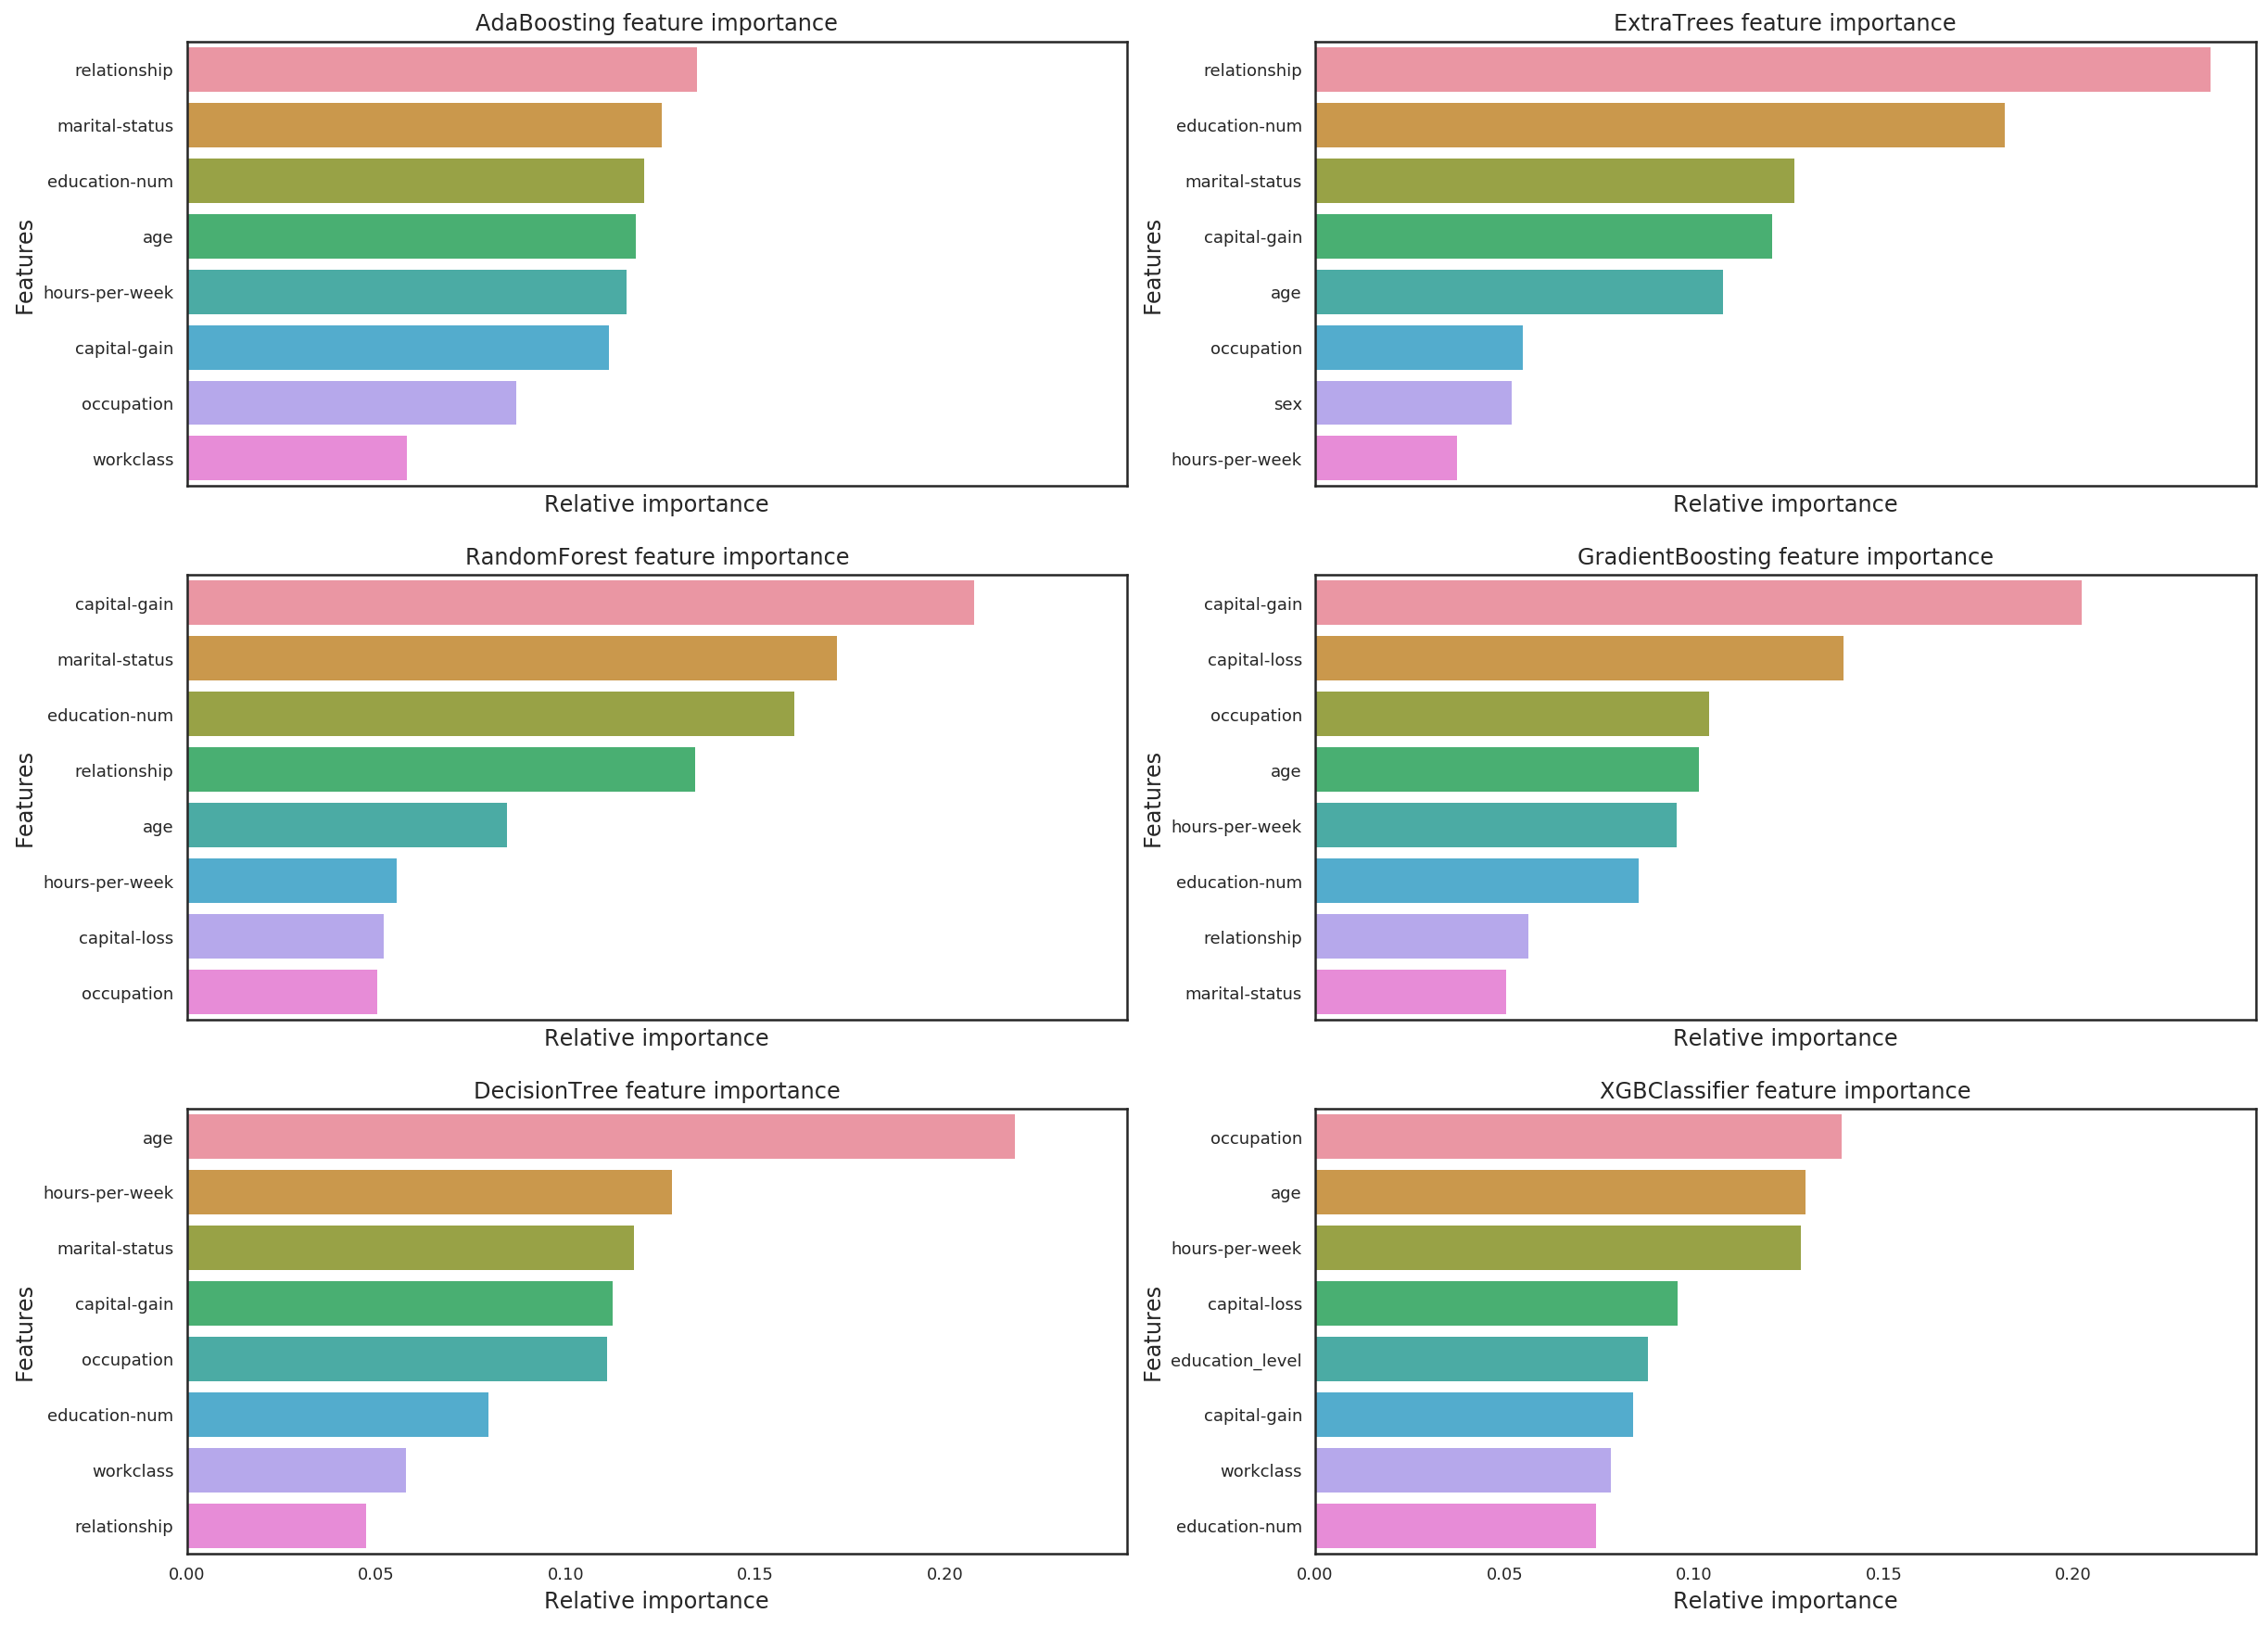

In [332]:
nrows = 3
ncols = 2
fig, axes = plt.subplots(nrows = nrows, ncols = ncols, sharex="all", figsize=(20,15))

names_classifiers = [("AdaBoosting", ada_best),
                     ("ExtraTrees",ExtC_best),
                     ("RandomForest",RFC_best),
                     ("GradientBoosting",GBC_best),
                     ("DecisionTree",dt_best),
                     ("XGBClassifier",xgb_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:8]
        g = sns.barplot(y=X_train.columns[indices][:40],x = classifier.feature_importances_[indices][:40] , orient='h',ax=axes[row][col])
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

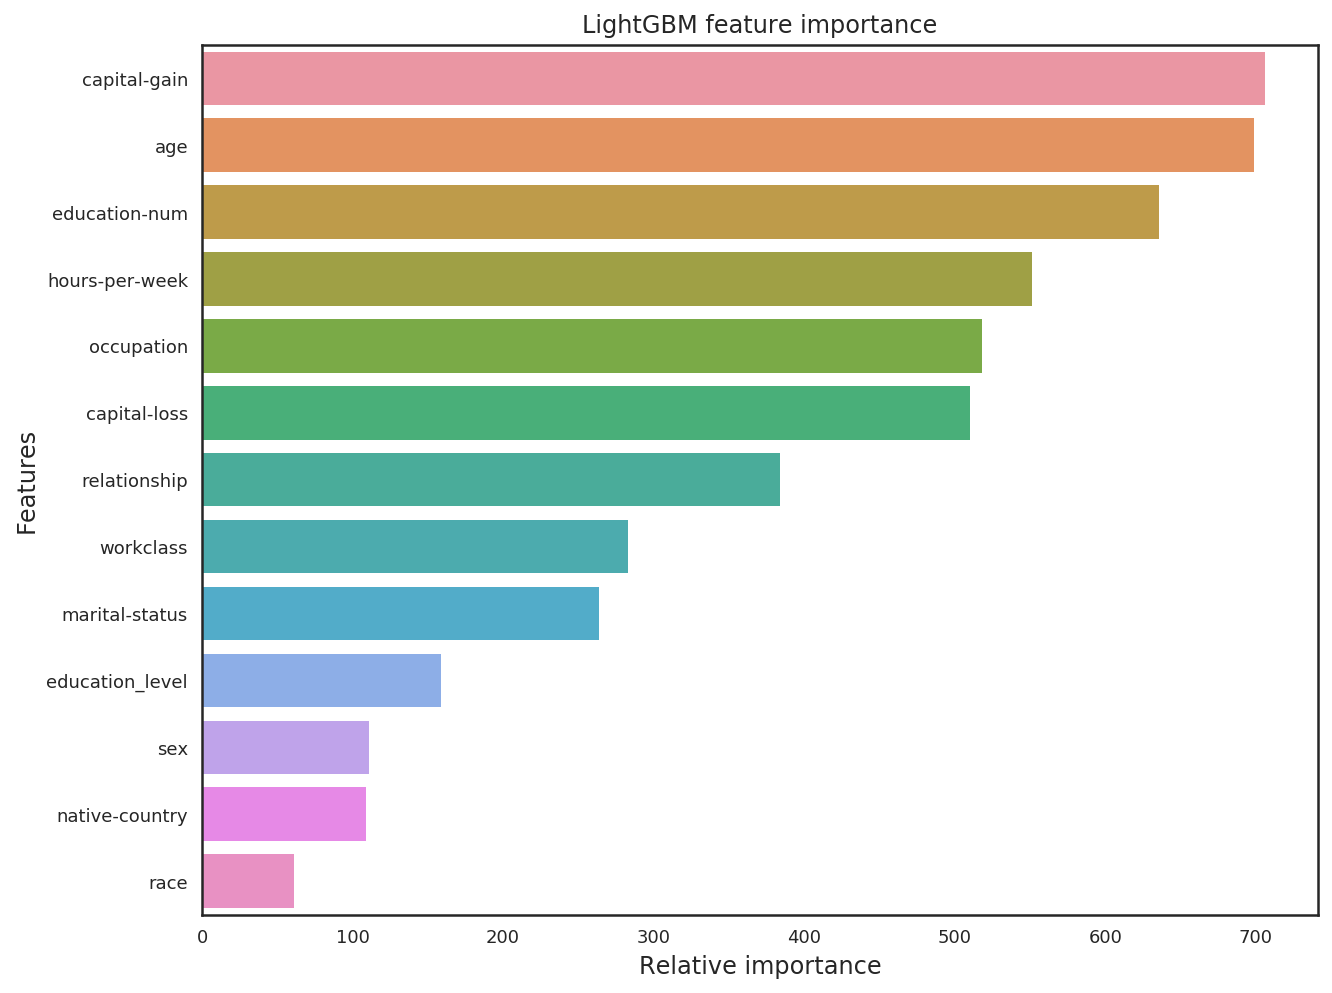

In [350]:
nrows = 1
ncols = 1
fig, axes = plt.subplots(sharex="all", figsize=(10,8))
names_classifiers = [("LightGBM",lgm_best)]

nclassifier = 0
for row in range(nrows):
    for col in range(ncols):
        name = names_classifiers[nclassifier][0]
        classifier = names_classifiers[nclassifier][1]
        indices = np.argsort(classifier.feature_importances_)[::-1][:]
#         print(indices)
#         print("x:", classifier.feature_importances_[indices])
#         print("y:", X_train.columns[indices])
        g = sns.barplot(y=X_train.columns[indices],x = classifier.feature_importances_[indices] , orient='h', ax=axes)
        g.set_xlabel("Relative importance",fontsize=12)
        g.set_ylabel("Features",fontsize=12)
        g.tick_params(labelsize=9)
        g.set_title(name + " feature importance")
        nclassifier += 1

In [322]:
test_RFC = pd.Series(RFC_best.predict(x_test), name="RFC")
test_bagdt = pd.Series(bagdt_best.predict(x_test), name="BagDT")
test_bagrf = pd.Series(bagrf_best.predict(x_test), name="BagRF")
test_AdaC = pd.Series(ada_best.predict(x_test), name="Ada")
test_GBC = pd.Series(GBC_best.predict(x_test), name="GBC")
test_XGB = pd.Series(xgb_best.predict(x_test), name="XGB")
test_dt = pd.Series(dt_best.predict(x_test), name="DT")
test_lg = pd.Series(lgm_best.predict(x_test), name="LGBM")
test_mlp = pd.Series(mlp_best.predict(x_test), name="MLP")
test_ExtC = pd.Series(ExtC_best.predict(x_test), name="ExtC")
# test_KNN = pd.Series(knn_best.predict(x_test), name="KNN")
test_lr = pd.Series(lr_best.predict(x_test), name="lr")
test_lda = pd.Series(lda_best.predict(x_test), name="LDA")
test_rc = pd.Series(rc_best.predict(x_test), name="rc")
test_sgdc = pd.Series(sgdc_best.predict(x_test), name="SGDC")
test_etc = pd.Series(etc_best.predict(x_test), name="etc")
# test_svm = pd.Series(SVMC_best.predict(x_test), name="SVM")


# Concatenate all classifier results
ensemble_results = pd.concat([test_RFC,
                              test_bagdt,
                              test_bagrf,
                              test_AdaC,
                              test_GBC,
                              test_XGB,
                              test_dt,
                              test_lg,
                              test_mlp,
                              test_ExtC,
                              test_lr,
                              test_lda,
                              test_rc,
                              test_sgdc,
                              test_etc],axis=1)
# test_KNN,
#                               test_svm],axis=1)

Text(0.5,1,'ensemble_results')

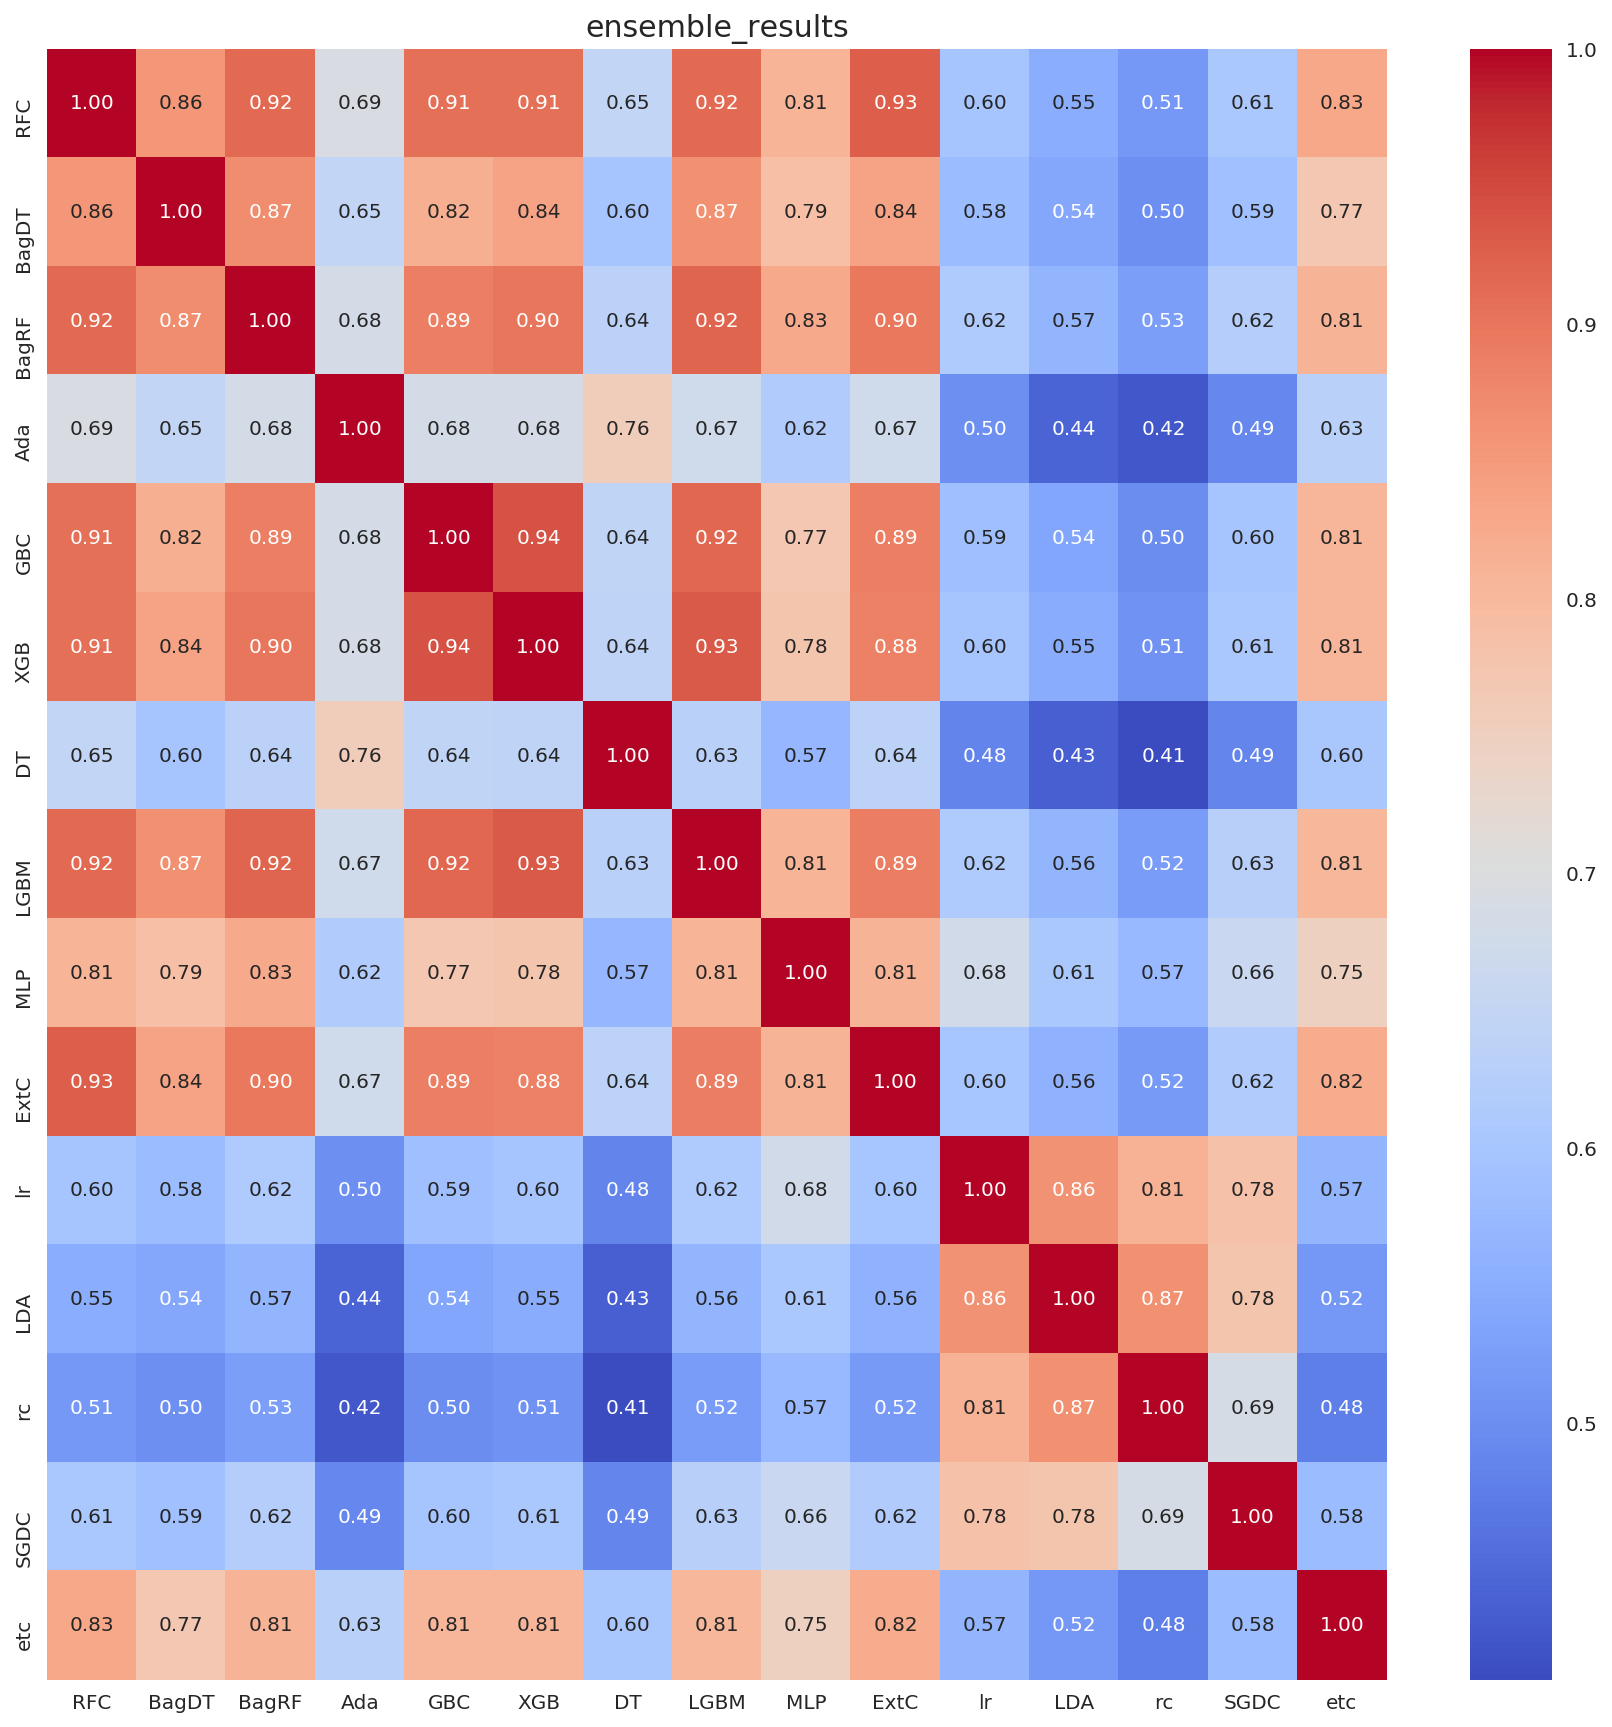

In [323]:
# Correlation matrix between numerical values (SibSp Parch Age and Fare values) and Survived 
f, ax= plt.subplots(figsize = (15, 15))
g = sns.heatmap(ensemble_results.corr(),annot=True, fmt = ".2f", cmap = "coolwarm", ax = ax)
# 设置Axes的标题
ax.set_title('ensemble_results', fontsize=15)
# g.set_xticklabels(rotation=30)

In [324]:
votingC = VotingClassifier(estimators=[('MLP',mlp_best),
                                       ('XGB', xgb_best),
                                       ('lgm', lgm_best)],
                           voting='soft',
                           n_jobs=4)

votingC = votingC.fit(X_train, y_train)
# votingC.predict(x_test)
print(votingC.score(x_val, y_val))

0.8643449419568823


In [325]:
votingD = VotingClassifier(estimators=[('MLP',mlp_best),
                                       ('XGB', xgb_best),
                                       ('lgm', lgm_best)],
                           voting='hard',
                           n_jobs=4)

votingD = votingC.fit(X_train, y_train)
# votingC.predict(x_test)
print(votingC.score(x_val, y_val))

0.8643449419568823


In [326]:
# # TODO： 计算准确率
# accuracy = (income==income.replace(0,1)).mean()
# # TODO： 使用上面的公式，并设置beta=0.5计算F-score
# precision=float(n_greater_50k)/n_records
# recall=1
# fscore = (1+0.5**2)*precision*recall/(0.5**2*precision+recall)

# # 打印结果
# print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))